<a href="https://colab.research.google.com/github/PyAshishMhatre/OnlineNewsPopularity_IE7374_MachineLearning/blob/main/NewsPopularity_EDA_Test_ModelBuild.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries 

In [ ]:
#%pip install mlxtend --upgrade

# Time profiler
%pip install line_profiler
# Memory profiler
%pip install memory_profiler
# Install the dependency for a faster analysis
%pip install psutil

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67 kB 3.9 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for memory-profiler: filename=memory_profiler-0.60.0-py3-none-any.whl size=31284 sha256=33a79fe7213d4a0963663362fac3afe17876eff7cb5c94bb71957f6d7e4fe22c
  Stored in directory: /root/.cache/pip/wheels/67/2b/fb/326e30d638c538e69a5eb0aa47f4223d979f502bbdb403950f
Successfully built memory-profiler
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd 
import numpy as np 
import random 
from matplotlib import pyplot as plt 
import scipy 
import seaborn as sns
import scipy.stats as stats
import math
from scipy.stats import chi2_contingency

#For Validation Purpose
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import accuracy_score


import time
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm 
sns.set(style='white')


# Loading Dataset

In [ ]:
df = pd.read_csv('OnlineNewsPopularity.csv')

In [ ]:
df.shape

(39644, 61)

In [ ]:
df.head()

url   timedelta  \
0  http://mashable.com/2013/01/07/amazon-instant-...       731.0   
1  http://mashable.com/2013/01/07/ap-samsung-spon...       731.0   
2  http://mashable.com/2013/01/07/apple-40-billio...       731.0   
3  http://mashable.com/2013/01/07/astronaut-notre...       731.0   
4   http://mashable.com/2013/01/07/att-u-verse-apps/       731.0   

    n_tokens_title   n_tokens_content   n_unique_tokens   n_non_stop_words  \
0             12.0              219.0          0.663594                1.0   
1              9.0              255.0          0.604743                1.0   
2              9.0              211.0          0.575130                1.0   
3              9.0              531.0          0.503788                1.0   
4             13.0             1072.0          0.415646                1.0   

    n_non_stop_unique_tokens   num_hrefs   num_self_hrefs   num_imgs  ...  \
0                   0.815385         4.0              2.0        1.0  ...   
1                   0.791946         3.0              1.0        1.0  ...   
2                   0.663866         3.0              1.0        1.0  ...   
3                   0.665635         9.0              0.0        1.0  ...   
4                   0.540890        19.0             19.0       20.0  ...   

    min_positive_polarity   max_positive_polarity   avg_negative_polarity  \
0                0.100000                     0.7               -0.350000   
1                0.033333                     0.7               -0.118750   
2                0.100000                     1.0               -0.466667   
3                0.136364                     0.8               -0.369697   
4                0.033333                     1.0               -0.220192   

    min_negative_polarity   max_negative_polarity   title_subjectivity  \
0                  -0.600               -0.200000             0.500000   
1                  -0.125               -0.100000             0.000000   
2                  -0.800               -0.133333             0.000000   
3                  -0.600               -0.166667             0.000000   
4                  -0.500               -0.050000             0.454545   

    title_sentiment_polarity   abs_title_subjectivity  \
0                  -0.187500                 0.000000   
1                   0.000000                 0.500000   
2                   0.000000                 0.500000   
3                   0.000000                 0.500000   
4                   0.136364                 0.045455   

    abs_title_sentiment_polarity   shares  
0                       0.187500      593  
1                       0.000000      711  
2                       0.000000     1500  
3                       0.000000     1200  
4                       0.136364      505  

[5 rows x 61 columns]

In [ ]:
df.describe()

timedelta   n_tokens_title   n_tokens_content   n_unique_tokens  \
count  39644.000000     39644.000000       39644.000000      39644.000000   
mean     354.530471        10.398749         546.514731          0.548216   
std      214.163767         2.114037         471.107508          3.520708   
min        8.000000         2.000000           0.000000          0.000000   
25%      164.000000         9.000000         246.000000          0.470870   
50%      339.000000        10.000000         409.000000          0.539226   
75%      542.000000        12.000000         716.000000          0.608696   
max      731.000000        23.000000        8474.000000        701.000000   

        n_non_stop_words   n_non_stop_unique_tokens     num_hrefs  \
count       39644.000000               39644.000000  39644.000000   
mean            0.996469                   0.689175     10.883690   
std             5.231231                   3.264816     11.332017   
min             0.000000                   0.000000      0.000000   
25%             1.000000                   0.625739      4.000000   
50%             1.000000                   0.690476      8.000000   
75%             1.000000                   0.754630     14.000000   
max          1042.000000                 650.000000    304.000000   

        num_self_hrefs      num_imgs    num_videos  ...  \
count     39644.000000  39644.000000  39644.000000  ...   
mean          3.293638      4.544143      1.249874  ...   
std           3.855141      8.309434      4.107855  ...   
min           0.000000      0.000000      0.000000  ...   
25%           1.000000      1.000000      0.000000  ...   
50%           3.000000      1.000000      0.000000  ...   
75%           4.000000      4.000000      1.000000  ...   
max         116.000000    128.000000     91.000000  ...   

        min_positive_polarity   max_positive_polarity   avg_negative_polarity  \
count            39644.000000            39644.000000            39644.000000   
mean                 0.095446                0.756728               -0.259524   
std                  0.071315                0.247786                0.127726   
min                  0.000000                0.000000               -1.000000   
25%                  0.050000                0.600000               -0.328383   
50%                  0.100000                0.800000               -0.253333   
75%                  0.100000                1.000000               -0.186905   
max                  1.000000                1.000000                0.000000   

        min_negative_polarity   max_negative_polarity   title_subjectivity  \
count            39644.000000            39644.000000         39644.000000   
mean                -0.521944               -0.107500             0.282353   
std                  0.290290                0.095373             0.324247   
min                 -1.000000               -1.000000             0.000000   
25%                 -0.700000               -0.125000             0.000000   
50%                 -0.500000               -0.100000             0.150000   
75%                 -0.300000               -0.050000             0.500000   
max                  0.000000                0.000000             1.000000   

        title_sentiment_polarity   abs_title_subjectivity  \
count               39644.000000             39644.000000   
mean                    0.071425                 0.341843   
std                     0.265450                 0.188791   
min                    -1.000000                 0.000000   
25%                     0.000000                 0.166667   
50%                     0.000000                 0.500000   
75%                     0.150000                 0.500000   
max                     1.000000                 0.500000   

        abs_title_sentiment_polarity         shares  
count                   39644.000000   39644.000000  
mean                        0.156064    3395.380184  
std              

In [ ]:
print(df.isnull().sum())
#no nulls 

url                              0
 timedelta                       0
 n_tokens_title                  0
 n_tokens_content                0
 n_unique_tokens                 0
                                ..
 title_subjectivity              0
 title_sentiment_polarity        0
 abs_title_subjectivity          0
 abs_title_sentiment_polarity    0
 shares                          0
Length: 61, dtype: int64


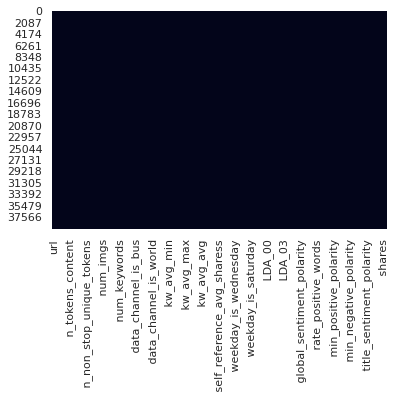

In [ ]:
sns.heatmap(df.isnull(), cbar=False) #None Nulls confirmed 

# EDA

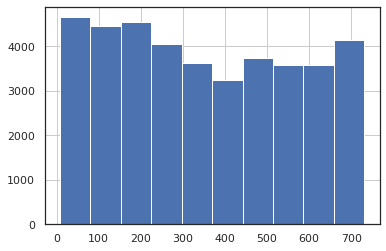

In [ ]:
df[' timedelta'].hist()

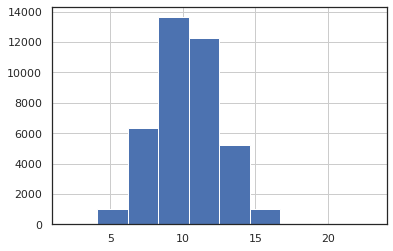

In [ ]:
df[' n_tokens_title'].hist()

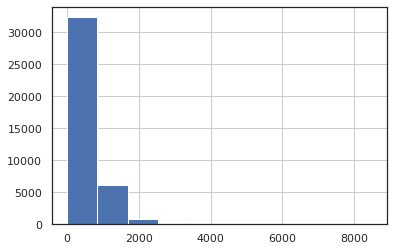

In [ ]:
df[' n_tokens_content'].hist()

#We have most of the data having content words count less than 2000 

{'boxes': [<matplotlib.lines.Line2D at 0x7fa2266e1890>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa2266e7890>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa2266ec8d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa2266ec390>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa2266e1e90>,
  <matplotlib.lines.Line2D at 0x7fa2266e7310>]}

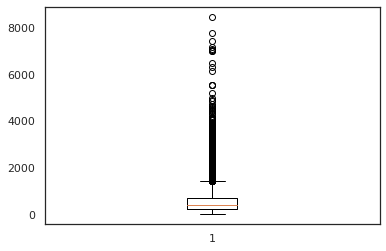

In [ ]:
plt.boxplot(df[' n_tokens_content'])

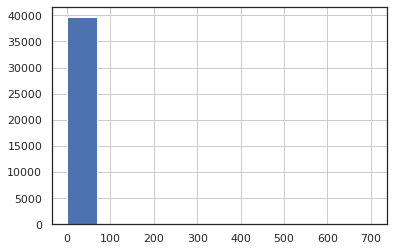

In [ ]:
df[' n_unique_tokens'].hist()

In [ ]:
df[' n_unique_tokens'].describe()

count    39644.000000
mean         0.548216
std          3.520708
min          0.000000
25%          0.470870
50%          0.539226
75%          0.608696
max        701.000000
Name:  n_unique_tokens, dtype: float64

url   timedelta  \
31037  http://mashable.com/2014/08/18/ukraine-civilia...       142.0   

        n_tokens_title   n_tokens_content   n_unique_tokens  \
31037              9.0             1570.0             701.0   

        n_non_stop_words   n_non_stop_unique_tokens   num_hrefs  \
31037             1042.0                      650.0        11.0   

        num_self_hrefs   num_imgs  ...   min_positive_polarity  \
31037             10.0       51.0  ...                     0.0   

        max_positive_polarity   avg_negative_polarity   min_negative_polarity  \
31037                     0.0                     0.0                     0.0   

        max_negative_polarity   title_subjectivity   title_sentiment_polarity  \
31037                     0.0                  0.0                        0.0   

        abs_title_subjectivity   abs_title_sentiment_polarity   shares  
31037                      0.0                            0.0     5900  

[1 rows x 61 columns]

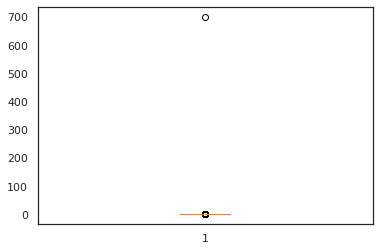

In [ ]:
plt.boxplot(df[' n_unique_tokens'])

df[df[' n_unique_tokens'] == 701] #remove row 31037 has a outlier at 701 unique tokens 


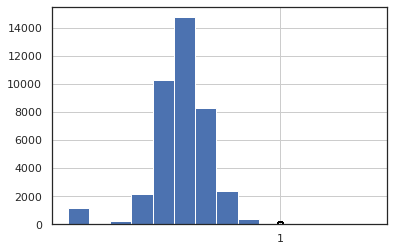

In [ ]:
plt.boxplot( df[df[' n_unique_tokens'] != 701][' n_unique_tokens'] )

( df[df[' n_unique_tokens'] != 701][' n_unique_tokens'] ).hist()

#after droping the row with 701 unique tokens we have a normal distribution of data 

In [ ]:
df.drop(df.index[31037], inplace=True) #Droping the row 

In [ ]:
df.shape

(39643, 61)

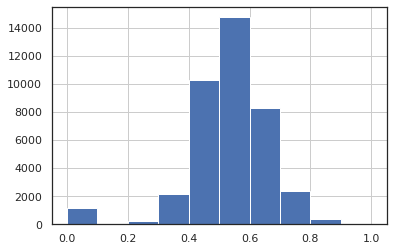

In [ ]:
df[' n_unique_tokens'].hist() #Checking after droping

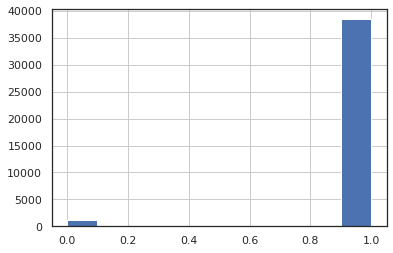

In [ ]:
df[' n_non_stop_words'].hist()

{'boxes': [<matplotlib.lines.Line2D at 0x7fa2263fe8d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa226403890>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa22640a8d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa22640a390>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa2263fedd0>,
  <matplotlib.lines.Line2D at 0x7fa226403350>]}

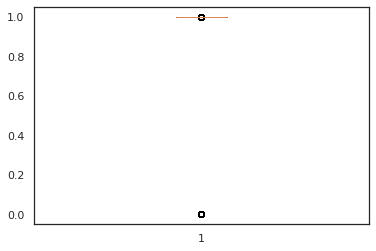

In [ ]:
plt.boxplot(df[' n_non_stop_words'])

{'boxes': [<matplotlib.lines.Line2D at 0x7fa22635e7d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa226364790>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa22636b7d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa22636b290>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa22635ecd0>,
  <matplotlib.lines.Line2D at 0x7fa226364250>]}

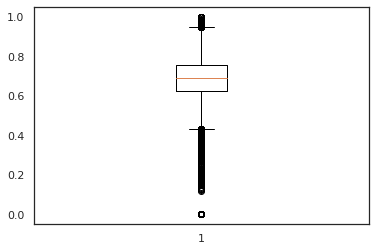

In [ ]:
plt.boxplot(df[' n_non_stop_unique_tokens'])

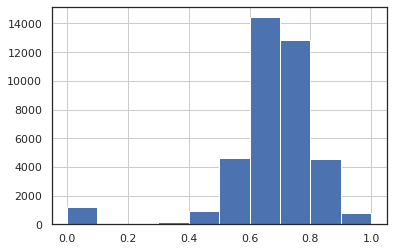

In [ ]:
df[' n_non_stop_unique_tokens'].hist()

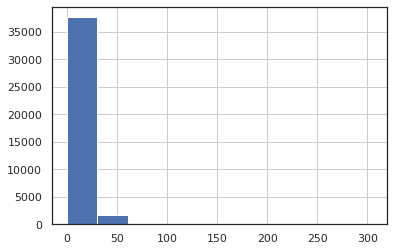

In [ ]:
df[' num_hrefs'].hist()

{'boxes': [<matplotlib.lines.Line2D at 0x7fa226593650>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa2265ff790>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa2266123d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa226612ad0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa22668ef10>,
  <matplotlib.lines.Line2D at 0x7fa226624750>]}

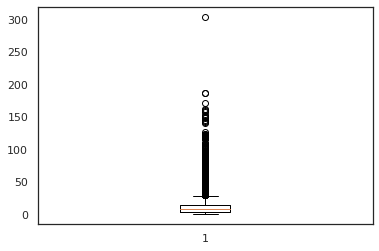

In [ ]:
plt.boxplot(df[' num_hrefs'])

In [ ]:
df[' num_hrefs'].describe() 

#better to drop as we have highly left skewed data and outliers in higher range 

count    39643.000000
mean        10.883687
std         11.332160
min          0.000000
25%          4.000000
50%          8.000000
75%         14.000000
max        304.000000
Name:  num_hrefs, dtype: float64

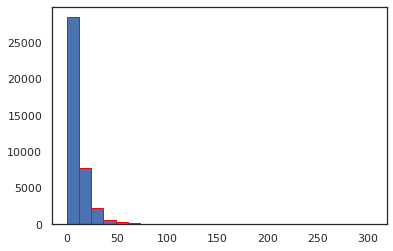

In [ ]:
plt.hist(df[' num_hrefs'], edgecolor="red", bins=25)
plt.show()

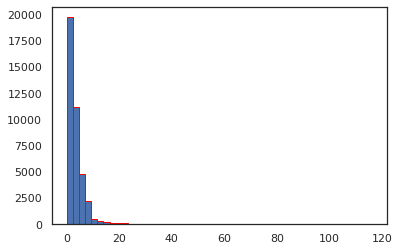

In [ ]:
plt.hist(df[' num_self_hrefs'], edgecolor="red", bins=50)
plt.show()

{'boxes': [<matplotlib.lines.Line2D at 0x7fa226060550>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa226065510>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa22606d550>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa226065fd0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa226060a50>,
  <matplotlib.lines.Line2D at 0x7fa226060f90>]}

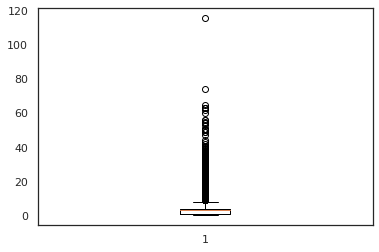

In [ ]:
plt.boxplot(df[' num_self_hrefs'])

#better to drop as we have highly left skewed data and outliers in higher range but we would like to consider this variable

In [ ]:
np.corrcoef(df[' num_self_hrefs'], df[' num_hrefs']) #No significant Correlation between two variables 

array([[1.        , 0.39646705],
       [0.39646705, 1.        ]])

(array([3.1011e+04, 4.0620e+03, 2.3860e+03, 1.0770e+03, 4.1300e+02,
        3.2500e+02, 5.5000e+01, 1.4300e+02, 5.1000e+01, 5.3000e+01,
        1.9000e+01, 1.3000e+01, 7.0000e+00, 1.0000e+00, 7.0000e+00,
        1.6000e+01, 1.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  0. ,   6.4,  12.8,  19.2,  25.6,  32. ,  38.4,  44.8,  51.2,
         57.6,  64. ,  70.4,  76.8,  83.2,  89.6,  96. , 102.4, 108.8,
        115.2, 121.6, 128. ]),
 <a list of 20 Patch objects>)

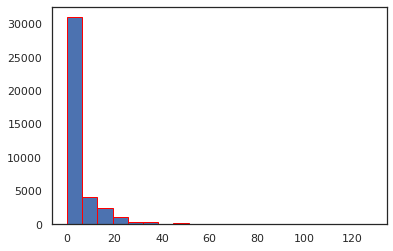

In [ ]:
plt.hist(df[' num_imgs'], edgecolor="red", bins=20)

{'boxes': [<matplotlib.lines.Line2D at 0x7fa225f68a10>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa225f6c9d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa225f74a10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa225f744d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa225f68f10>,
  <matplotlib.lines.Line2D at 0x7fa225f6c490>]}

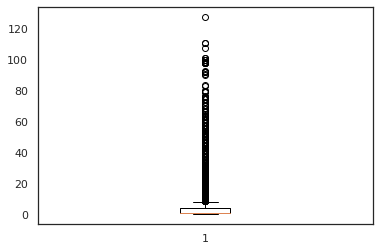

In [ ]:
plt.boxplot(df[' num_imgs'])

In [ ]:
df[' num_imgs'].describe()

count    39643.000000
mean         4.542971
std          8.306262
min          0.000000
25%          1.000000
50%          1.000000
75%          4.000000
max        128.000000
Name:  num_imgs, dtype: float64

(array([3.7469e+04, 5.3800e+02, 6.5000e+02, 3.3600e+02, 3.0200e+02,
        2.4300e+02, 3.1000e+01, 2.9000e+01, 2.0000e+00, 2.0000e+00,
        1.1000e+01, 7.0000e+00, 5.0000e+00, 0.0000e+00, 3.0000e+00,
        0.0000e+00, 1.4000e+01, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 0.  ,  4.55,  9.1 , 13.65, 18.2 , 22.75, 27.3 , 31.85, 36.4 ,
        40.95, 45.5 , 50.05, 54.6 , 59.15, 63.7 , 68.25, 72.8 , 77.35,
        81.9 , 86.45, 91.  ]),
 <a list of 20 Patch objects>)

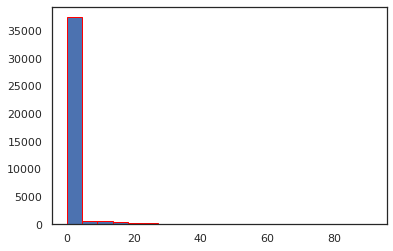

In [ ]:
plt.hist(df[' num_videos'], edgecolor="red", bins=20) 

#Delete highly left skewed with most of the videos having 1 video 

In [ ]:
df[' num_videos'].describe()

count    39643.000000
mean         1.249905
std          4.107902
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         91.000000
Name:  num_videos, dtype: float64

{'boxes': [<matplotlib.lines.Line2D at 0x7fa225e71f50>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa225e79f10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa225e7ff50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa225e7fa10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa225e79490>,
  <matplotlib.lines.Line2D at 0x7fa225e799d0>]}

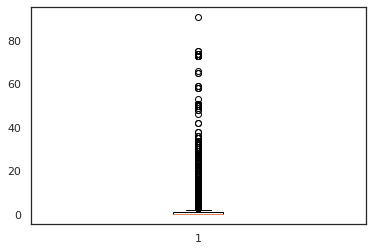

In [ ]:
plt.boxplot(df[' num_videos'])

(array([1.1810e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 1.9000e+02,
        6.1220e+03, 2.0881e+04, 1.0034e+04, 1.0760e+03, 1.2800e+02,
        2.1000e+01, 5.0000e+00, 1.0000e+00, 0.0000e+00, 3.0000e+00]),
 array([0.        , 0.40207668, 0.80415335, 1.20623003, 1.60830671,
        2.01038339, 2.41246006, 2.81453674, 3.21661342, 3.6186901 ,
        4.02076677, 4.42284345, 4.82492013, 5.22699681, 5.62907348,
        6.03115016, 6.43322684, 6.83530351, 7.23738019, 7.63945687,
        8.04153355]),
 <a list of 20 Patch objects>)

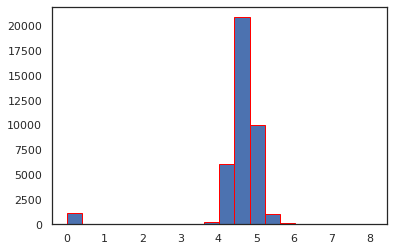

In [ ]:
plt.hist(df[' average_token_length'], edgecolor="red", bins=20)

{'boxes': [<matplotlib.lines.Line2D at 0x7fa225d84950>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa225d88910>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa225d0f950>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa225d0f410>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa225d84e50>,
  <matplotlib.lines.Line2D at 0x7fa225d883d0>]}

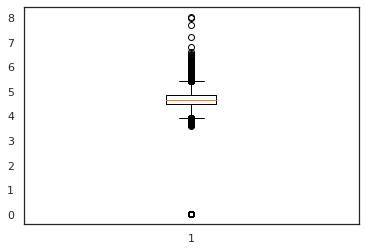

In [ ]:
plt.boxplot(df[' average_token_length'])

In [ ]:
df[df[' average_token_length'] == 0].index

#We see that 61 datarows have 0 average token length which does make sense but we also observe that col. n_token_content also has 0 respectively
#therefore we should check if there is a high correlation between the two columns

Int64Index([  893,   917,  1062,  1121,  1312,  1336,  1352,  1454,  1485,
             1574,
            ...
            39515, 39538, 39541, 39569, 39584, 39598, 39601, 39613, 39615,
            39616],
           dtype='int64', length=1181)

In [ ]:
df[df[' n_tokens_content'] == 0] 

#We get the exact same rows as above calculting the correlation Coeff.

url   timedelta  \
893    http://mashable.com/2013/01/23/actual-facebook...       715.0   
917    http://mashable.com/2013/01/23/fitness-gadget-...       715.0   
1062   http://mashable.com/2013/01/25/data-vs-nature-...       713.0   
1121   http://mashable.com/2013/01/26/infographics-ma...       712.0   
1312   http://mashable.com/2013/01/29/social-tv-chart...       709.0   
...                                                  ...         ...   
39598  http://mashable.com/2014/12/26/holiday-decorat...         9.0   
39601  http://mashable.com/2014/12/26/minority-author...         9.0   
39613  http://mashable.com/2014/12/26/the-interview-b...         9.0   
39615  http://mashable.com/2014/12/26/toothpaste-fluo...         9.0   
39616  http://mashable.com/2014/12/26/top-photography...         9.0   

        n_tokens_title   n_tokens_content   n_unique_tokens  \
893               10.0                0.0               0.0   
917                8.0                0.0               0.0   
1062              12.0                0.0               0.0   
1121              10.0                0.0               0.0   
1312              14.0                0.0               0.0   
...                ...                ...               ...   
39598             11.0                0.0               0.0   
39601             12.0                0.0               0.0   
39613             12.0                0.0               0.0   
39615             11.0                0.0               0.0   
39616             15.0                0.0               0.0   

        n_non_stop_words   n_non_stop_unique_tokens   num_hrefs  \
893                  0.0                        0.0         0.0   
917                  0.0                        0.0         0.0   
1062                 0.0                        0.0         0.0   
1121                 0.0                        0.0         0.0   
1312                 0.0                        0.0         0.0   
...                  ...                        ...         ...   
39598                0.0                        0.0         0.0   
39601                0.0                        0.0         0.0   
39613                0.0                        0.0         0.0   
39615                0.0                        0.0         0.0   
39616                0.0                        0.0         0.0   

        num_self_hrefs   num_imgs  ...   min_positive_polarity  \
893                0.0       10.0  ...                     0.0   
917                0.0        0.0  ...                     0.0   
1062               0.0        0.0  ...                     0.0   
1121               0.0        0.0  ...                     0.0   
1312               0.0        0.0  ...                     0.0   
...                ...        ...  ...                     ...   
39598              0.0        0.0  ...                     0.0   
39601              0.0        0.0  ...                     0.0   
39613              0.0       14.0  ...                     0.0   
39615              0.0       21.0  ...                     0.0   
39616              0.0        0.0  ...                     0.0   

        max_positive_polarity   avg_negative_polarity   min_negative_polarity  \
893                       0.0                     0.0                     0.0   
917                       0.0                     0.0                     0.0   
1062                      0.0                     0.0                     0.0   
1121                      0.0                     0.0                     0.0   
1312                      0.0                     0.0                     0.0   
...                       ...                     ...                     ...   
39598                     0.0                     0.0                     0.0   
39601                     0.0                     0.0                     0.0   
39613                     0.0                     0.0                     0.0   
39615                  

 # Removing rows where we have zero content 

In [ ]:
len(df[df[' n_tokens_content'] == 0].index)

1181

In [ ]:
df.drop(df[df[' n_tokens_content'] == 0].index, inplace=True)

In [ ]:
df.shape

(38462, 61)

In [ ]:
df[df[' n_tokens_content'] == 0]

Empty DataFrame
Columns: [url,  timedelta,  n_tokens_title,  n_tokens_content,  n_unique_tokens,  n_non_stop_words,  n_non_stop_unique_tokens,  num_hrefs,  num_self_hrefs,  num_imgs,  num_videos,  average_token_length,  num_keywords,  data_channel_is_lifestyle,  data_channel_is_entertainment,  data_channel_is_bus,  data_channel_is_socmed,  data_channel_is_tech,  data_channel_is_world,  kw_min_min,  kw_max_min,  kw_avg_min,  kw_min_max,  kw_max_max,  kw_avg_max,  kw_min_avg,  kw_max_avg,  kw_avg_avg,  self_reference_min_shares,  self_reference_max_shares,  self_reference_avg_sharess,  weekday_is_monday,  weekday_is_tuesday,  weekday_is_wednesday,  weekday_is_thursday,  weekday_is_friday,  weekday_is_saturday,  weekday_is_sunday,  is_weekend,  LDA_00,  LDA_01,  LDA_02,  LDA_03,  LDA_04,  global_subjectivity,  global_sentiment_polarity,  global_rate_positive_words,  global_rate_negative_words,  rate_positive_words,  rate_negative_words,  avg_positive_polarity,  min_positive_polarity,  max_positive_polarity,  avg_negative_polarity,  min_negative_polarity,  max_negative_polarity,  title_subjectivity,  title_sentiment_polarity,  abs_title_subjectivity,  abs_title_sentiment_polarity,  shares]
Index: []

[0 rows x 61 columns]

In [ ]:
np.corrcoef(df[' average_token_length'], df[' n_tokens_content']) 

# we dont see a high correlation between the two variables 

array([[ 1.        , -0.07442635],
       [-0.07442635,  1.        ]])

(array([  50.,    0.,    0.,    0.,    0.,   45.,    0.,    0.,    0.,
           0.,    0.,  632.,    0.,    0.,    0.,    0., 2402.,    0.,
           0.,    0.,    0.,    0., 4732.,    0.,    0.,    0.,    0.,
        6587.,    0.,    0.,    0.,    0.,    0., 7054.,    0.,    0.,
           0.,    0., 5866.,    0.,    0.,    0.,    0.,    0., 4568.,
           0.,    0.,    0.,    0., 6526.]),
 array([ 1.  ,  1.18,  1.36,  1.54,  1.72,  1.9 ,  2.08,  2.26,  2.44,
         2.62,  2.8 ,  2.98,  3.16,  3.34,  3.52,  3.7 ,  3.88,  4.06,
         4.24,  4.42,  4.6 ,  4.78,  4.96,  5.14,  5.32,  5.5 ,  5.68,
         5.86,  6.04,  6.22,  6.4 ,  6.58,  6.76,  6.94,  7.12,  7.3 ,
         7.48,  7.66,  7.84,  8.02,  8.2 ,  8.38,  8.56,  8.74,  8.92,
         9.1 ,  9.28,  9.46,  9.64,  9.82, 10.  ]),
 <a list of 50 Patch objects>)

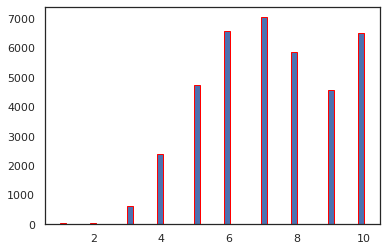

In [ ]:
plt.hist(df[' num_keywords'], edgecolor="red", bins=50)

{'boxes': [<matplotlib.lines.Line2D at 0x7fa225f84350>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa225fa3e50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa225e0d1d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa225ddae90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa225e28290>,
  <matplotlib.lines.Line2D at 0x7fa225eb5b90>]}

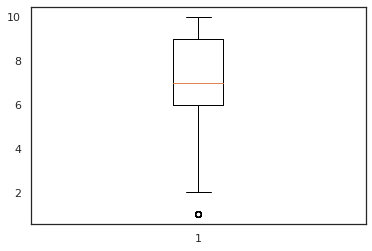

In [ ]:
plt.boxplot(df[' num_keywords'])

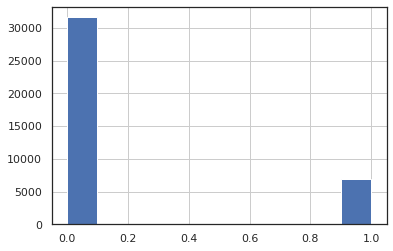

In [ ]:
df[' data_channel_is_entertainment'].hist() 

#dichotomous variable 1 = Entertainment 0 = Not Entertainment

{'boxes': [<matplotlib.lines.Line2D at 0x7fa226108050>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa226132850>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa226724990>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa2264b1bd0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa226108210>,
  <matplotlib.lines.Line2D at 0x7fa226132e10>]}

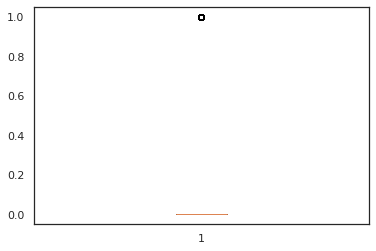

In [ ]:
plt.boxplot(df[' data_channel_is_entertainment'])

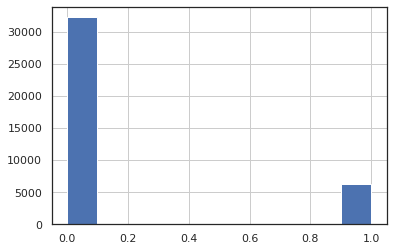

In [ ]:
df[' data_channel_is_bus'].hist() 

#dichotomous variable 1 = business 0 = Not business

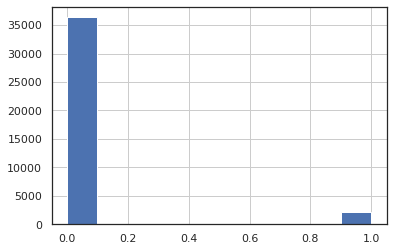

In [ ]:
df[' data_channel_is_lifestyle'].hist() 
#dichotomous variable 1 = lifestyle 0 = Not lifestyle

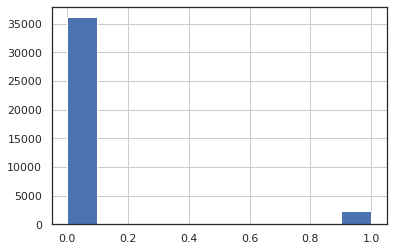

In [ ]:
df[' data_channel_is_socmed'].hist() 
#dichotomous variable 1 = social media 0 = Not social media

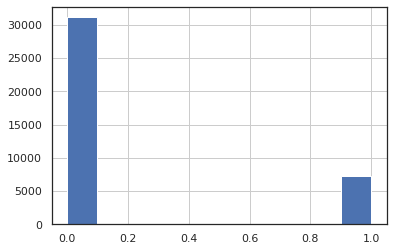

In [ ]:
df[' data_channel_is_tech'].hist() 
#dichotomous variable 1 = technology 0 = Not technology

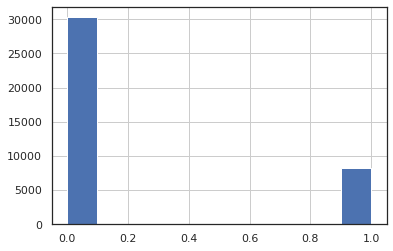

In [ ]:
df[' data_channel_is_world'].hist() 
#dichotomous variable 1 = world 0 = Not world

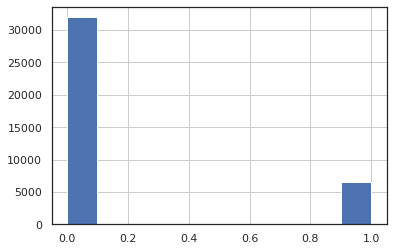

In [ ]:
df[' weekday_is_monday'].hist() 

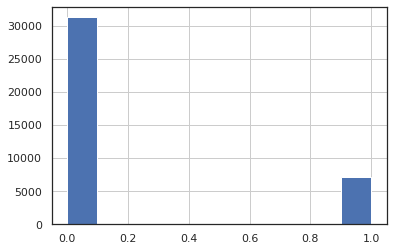

In [ ]:
df[' weekday_is_tuesday'].hist() 

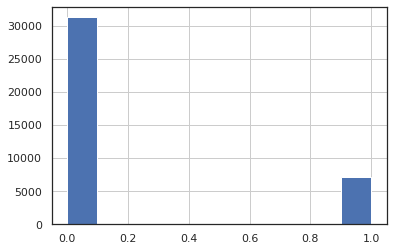

In [ ]:
df[' weekday_is_wednesday'].hist() 

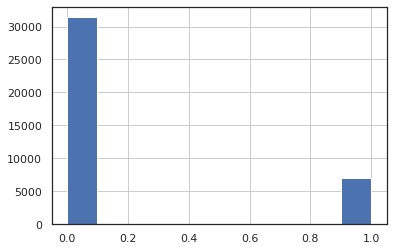

In [ ]:
df[' weekday_is_thursday'].hist() 

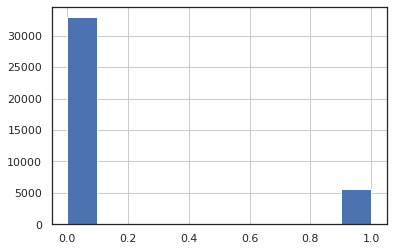

In [ ]:
df[' weekday_is_friday'].hist() 

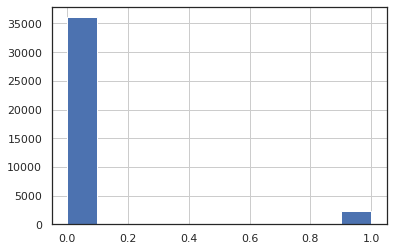

In [ ]:
df[' weekday_is_saturday'].hist() 

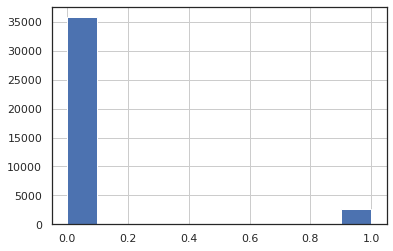

In [ ]:
df[' weekday_is_sunday'].hist() 

(array([1.1600e+02, 1.5900e+03, 1.2725e+04, 1.3777e+04, 5.9390e+03,
        2.6050e+03, 1.0040e+03, 3.2900e+02, 1.2800e+02, 7.8000e+01,
        4.5000e+01, 2.7000e+01, 1.5000e+01, 1.0000e+01, 1.1000e+01,
        1.3000e+01, 7.0000e+00, 1.0000e+01, 8.0000e+00, 2.0000e+00,
        4.0000e+00, 3.0000e+00, 2.0000e+00, 2.0000e+00, 2.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([    0.        ,   871.35319892,  1742.70639783,  2614.05959675,
         3485.41279566,  4356.76599458,  5228.1191935 ,  6099.47239241,
         6970.82559133,  7842.17879024,  8713.53198916,  9584.88518808,
        10456.23838699, 11327.59158591, 12198.94478482, 13070.29798374,
        13941.65118266, 14813.

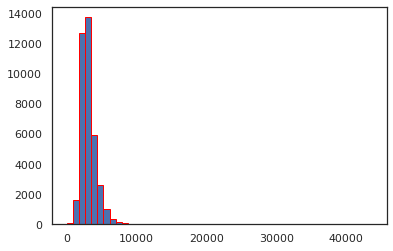

In [ ]:
plt.hist(df[' kw_avg_avg'], edgecolor="red", bins=50)

{'boxes': [<matplotlib.lines.Line2D at 0x7fa225c8aa10>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa2261bbc50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa226215ad0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa226863950>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa225c73790>,
  <matplotlib.lines.Line2D at 0x7fa2260b4b90>]}

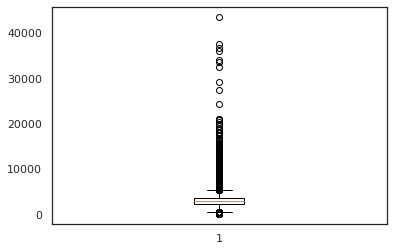

In [ ]:
plt.boxplot(df[' kw_avg_avg'])

In [ ]:
df[' kw_avg_avg'].describe()

count    38462.000000
mean      3103.432767
std       1301.255327
min          0.000000
25%       2373.803939
50%       2850.839108
75%       3550.587454
max      43567.659946
Name:  kw_avg_avg, dtype: float64

{'boxes': [<matplotlib.lines.Line2D at 0x7fa22620b1d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa225b11fd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa225b4bd90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa225b4ba50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa225a62610>,
  <matplotlib.lines.Line2D at 0x7fa225a62ad0>]}

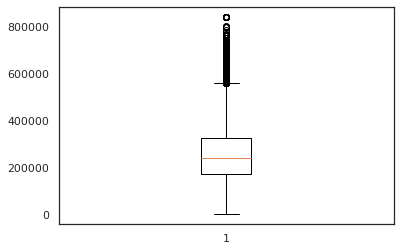

In [ ]:
plt.boxplot(df[' kw_avg_max'])

(array([ 3215.,  6044., 11323.,  9203.,  4670.,  2267.,  1225.,   265.,
          177.,    73.]),
 array([     0.,  84330., 168660., 252990., 337320., 421650., 505980.,
        590310., 674640., 758970., 843300.]),
 <a list of 10 Patch objects>)

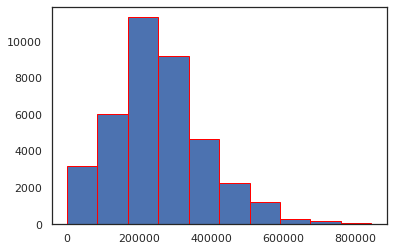

In [ ]:
plt.hist(df[' kw_avg_max'], edgecolor="red", bins=10)

(array([3.7181e+04, 9.0200e+02, 1.7500e+02, 8.0000e+01, 3.6000e+01,
        2.7000e+01, 2.0000e+01, 5.0000e+00, 3.0000e+00, 8.0000e+00,
        2.0000e+00, 3.0000e+00, 3.0000e+00, 0.0000e+00, 1.0000e+00,
        1.0000e+00, 3.0000e+00, 1.0000e+00, 2.0000e+00, 2.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([-1.00000000e+00,  8.55577143e+02,  1.71215429e+03,  2.56873143e+03,
         3.42530857e+03,  4.28188571e+03,  5.13846286e+03,  5.99504000e+03,
         6.85161714e+03,  7.70819429e+03,  8.56477143e+03,  9.42134857e+03,
         1.02779257e+04,  1.11345029e+04,  1.19910800e+04,  1.28476571e+04,
         1.370

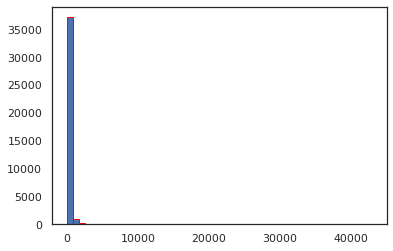

In [ ]:
plt.hist(df[' kw_avg_min'], edgecolor="red", bins=50)

#can drop highly left skewed

{'boxes': [<matplotlib.lines.Line2D at 0x7fa225349810>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa2252cd7d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa2252d5810>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa2252d52d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa225349d10>,
  <matplotlib.lines.Line2D at 0x7fa2252cd290>]}

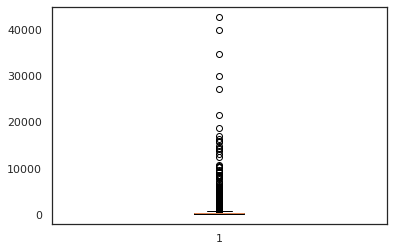

In [ ]:
plt.boxplot(df[' kw_avg_min'])

#drop

{'boxes': [<matplotlib.lines.Line2D at 0x7fa2252a8d10>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa2252afcd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa2252b9d10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa2252b97d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa2252af250>,
  <matplotlib.lines.Line2D at 0x7fa2252af790>]}

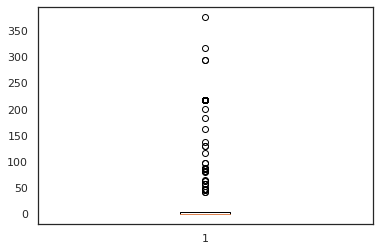

In [ ]:
plt.boxplot(df[' kw_min_min'])

(array([3.3824e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        2.0000e+00, 8.0000e+00, 5.0000e+00, 3.0000e+00, 0.0000e+00,
        4.0000e+00, 6.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 4.5970e+03, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ -1.  ,   6.56,  14.12,  21.68,  29.24,  36.8 ,  44.36,  51.92,
         59.48,  67.04,  74.6 ,  82.16,  89.72,  97.28, 104.84, 112.4 ,
        119.96, 127.52, 135.08, 142.64, 150.2 , 157.76, 165.32, 172.88,
        180.44, 188.  , 195.56, 203.12, 210.68, 218.24, 225.8 , 233.36,
        240.92, 248.48, 256.04

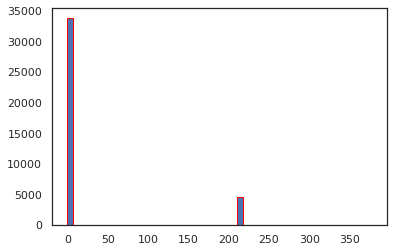

In [ ]:
plt.hist(df[' kw_min_min'], edgecolor="red", bins=50)

#can drop highly left skewd

In [ ]:
df[' kw_min_min'].describe()

count    38462.000000
mean        26.708907
std         70.278986
min         -1.000000
25%         -1.000000
50%         -1.000000
75%          4.000000
max        377.000000
Name:  kw_min_min, dtype: float64

(array([16790.,   611.,  2407.,  3515.,  3101.,  3800.,  3097.,  1897.,
         1797.,  1447.]),
 array([-1.00000000e+00,  3.60403982e+02,  7.21807964e+02,  1.08321195e+03,
         1.44461593e+03,  1.80601991e+03,  2.16742389e+03,  2.52882787e+03,
         2.89023186e+03,  3.25163584e+03,  3.61303982e+03]),
 <a list of 10 Patch objects>)

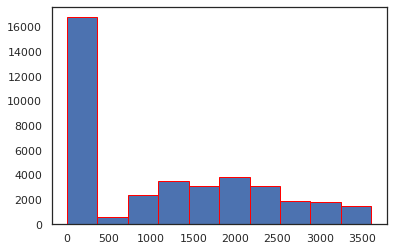

In [ ]:
plt.hist(df[' kw_min_avg'], edgecolor="red", bins=10)

{'boxes': [<matplotlib.lines.Line2D at 0x7fa2250aa3d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa2250b0390>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa2250b83d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa2250b0e50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa2250aa8d0>,
  <matplotlib.lines.Line2D at 0x7fa2250aae10>]}

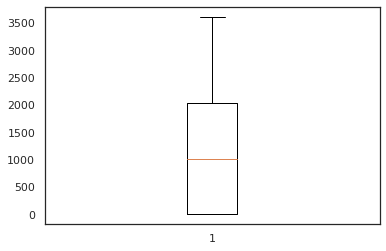

In [ ]:
plt.boxplot(df[' kw_min_avg'])

(array([3.288e+04, 2.572e+03, 1.171e+03, 4.990e+02, 3.370e+02, 2.230e+02,
        1.430e+02, 4.700e+01, 1.530e+02, 8.000e+00, 1.000e+00, 1.600e+01,
        1.830e+02, 3.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        1.400e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 5.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        3.600e+01, 0.000e+00, 2.000e+00, 5.400e+01, 6.400e+01, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 5.000e+01]),
 array([     0.,  16866.,  33732.,  50598.,  67464.,  84330., 101196.,
        118062., 134928., 151794., 168660., 185526., 202392., 219258.,
        236124., 252990., 269856., 286722., 303588., 320454., 337320.,
        354186., 371052., 387918., 404784., 421650., 438516., 455382.,
        472248., 489114., 505980., 522846., 539712., 556578., 573444.,
        590310., 6071

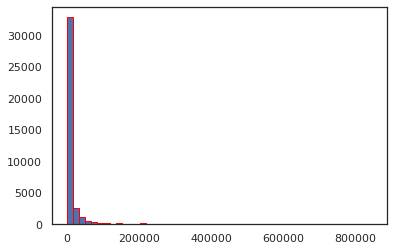

In [ ]:
plt.hist(df[' kw_min_max'], edgecolor="red", bins=50)

#drop

{'boxes': [<matplotlib.lines.Line2D at 0x7fa224f10e50>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa224f18e10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa224f1fe50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa224f1f910>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa224f18390>,
  <matplotlib.lines.Line2D at 0x7fa224f188d0>]}

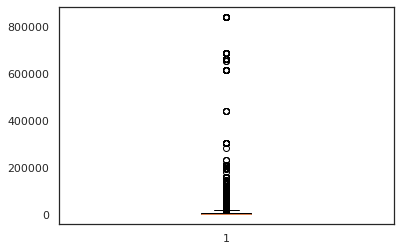

In [ ]:
plt.boxplot(df[' kw_min_max'])

In [ ]:
df[' kw_min_max'].describe()

count     38462.000000
mean      13182.287713
std       56851.196791
min           0.000000
25%           0.000000
50%        1400.000000
75%        7700.000000
max      843300.000000
Name:  kw_min_max, dtype: float64

(array([3.7726e+04, 4.4100e+02, 1.2200e+02, 7.0000e+01, 3.5000e+01,
        1.3000e+01, 1.9000e+01, 2.0000e+00, 5.0000e+00, 5.0000e+00,
        2.0000e+00, 2.0000e+00, 1.0000e+00, 7.0000e+00, 0.0000e+00,
        0.0000e+00, 2.0000e+00, 2.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([     0.,   5968.,  11936.,  17904.,  23872.,  29840.,  35808.,
         41776.,  47744.,  53712.,  59680.,  65648.,  71616.,  77584.,
         83552.,  89520.,  95488., 101456., 107424., 113392., 119360.,
        125328., 131296., 137264., 143232., 149200., 155168., 161136.,
        167104., 173072., 179040.,

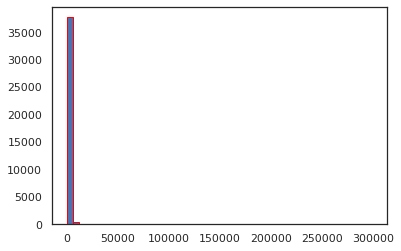

In [ ]:
plt.hist(df[' kw_max_min'], edgecolor="red", bins=50)

#drop

{'boxes': [<matplotlib.lines.Line2D at 0x7fa224df3050>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa224df3fd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa224e03050>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa224dfbad0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa224df3550>,
  <matplotlib.lines.Line2D at 0x7fa224df3a90>]}

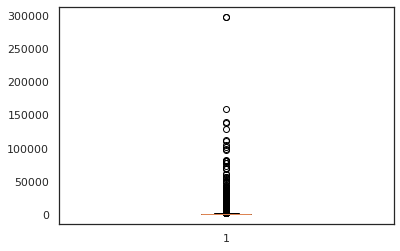

In [ ]:
plt.boxplot(df[' kw_max_min'])

(array([2.8888e+04, 8.2210e+03, 7.2000e+02, 2.5700e+02, 1.2700e+02,
        4.9000e+01, 5.8000e+01, 1.7000e+01, 2.7000e+01, 1.4000e+01,
        1.1000e+01, 1.0000e+01, 7.0000e+00, 1.4000e+01, 7.0000e+00,
        2.0000e+00, 5.0000e+00, 4.0000e+00, 5.0000e+00, 3.0000e+00,
        3.0000e+00, 1.0000e+00, 1.0000e+00, 3.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([     0.,   5968.,  11936.,  17904.,  23872.,  29840.,  35808.,
         41776.,  47744.,  53712.,  59680.,  65648.,  71616.,  77584.,
         83552.,  89520.,  95488., 101456., 107424., 113392., 119360.,
        125328., 131296., 137264., 143232., 149200., 155168., 161136.,
        167104., 173072., 179040.,

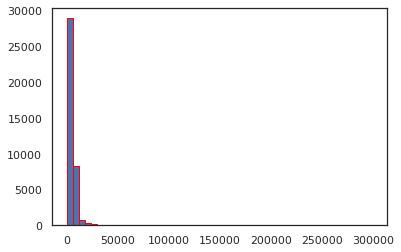

In [ ]:
plt.hist(df[' kw_max_avg'], edgecolor="red", bins=50)

{'boxes': [<matplotlib.lines.Line2D at 0x7fa224c555d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa224c5c5d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa224c62610>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa224c620d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa224c55e10>,
  <matplotlib.lines.Line2D at 0x7fa224c5c090>]}

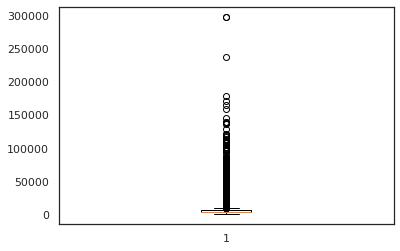

In [ ]:
plt.boxplot(df[' kw_max_avg'])

(array([8.1000e+01, 2.3400e+02, 2.7300e+02, 8.2400e+02, 1.6500e+03,
        2.0000e+00, 6.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 2.0000e+00, 7.1000e+01, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+01, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 2.2490e+03, 0.0000e+00, 0.0000e+00, 4.0000e+00,
        3.9540e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.9097e+04]),
 array([     0.,  16866.,  33732.,  50598.,  67464.,  84330., 101196.,
        118062., 134928., 151794., 168660., 185526., 202392., 219258.,
        236124., 252990., 269856., 286722., 303588., 320454., 337320.,
        354186., 371052., 387918., 404784., 421650., 438516., 455382.,
        472248., 489114., 505980.,

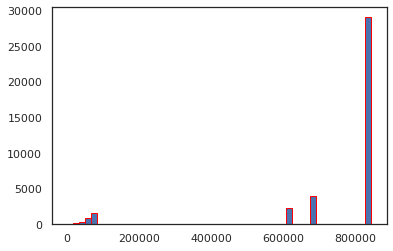

In [ ]:
plt.hist(df[' kw_max_max'], edgecolor="red", bins=50)

{'boxes': [<matplotlib.lines.Line2D at 0x7fa225413e90>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa2253ea6d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa2253a2e90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa225374910>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa2260fa550>,
  <matplotlib.lines.Line2D at 0x7fa2259f7fd0>]}

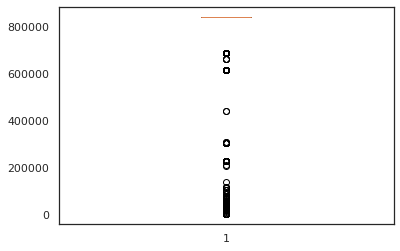

In [ ]:
plt.boxplot(df[' kw_max_max'])

(array([3.6994e+04, 7.7800e+02, 2.5900e+02, 1.8600e+02, 5.8000e+01,
        7.8000e+01, 4.7000e+01, 6.0000e+00, 1.2000e+01, 4.0000e+00,
        0.0000e+00, 4.0000e+00, 7.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00, 1.4000e+01,
        7.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([     0.,  16866.,  33732.,  50598.,  67464.,  84330., 101196.,
        118062., 134928., 151794., 168660., 185526., 202392., 219258.,
        236124., 252990., 269856., 286722., 303588., 320454., 337320.,
        354186., 371052., 387918., 404784., 421650., 438516., 455382.,
        472248., 489114., 505980.,

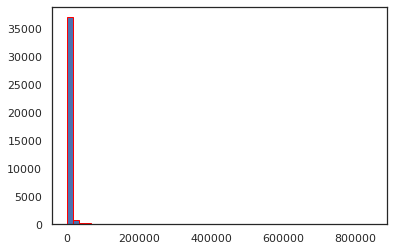

In [ ]:
plt.hist(df[' self_reference_min_shares'], edgecolor="red", bins=50)

#drop

{'boxes': [<matplotlib.lines.Line2D at 0x7fa2249d68d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa2249d9890>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa2249e28d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa2249e2390>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa2249d6dd0>,
  <matplotlib.lines.Line2D at 0x7fa2249d9350>]}

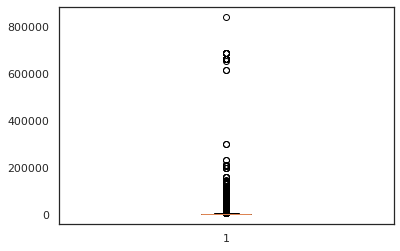

In [ ]:
plt.boxplot(df[' self_reference_min_shares'])

(array([3.2526e+04, 3.3280e+03, 9.9800e+02, 4.8400e+02, 2.6800e+02,
        1.9500e+02, 1.9700e+02, 6.4000e+01, 6.7000e+01, 3.1000e+01,
        1.9000e+01, 6.4000e+01, 5.0000e+01, 1.1000e+01, 4.0000e+00,
        1.0000e+01, 2.2000e+01, 2.0000e+00, 1.2000e+01, 3.0000e+00,
        4.0000e+00, 1.0000e+00, 0.0000e+00, 5.0000e+00, 7.0000e+00,
        0.0000e+00, 1.0000e+01, 1.0000e+01, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 2.0000e+00, 2.0000e+00,
        2.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00, 1.1000e+01,
        5.0000e+00, 7.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00,
        2.0000e+00, 0.0000e+00, 3.0000e+00, 0.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 2.00

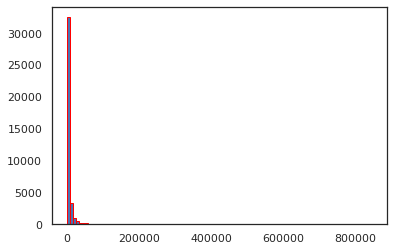

In [ ]:
plt.hist(df[' self_reference_avg_sharess'], edgecolor="red", bins=100)

#drop

{'boxes': [<matplotlib.lines.Line2D at 0x7fa2247ce6d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa2247d3690>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa2247db6d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa2247db190>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa2247cebd0>,
  <matplotlib.lines.Line2D at 0x7fa2247d3150>]}

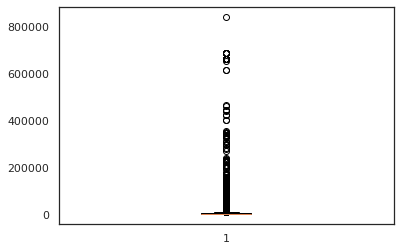

In [ ]:
plt.boxplot(df[' self_reference_avg_sharess'])

In [ ]:
df[' self_reference_avg_sharess'].describe()

count     38462.000000
mean       6598.252157
std       24554.155747
min           0.000000
25%        1100.000000
50%        2300.000000
75%        5300.428571
max      843300.000000
Name:  self_reference_avg_sharess, dtype: float64

(array([2.9045e+04, 4.6970e+03, 1.8600e+03, 6.9100e+02, 4.2400e+02,
        3.6700e+02, 4.1300e+02, 1.3800e+02, 1.2700e+02, 9.3000e+01,
        4.2000e+01, 1.7300e+02, 9.1000e+01, 2.2000e+01, 3.0000e+00,
        2.0000e+01, 4.2000e+01, 5.0000e+00, 5.0000e+00, 2.0000e+00,
        8.0000e+00, 0.0000e+00, 2.0000e+00, 2.1000e+01, 2.2000e+01,
        2.0000e+00, 1.0000e+00, 5.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+01, 1.6000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 5.00

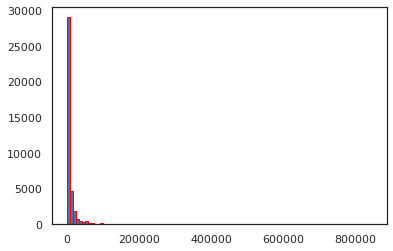

In [ ]:
plt.hist(df[' self_reference_max_shares'], edgecolor="red", bins=100)

#drop

{'boxes': [<matplotlib.lines.Line2D at 0x7fa2245ce7d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa2245d3790>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa2245da7d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa2245da290>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa2245cecd0>,
  <matplotlib.lines.Line2D at 0x7fa2245d3250>]}

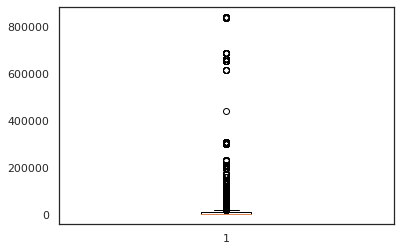

In [ ]:
plt.boxplot(df[' self_reference_max_shares'])

(array([2.0337e+04, 4.3370e+03, 3.1000e+02, 1.9000e+01, 7.2000e+01,
        3.8700e+02, 4.8200e+02, 5.6900e+02, 5.9200e+02, 4.2400e+02,
        5.1100e+02, 3.2500e+02, 5.1900e+02, 2.7600e+02, 2.9000e+02,
        2.9100e+02, 3.6100e+02, 2.1400e+02, 2.3200e+02, 3.2300e+02,
        1.9400e+02, 2.6100e+02, 1.7900e+02, 2.9300e+02, 2.5400e+02,
        1.7100e+02, 1.5000e+02, 2.5200e+02, 2.6700e+02, 2.8700e+02,
        1.3400e+02, 1.9800e+02, 2.0300e+02, 2.1000e+02, 3.7600e+02,
        9.8000e+01, 1.3500e+02, 3.1500e+02, 1.2300e+02, 4.2600e+02,
        7.9000e+01, 1.2000e+02, 2.9800e+02, 3.8900e+02, 6.3000e+01,
        6.6900e+02, 5.5300e+02, 3.5400e+02, 2.0700e+02, 3.3300e+02]),
 array([0.01818197, 0.03635822, 0.05453447, 0.07271072, 0.09088696,
        0.10906321, 0.12723946, 0.14541571, 0.16359196, 0.18176821,
        0.19994445, 0.2181207 , 0.23629695, 0.2544732 , 0.27264945,
        0.2908257 , 0.30900194, 0.32717819, 0.34535444, 0.36353069,
        0.38170694, 0.39988318, 0.41805943, 0.

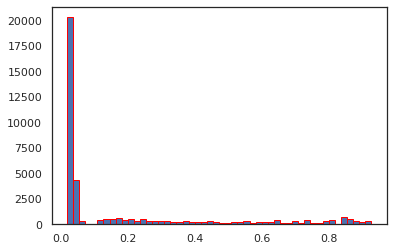

In [ ]:
plt.hist(df[' LDA_00'], edgecolor="red", bins=50)

{'boxes': [<matplotlib.lines.Line2D at 0x7fa2244ac990>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa2244ae950>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa2244b5990>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa2244b5450>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa2244ace90>,
  <matplotlib.lines.Line2D at 0x7fa2244ae410>]}

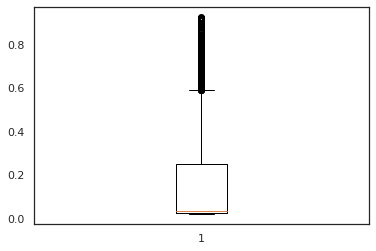

In [ ]:
plt.boxplot(df[' LDA_00'])

(array([2.1449e+04, 5.4860e+03, 5.3900e+02, 1.2000e+01, 8.1000e+01,
        5.1600e+02, 5.0100e+02, 5.7900e+02, 6.5000e+02, 3.4300e+02,
        5.0800e+02, 3.3100e+02, 5.1000e+02, 2.1200e+02, 2.7900e+02,
        3.0900e+02, 3.5200e+02, 1.9000e+02, 2.0200e+02, 3.3600e+02,
        1.9000e+02, 2.1300e+02, 1.6700e+02, 2.0800e+02, 2.1300e+02,
        1.2600e+02, 1.5500e+02, 2.7900e+02, 2.1600e+02, 1.4800e+02,
        1.4200e+02, 1.4700e+02, 1.2100e+02, 1.2500e+02, 2.3600e+02,
        9.3000e+01, 1.3400e+02, 1.8200e+02, 1.0400e+02, 2.0100e+02,
        7.3000e+01, 7.7000e+01, 7.3000e+01, 2.2700e+02, 4.8000e+01,
        3.0400e+02, 3.2300e+02, 2.5100e+02, 1.4900e+02, 1.5200e+02]),
 array([0.01818195, 0.03633725, 0.05449255, 0.07264785, 0.09080316,
        0.10895846, 0.12711376, 0.14526906, 0.16342436, 0.18157966,
        0.19973496, 0.21789026, 0.23604556, 0.25420086, 0.27235616,
        0.29051146, 0.30866676, 0.32682206, 0.34497736, 0.36313267,
        0.38128797, 0.39944327, 0.41759857, 0.

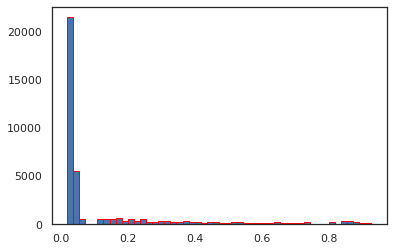

In [ ]:
plt.hist(df[' LDA_01'], edgecolor="red", bins=50)

{'boxes': [<matplotlib.lines.Line2D at 0x7fa22437d350>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa224383310>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa22438a350>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa224383dd0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa22437d850>,
  <matplotlib.lines.Line2D at 0x7fa22437dd90>]}

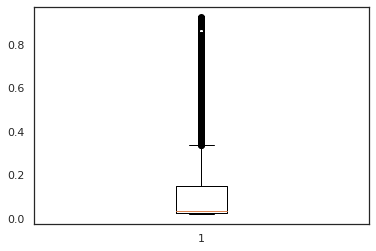

In [ ]:
plt.boxplot(df[' LDA_01'])

(array([1.7631e+04, 4.6330e+03, 4.9800e+02, 1.2000e+01, 8.7000e+01,
        5.0900e+02, 5.9200e+02, 6.3200e+02, 6.9300e+02, 3.3600e+02,
        6.4900e+02, 4.0700e+02, 5.5700e+02, 3.3500e+02, 3.0800e+02,
        3.1100e+02, 4.9100e+02, 2.8900e+02, 2.7600e+02, 3.4200e+02,
        2.0100e+02, 2.5800e+02, 2.0200e+02, 3.0000e+02, 3.1300e+02,
        1.5600e+02, 2.7400e+02, 2.5500e+02, 3.8200e+02, 2.0700e+02,
        1.5800e+02, 1.9700e+02, 2.8900e+02, 1.9200e+02, 3.0300e+02,
        1.6500e+02, 1.2600e+02, 4.1100e+02, 1.9600e+02, 2.5500e+02,
        2.7900e+02, 2.0100e+02, 1.1100e+02, 5.3500e+02, 1.7100e+02,
        5.9500e+02, 1.6700e+02, 6.0200e+02, 8.9500e+02, 4.7800e+02]),
 array([0.01818192, 0.03621826, 0.05425461, 0.07229095, 0.09032729,
        0.10836364, 0.12639998, 0.14443632, 0.16247267, 0.18050901,
        0.19854535, 0.2165817 , 0.23461804, 0.25265438, 0.27069073,
        0.28872707, 0.30676341, 0.32479976, 0.3428361 , 0.36087244,
        0.37890879, 0.39694513, 0.41498147, 0.

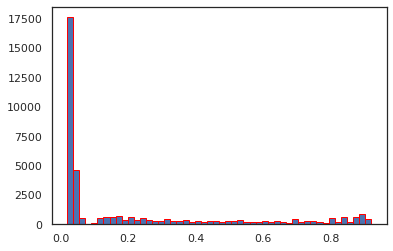

In [ ]:
plt.hist(df[' LDA_02'], edgecolor="red", bins=50)

{'boxes': [<matplotlib.lines.Line2D at 0x7fa2241d5b10>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa2241dbad0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa2241e1b10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa2241e15d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa2241db050>,
  <matplotlib.lines.Line2D at 0x7fa2241db590>]}

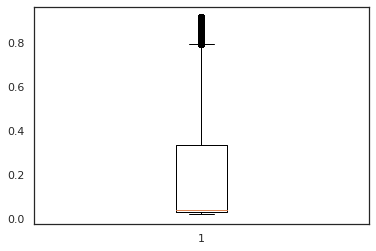

In [ ]:
plt.boxplot(df[' LDA_02'])

(array([18419.,  5221.,   572.,    36.,   146.,   371.,   444.,   420.,
          463.,   380.,   378.,   314.,   401.,   315.,   259.,   246.,
          303.,   208.,   254.,   276.,   237.,   198.,   215.,   249.,
          277.,   182.,   203.,   305.,   277.,   207.,   207.,   251.,
          221.,   237.,   382.,   161.,   249.,   354.,   174.,   379.,
          143.,   248.,   485.,   207.,    86.,   545.,   701.,   678.,
          481.,   497.]),
 array([0.01818199, 0.03634903, 0.05451607, 0.0726831 , 0.09085014,
        0.10901717, 0.12718421, 0.14535124, 0.16351828, 0.18168532,
        0.19985235, 0.21801939, 0.23618642, 0.25435346, 0.2725205 ,
        0.29068753, 0.30885457, 0.3270216 , 0.34518864, 0.36335567,
        0.38152271, 0.39968975, 0.41785678, 0.43602382, 0.45419085,
        0.47235789, 0.49052492, 0.50869196, 0.526859  , 0.54502603,
        0.56319307, 0.5813601 , 0.59952714, 0.61769417, 0.63586121,
        0.65402825, 0.67219528, 0.69036232, 0.70852935, 0.72669639

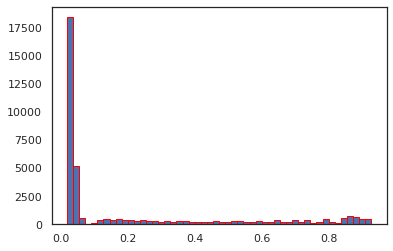

In [ ]:
plt.hist(df[' LDA_03'], edgecolor="red", bins=50)

{'boxes': [<matplotlib.lines.Line2D at 0x7fa2240ba290>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa2240c0250>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa2240c6290>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa2240c0d10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa2240ba790>,
  <matplotlib.lines.Line2D at 0x7fa2240bacd0>]}

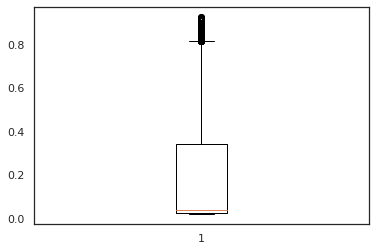

In [ ]:
plt.boxplot(df[' LDA_03'])

(array([15667.,  5391.,   564.,    31.,   126.,   459.,   489.,   512.,
          619.,   538.,   466.,   383.,   584.,   281.,   314.,   416.,
          494.,   225.,   336.,   389.,   317.,   304.,   293.,   410.,
          349.,   194.,   224.,   409.,   344.,   244.,   222.,   305.,
          323.,   270.,   360.,   159.,   278.,   371.,   264.,   452.,
          141.,   322.,   299.,   298.,   204.,   344.,   481.,   590.,
          529.,   878.]),
 array([0.01818228, 0.03636245, 0.05454262, 0.07272279, 0.09090296,
        0.10908313, 0.1272633 , 0.14544347, 0.16362364, 0.18180381,
        0.19998398, 0.21816416, 0.23634433, 0.2545245 , 0.27270467,
        0.29088484, 0.30906501, 0.32724518, 0.34542535, 0.36360552,
        0.38178569, 0.39996586, 0.41814603, 0.4363262 , 0.45450637,
        0.47268654, 0.49086671, 0.50904689, 0.52722706, 0.54540723,
        0.5635874 , 0.58176757, 0.59994774, 0.61812791, 0.63630808,
        0.65448825, 0.67266842, 0.69084859, 0.70902876, 0.72720893

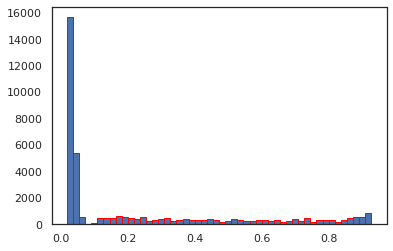

In [ ]:
plt.hist(df[' LDA_04'], edgecolor="red", bins=50)

{'boxes': [<matplotlib.lines.Line2D at 0x7fa224a27450>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa2249f74d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa22499c310>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa224a01a10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa224c89c10>,
  <matplotlib.lines.Line2D at 0x7fa2250b8c90>]}

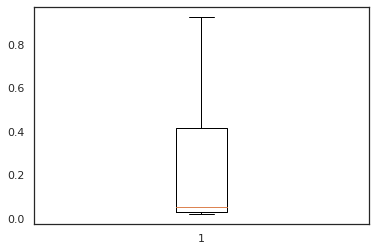

In [ ]:
plt.boxplot(df[' LDA_04'])

(array([2.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 1.200e+01,
        8.000e+00, 2.400e+01, 3.000e+01, 4.800e+01, 8.800e+01, 1.220e+02,
        2.220e+02, 3.560e+02, 4.890e+02, 7.700e+02, 1.091e+03, 1.512e+03,
        1.960e+03, 2.514e+03, 3.146e+03, 3.615e+03, 3.882e+03, 3.962e+03,
        3.389e+03, 3.002e+03, 2.330e+03, 1.783e+03, 1.266e+03, 8.210e+02,
        6.250e+02, 4.250e+02, 3.030e+02, 2.160e+02, 1.420e+02, 8.100e+01,
        7.000e+01, 5.200e+01, 3.700e+01, 1.400e+01, 2.000e+01, 9.000e+00,
        3.000e+00, 5.000e+00, 2.000e+00, 2.000e+00, 3.000e+00, 1.000e+00,
        0.000e+00, 4.000e+00]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <a list of 50 Patch objects

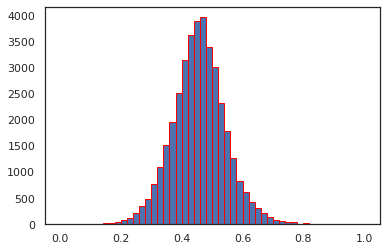

In [ ]:
plt.hist(df[' global_subjectivity'], edgecolor="red", bins=50)

{'boxes': [<matplotlib.lines.Line2D at 0x7fa223e3ad50>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa223e3fd10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa223e46d50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa223e46810>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa223e3f290>,
  <matplotlib.lines.Line2D at 0x7fa223e3f7d0>]}

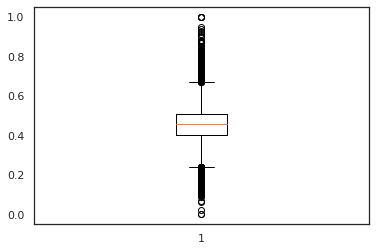

In [ ]:
plt.boxplot(df[' global_subjectivity'])

(array([6.000e+00, 6.000e+00, 8.000e+00, 1.400e+01, 1.300e+01, 1.500e+01,
        1.400e+01, 2.700e+01, 2.400e+01, 4.700e+01, 7.300e+01, 8.400e+01,
        1.420e+02, 2.480e+02, 3.680e+02, 5.460e+02, 9.410e+02, 1.399e+03,
        1.874e+03, 2.483e+03, 3.203e+03, 3.665e+03, 3.967e+03, 4.090e+03,
        3.668e+03, 3.152e+03, 2.440e+03, 1.849e+03, 1.334e+03, 8.890e+02,
        6.340e+02, 3.830e+02, 2.760e+02, 1.600e+02, 1.260e+02, 8.100e+01,
        6.100e+01, 5.000e+01, 2.800e+01, 2.100e+01, 1.500e+01, 1.000e+01,
        1.000e+01, 5.000e+00, 5.000e+00, 5.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([-0.39375   , -0.37131818, -0.34888636, -0.32645455, -0.30402273,
        -0.28159091, -0.25915909, -0.23672727, -0.21429545, -0.19186364,
        -0.16943182, -0.147     , -0.12456818, -0.10213636, -0.07970455,
        -0.05727273, -0.03484091, -0.01240909,  0.01002273,  0.03245455,
         0.05488636,  0.07731818,  0.09975   ,  0.12218182,  0.14461364,
         0.

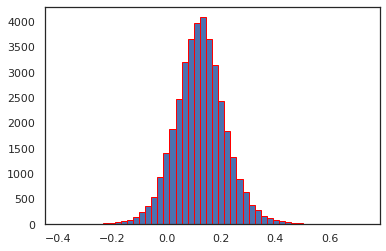

In [ ]:
plt.hist(df[' global_sentiment_polarity'], edgecolor="red", bins=50)

{'boxes': [<matplotlib.lines.Line2D at 0x7fa223c9eb90>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa223ca4b90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa223cabbd0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa223cab690>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa223ca4110>,
  <matplotlib.lines.Line2D at 0x7fa223ca4650>]}

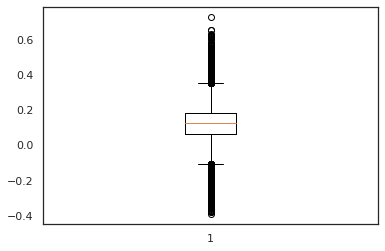

In [ ]:
plt.boxplot(df[' global_sentiment_polarity'])

(array([4.400e+01, 1.020e+02, 2.340e+02, 4.260e+02, 7.330e+02, 1.139e+03,
        1.554e+03, 1.916e+03, 2.237e+03, 2.639e+03, 2.834e+03, 3.121e+03,
        3.060e+03, 2.973e+03, 2.729e+03, 2.416e+03, 2.100e+03, 1.774e+03,
        1.567e+03, 1.222e+03, 9.400e+02, 7.240e+02, 5.450e+02, 3.860e+02,
        2.620e+02, 1.880e+02, 1.380e+02, 1.220e+02, 7.300e+01, 5.700e+01,
        4.900e+01, 3.800e+01, 2.600e+01, 1.800e+01, 1.000e+01, 1.500e+01,
        1.100e+01, 7.000e+00, 6.000e+00, 7.000e+00, 6.000e+00, 1.000e+00,
        6.000e+00, 3.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 2.000e+00]),
 array([0.        , 0.00310976, 0.00621951, 0.00932927, 0.01243902,
        0.01554878, 0.01865854, 0.02176829, 0.02487805, 0.0279878 ,
        0.03109756, 0.03420732, 0.03731707, 0.04042683, 0.04353659,
        0.04664634, 0.0497561 , 0.05286585, 0.05597561, 0.05908537,
        0.06219512, 0.06530488, 0.06841463, 0.07152439, 0.07463415,
        0.0777439 , 0.08085366, 0.08

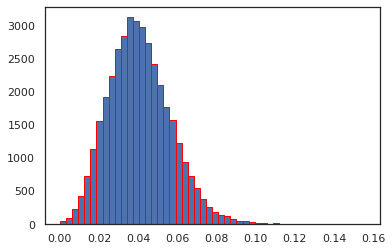

In [ ]:
plt.hist(df[' global_rate_positive_words'], edgecolor="red", bins=50)

{'boxes': [<matplotlib.lines.Line2D at 0x7fa223b0fe90>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa223b15e50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa223b1ce90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa223b1c950>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa223b153d0>,
  <matplotlib.lines.Line2D at 0x7fa223b15910>]}

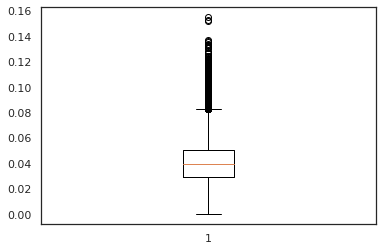

In [ ]:
plt.boxplot(df[' global_rate_positive_words'])

(array([2.178e+03, 3.489e+03, 5.478e+03, 6.523e+03, 6.351e+03, 5.050e+03,
        3.395e+03, 2.071e+03, 1.321e+03, 8.070e+02, 5.690e+02, 3.470e+02,
        2.780e+02, 1.850e+02, 1.510e+02, 1.090e+02, 5.400e+01, 2.100e+01,
        1.800e+01, 1.100e+01, 6.000e+00, 1.500e+01, 1.000e+01, 7.000e+00,
        6.000e+00, 2.000e+00, 1.000e+00, 3.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([0.        , 0.00369863, 0.00739726, 0.01109589, 0.01479452,
        0.01849315, 0.02219178, 0.02589041, 0.02958904, 0.03328767,
        0.0369863 , 0.04068493, 0.04438356, 0.04808219, 0.05178082,
        0.05547945, 0.05917808, 0.06287671, 0.06657534, 0.07027397,
        0.0739726 , 0.07767123, 0.08136986, 0.08506849, 0.08876712,
        0.09246575, 0.09616438, 0.09

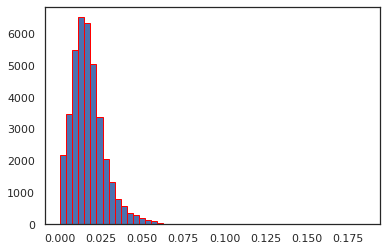

In [ ]:
plt.hist(df[' global_rate_negative_words'], edgecolor="red", bins=50)

{'boxes': [<matplotlib.lines.Line2D at 0x7fa223a04b90>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa223a0ab50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa223991b90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa223991650>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa223a0a0d0>,
  <matplotlib.lines.Line2D at 0x7fa223a0a610>]}

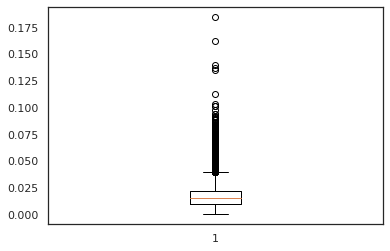

In [ ]:
plt.boxplot(df[' global_rate_negative_words'])

(array([3.500e+01, 1.000e+00, 3.000e+00, 4.000e+00, 9.000e+00, 1.000e+01,
        9.000e+00, 2.100e+01, 2.500e+01, 1.100e+01, 4.500e+01, 4.600e+01,
        7.800e+01, 4.600e+01, 6.900e+01, 9.400e+01, 1.980e+02, 1.000e+02,
        2.020e+02, 1.110e+02, 3.920e+02, 3.630e+02, 3.980e+02, 4.740e+02,
        2.470e+02, 1.410e+03, 8.530e+02, 9.860e+02, 1.232e+03, 9.230e+02,
        1.736e+03, 1.660e+03, 1.495e+03, 2.222e+03, 2.295e+03, 1.935e+03,
        2.258e+03, 2.206e+03, 2.230e+03, 1.427e+03, 2.457e+03, 1.613e+03,
        1.518e+03, 1.057e+03, 8.620e+02, 8.720e+02, 5.080e+02, 2.510e+02,
        9.300e+01, 1.372e+03]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <a list of 50 Patch objects

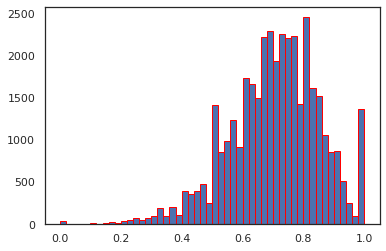

In [ ]:
plt.hist(df[' rate_positive_words'], edgecolor="red", bins=50)

{'boxes': [<matplotlib.lines.Line2D at 0x7fa223861fd0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa22386af90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa223870fd0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa223870a90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa22386a510>,
  <matplotlib.lines.Line2D at 0x7fa22386aa50>]}

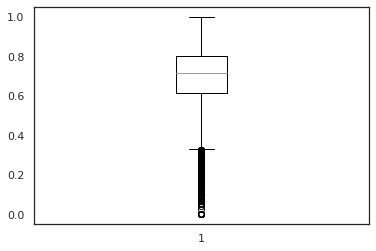

In [ ]:
plt.boxplot(df[' rate_positive_words'])

(array([1.376e+03, 8.300e+01, 2.610e+02, 4.870e+02, 6.270e+02, 1.079e+03,
        1.101e+03, 1.451e+03, 1.685e+03, 1.420e+03, 2.432e+03, 2.169e+03,
        2.278e+03, 2.176e+03, 2.038e+03, 2.203e+03, 2.302e+03, 1.417e+03,
        1.736e+03, 1.024e+03, 1.638e+03, 1.189e+03, 1.037e+03, 8.180e+02,
        3.240e+02, 1.327e+03, 5.160e+02, 3.830e+02, 3.780e+02, 1.980e+02,
        3.070e+02, 1.900e+02, 1.120e+02, 1.950e+02, 9.700e+01, 6.700e+01,
        4.800e+01, 7.600e+01, 4.800e+01, 9.000e+00, 4.700e+01, 2.500e+01,
        2.000e+01, 9.000e+00, 8.000e+00, 1.200e+01, 4.000e+00, 3.000e+00,
        1.000e+00, 3.100e+01]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <a list of 50 Patch objects

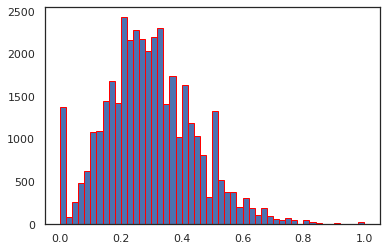

In [ ]:
plt.hist(df[' rate_negative_words'], edgecolor="red", bins=50)

{'boxes': [<matplotlib.lines.Line2D at 0x7fa223746790>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa2236cd750>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa2236d4790>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa2236d4250>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa223746c90>,
  <matplotlib.lines.Line2D at 0x7fa2236cd210>]}

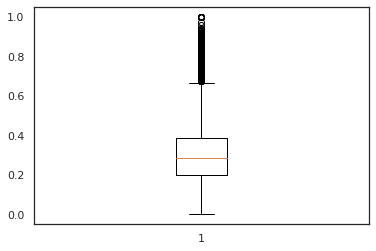

In [ ]:
plt.boxplot(df[' rate_negative_words'])

(array([5.553e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 3.410e+02,
        2.210e+02, 0.000e+00, 0.000e+00, 0.000e+00, 3.045e+03, 0.000e+00,
        3.540e+02, 1.000e+00, 2.830e+02, 2.604e+03, 4.710e+02, 3.000e+01,
        2.520e+02, 0.000e+00, 3.712e+03, 3.000e+00, 1.900e+01, 0.000e+00,
        0.000e+00, 6.894e+03, 3.000e+00, 0.000e+00, 1.320e+02, 9.000e+00,
        4.096e+03, 4.300e+01, 3.000e+00, 4.770e+02, 2.273e+03, 3.550e+02,
        0.000e+00, 1.284e+03, 2.100e+01, 1.506e+03, 3.330e+02, 1.025e+03,
        4.170e+02, 7.630e+02, 3.460e+02, 2.000e+00, 9.000e+01, 1.190e+02,
        1.300e+01, 1.369e+03]),
 array([-1.  , -0.98, -0.96, -0.94, -0.92, -0.9 , -0.88, -0.86, -0.84,
        -0.82, -0.8 , -0.78, -0.76, -0.74, -0.72, -0.7 , -0.68, -0.66,
        -0.64, -0.62, -0.6 , -0.58, -0.56, -0.54, -0.52, -0.5 , -0.48,
        -0.46, -0.44, -0.42, -0.4 , -0.38, -0.36, -0.34, -0.32, -0.3 ,
        -0.28, -0.26, -0.24, -0.22, -0.2 , -0.18, -0.16, -0.14, -0.12,
        -0.1 , -0.08,

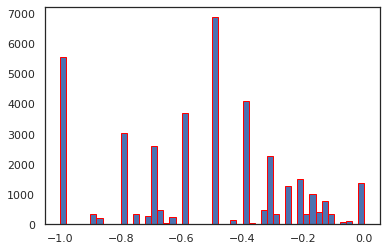

In [ ]:
plt.hist(df[' min_negative_polarity'], edgecolor="red", bins=50)

{'boxes': [<matplotlib.lines.Line2D at 0x7fa2235a2790>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa2235a7750>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa2235af790>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa2235af250>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa2235a2c90>,
  <matplotlib.lines.Line2D at 0x7fa2235a7210>]}

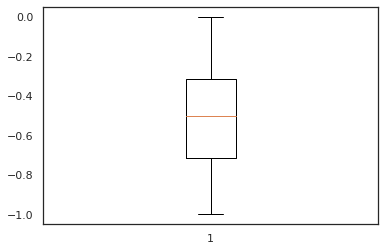

In [ ]:
plt.boxplot(df[' min_negative_polarity'])

(array([5.100e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.100e+01,
        5.000e+00, 3.000e+00, 4.000e+00, 1.000e+00, 4.200e+01, 6.000e+00,
        2.000e+01, 1.900e+01, 1.100e+01, 9.000e+01, 3.100e+01, 3.500e+01,
        5.500e+01, 3.500e+01, 2.010e+02, 1.010e+02, 1.470e+02, 1.650e+02,
        1.800e+02, 5.540e+02, 4.010e+02, 5.530e+02, 7.460e+02, 8.170e+02,
        1.480e+03, 1.375e+03, 1.699e+03, 1.986e+03, 2.770e+03, 2.468e+03,
        2.858e+03, 3.052e+03, 2.992e+03, 3.118e+03, 2.424e+03, 2.247e+03,
        1.660e+03, 1.363e+03, 8.560e+02, 1.810e+02, 1.410e+02, 1.230e+02,
        1.600e+01, 1.369e+03]),
 array([-1.  , -0.98, -0.96, -0.94, -0.92, -0.9 , -0.88, -0.86, -0.84,
        -0.82, -0.8 , -0.78, -0.76, -0.74, -0.72, -0.7 , -0.68, -0.66,
        -0.64, -0.62, -0.6 , -0.58, -0.56, -0.54, -0.52, -0.5 , -0.48,
        -0.46, -0.44, -0.42, -0.4 , -0.38, -0.36, -0.34, -0.32, -0.3 ,
        -0.28, -0.26, -0.24, -0.22, -0.2 , -0.18, -0.16, -0.14, -0.12,
        -0.1 , -0.08,

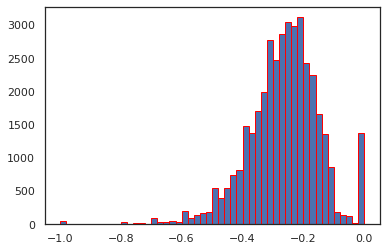

In [ ]:
plt.hist(df[' avg_negative_polarity'], edgecolor="red", bins=50)

{'boxes': [<matplotlib.lines.Line2D at 0x7fa223481150>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa223487110>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa22340e150>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa223487bd0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa223481650>,
  <matplotlib.lines.Line2D at 0x7fa223481b90>]}

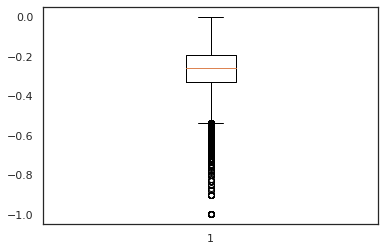

In [ ]:
plt.boxplot(df[' avg_negative_polarity'])

(array([5.100e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 6.000e+00,
        3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 4.000e+01, 0.000e+00,
        2.000e+00, 0.000e+00, 4.000e+00, 5.600e+01, 1.000e+01, 0.000e+00,
        4.000e+00, 0.000e+00, 9.000e+01, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 3.560e+02, 0.000e+00, 0.000e+00, 1.400e+01, 0.000e+00,
        5.420e+02, 7.000e+00, 0.000e+00, 1.000e+02, 5.500e+02, 1.210e+02,
        0.000e+00, 4.970e+02, 1.500e+01, 1.233e+03, 6.170e+02, 1.827e+03,
        1.709e+03, 5.609e+03, 8.819e+03, 2.360e+02, 3.295e+03, 9.948e+03,
        9.090e+02, 1.791e+03]),
 array([-1.  , -0.98, -0.96, -0.94, -0.92, -0.9 , -0.88, -0.86, -0.84,
        -0.82, -0.8 , -0.78, -0.76, -0.74, -0.72, -0.7 , -0.68, -0.66,
        -0.64, -0.62, -0.6 , -0.58, -0.56, -0.54, -0.52, -0.5 , -0.48,
        -0.46, -0.44, -0.42, -0.4 , -0.38, -0.36, -0.34, -0.32, -0.3 ,
        -0.28, -0.26, -0.24, -0.22, -0.2 , -0.18, -0.16, -0.14, -0.12,
        -0.1 , -0.08,

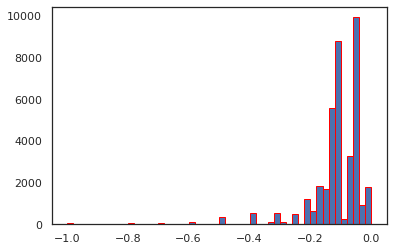

In [ ]:
plt.hist(df[' max_negative_polarity'], edgecolor="red", bins=50)

{'boxes': [<matplotlib.lines.Line2D at 0x7fa2232db690>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa2232e1650>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa2232e9690>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa2232e9150>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa2232dbb90>,
  <matplotlib.lines.Line2D at 0x7fa2232e1110>]}

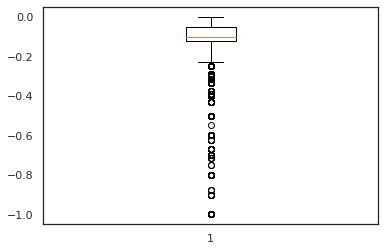

In [ ]:
plt.boxplot(df[' max_negative_polarity'])

(array([3.5000e+01, 7.3990e+03, 4.4120e+03, 2.8050e+03, 1.3300e+02,
        1.5437e+04, 4.0710e+03, 1.0000e+02, 9.2300e+02, 0.0000e+00,
        1.4940e+03, 1.0000e+01, 6.4500e+02, 0.0000e+00, 9.4000e+01,
        1.5300e+02, 7.5000e+01, 1.0600e+02, 1.1000e+02, 0.0000e+00,
        1.3900e+02, 1.6000e+01, 3.0000e+00, 0.0000e+00, 0.0000e+00,
        2.5800e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.9000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 8.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        7.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 8.0000e+00]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.

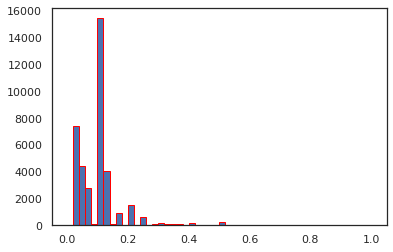

In [ ]:
plt.hist(df[' min_positive_polarity'], edgecolor="red", bins=50)

{'boxes': [<matplotlib.lines.Line2D at 0x7fa2231bdad0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa2231c3a90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa2231caad0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa2231ca590>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa2231bdfd0>,
  <matplotlib.lines.Line2D at 0x7fa2231c3550>]}

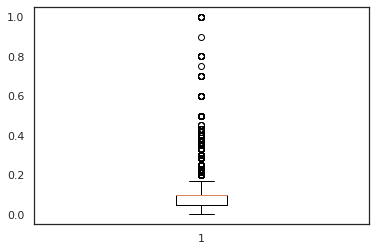

In [ ]:
plt.boxplot(df[' min_positive_polarity'])

(array([3.500e+01, 7.000e+00, 4.000e+00, 1.300e+01, 1.600e+01, 6.200e+01,
        1.020e+02, 1.180e+02, 1.910e+02, 2.870e+02, 5.020e+02, 8.550e+02,
        1.316e+03, 1.814e+03, 2.403e+03, 3.236e+03, 3.729e+03, 4.169e+03,
        4.054e+03, 3.662e+03, 3.255e+03, 2.526e+03, 1.798e+03, 1.233e+03,
        8.770e+02, 7.470e+02, 4.050e+02, 3.000e+02, 2.040e+02, 1.140e+02,
        1.260e+02, 7.400e+01, 6.100e+01, 4.000e+01, 4.500e+01, 9.000e+00,
        1.500e+01, 1.700e+01, 6.000e+00, 2.000e+00, 1.300e+01, 5.000e+00,
        3.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 8.000e+00]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <a list of 50 Patch objects

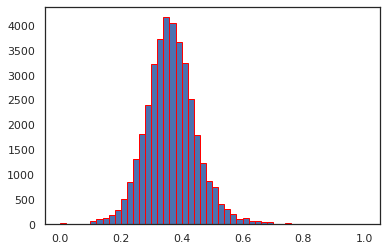

In [ ]:
plt.hist(df[' avg_positive_polarity'], edgecolor="red", bins=50)

{'boxes': [<matplotlib.lines.Line2D at 0x7fa223a48650>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa223b70390>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa223d98f50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa223d4a050>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa223a48c90>,
  <matplotlib.lines.Line2D at 0x7fa223aecc50>]}

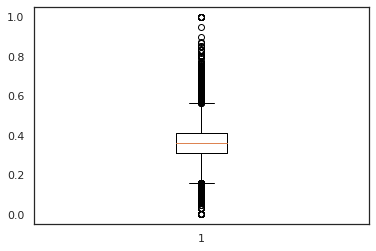

In [ ]:
plt.boxplot(df[' avg_positive_polarity'])

(array([3.5000e+01, 7.0000e+00, 3.0000e+00, 3.0000e+00, 0.0000e+00,
        4.7000e+01, 6.5000e+01, 2.0000e+00, 2.2000e+01, 0.0000e+00,
        9.9000e+01, 1.0000e+00, 1.4000e+02, 0.0000e+00, 2.5000e+01,
        7.7000e+01, 4.9000e+01, 1.0100e+02, 1.6400e+02, 0.0000e+00,
        4.8000e+02, 6.3000e+01, 1.3000e+01, 0.0000e+00, 0.0000e+00,
        6.6210e+03, 0.0000e+00, 1.2200e+02, 0.0000e+00, 0.0000e+00,
        4.1430e+03, 0.0000e+00, 6.0000e+00, 5.5000e+01, 3.1480e+03,
        0.0000e+00, 2.8000e+01, 7.1600e+02, 0.0000e+00, 0.0000e+00,
        5.6040e+03, 1.3000e+01, 6.6400e+02, 0.0000e+00, 0.0000e+00,
        1.1220e+03, 0.0000e+00, 3.0000e+00, 0.0000e+00, 1.4821e+04]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.

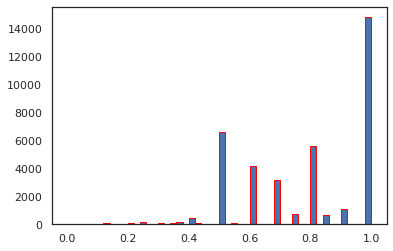

In [ ]:
plt.hist(df[' max_positive_polarity'], edgecolor="red", bins=50)

{'boxes': [<matplotlib.lines.Line2D at 0x7fa222f41b90>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa222f46b50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa222ecdb90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa222ecd650>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa222f460d0>,
  <matplotlib.lines.Line2D at 0x7fa222f46610>]}

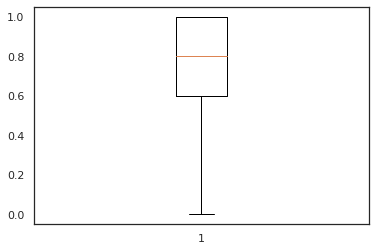

In [ ]:
plt.boxplot(df[' max_positive_polarity'])

(array([1.7552e+04, 4.8000e+01, 1.9000e+02, 4.6200e+02, 3.7000e+01,
        7.7600e+02, 2.1700e+02, 1.7200e+02, 1.8400e+02, 6.0000e+01,
        7.5900e+02, 2.1700e+02, 4.0100e+02, 1.6200e+02, 3.2500e+02,
        1.0010e+03, 7.1700e+02, 2.6000e+02, 5.5400e+02, 1.3900e+02,
        1.4630e+03, 3.0300e+02, 1.4390e+03, 2.0900e+02, 1.0000e+02,
        2.6040e+03, 2.5100e+02, 4.2800e+02, 1.9800e+02, 1.2200e+02,
        6.9600e+02, 1.8400e+02, 5.0200e+02, 4.5500e+02, 6.0200e+02,
        5.4000e+01, 1.4700e+02, 4.8700e+02, 6.1000e+01, 2.2000e+01,
        3.2300e+02, 1.7000e+02, 1.4700e+02, 5.8000e+01, 1.6000e+01,
        6.0600e+02, 8.0000e+00, 1.3600e+02, 7.0000e+00, 2.4310e+03]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.

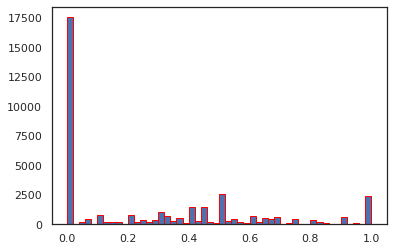

In [ ]:
plt.hist(df[' title_subjectivity'], edgecolor="red", bins=50)

{'boxes': [<matplotlib.lines.Line2D at 0x7fa222dac550>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa222db0510>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa222db8550>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa222db0fd0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa222daca50>,
  <matplotlib.lines.Line2D at 0x7fa222dacf90>]}

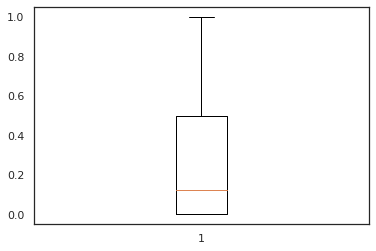

In [ ]:
plt.boxplot(df[' title_subjectivity'])

(array([1.6400e+02, 0.0000e+00, 1.5000e+01, 1.2000e+01, 1.0000e+00,
        7.5000e+01, 9.0000e+00, 1.3800e+02, 2.1000e+01, 3.6000e+01,
        1.8800e+02, 1.6000e+01, 5.3800e+02, 3.5000e+01, 4.1000e+01,
        5.6300e+02, 1.4000e+02, 3.0800e+02, 2.5900e+02, 5.4800e+02,
        3.1800e+02, 8.6200e+02, 5.4000e+02, 5.0500e+02, 2.4400e+02,
        1.9967e+04, 6.4800e+02, 1.1150e+03, 1.7820e+03, 5.8700e+02,
        1.1400e+03, 1.3820e+03, 7.0700e+02, 5.8600e+02, 8.7800e+02,
        2.3600e+02, 1.4500e+02, 2.0710e+03, 1.3700e+02, 3.2800e+02,
        3.0000e+01, 5.3000e+01, 1.8800e+02, 6.4000e+01, 1.0000e+00,
        2.0000e+02, 4.3000e+01, 6.8000e+01, 1.0000e+00, 5.2900e+02]),
 array([-1.  , -0.96, -0.92, -0.88, -0.84, -0.8 , -0.76, -0.72, -0.68,
        -0.64, -0.6 , -0.56, -0.52, -0.48, -0.44, -0.4 , -0.36, -0.32,
        -0.28, -0.24, -0.2 , -0.16, -0.12, -0.08, -0.04,  0.  ,  0.04,
         0.08,  0.12,  0.16,  0.2 ,  0.24,  0.28,  0.32,  0.36,  0.4 ,
         0.44,  0.48,  0.52,  0.56

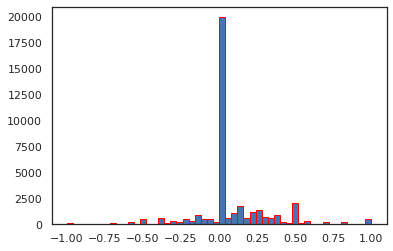

In [ ]:
plt.hist(df[' title_sentiment_polarity'], edgecolor="red", bins=50)

#most titles have neutral sentiment

{'boxes': [<matplotlib.lines.Line2D at 0x7fa222c18150>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa222c1e110>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa222c25150>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa222c1ebd0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa222c18650>,
  <matplotlib.lines.Line2D at 0x7fa222c18b90>]}

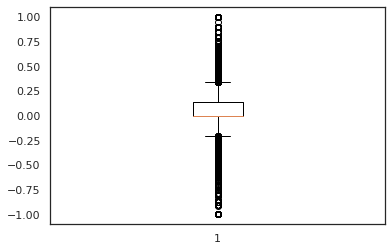

In [ ]:
plt.boxplot(df[' title_sentiment_polarity'])

(array([2.5770e+03, 1.2600e+02, 2.3700e+02, 2.2400e+02, 1.3430e+03,
        5.2400e+02, 2.5000e+02, 2.5000e+02, 2.3800e+02, 3.7000e+01,
        2.0060e+03, 1.4000e+02, 5.8200e+02, 1.5500e+02, 2.2900e+02,
        5.3400e+02, 1.0280e+03, 1.4100e+02, 1.5300e+02, 2.4000e+01,
        1.4730e+03, 3.3400e+02, 1.9100e+02, 1.1900e+02, 1.9000e+01,
        8.6900e+02, 1.0600e+02, 1.7200e+02, 8.5000e+01, 1.6000e+01,
        1.0060e+03, 5.7000e+01, 4.7000e+01, 3.0700e+02, 2.6200e+02,
        5.7000e+01, 3.6000e+01, 2.3900e+02, 2.6000e+01, 3.0000e+00,
        1.3560e+03, 5.0000e+01, 2.1000e+01, 4.4900e+02, 7.0000e+00,
        3.1900e+02, 4.0000e+01, 1.5000e+01, 0.0000e+00, 1.9983e+04]),
 array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
        0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
        0.44, 0.45, 0.

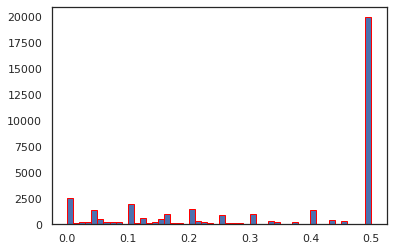

In [ ]:
plt.hist(df[' abs_title_subjectivity'], edgecolor="red", bins=50)

{'boxes': [<matplotlib.lines.Line2D at 0x7fa222b02dd0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa222b06d90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa222a8edd0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa222a8e890>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa222b06310>,
  <matplotlib.lines.Line2D at 0x7fa222b06850>]}

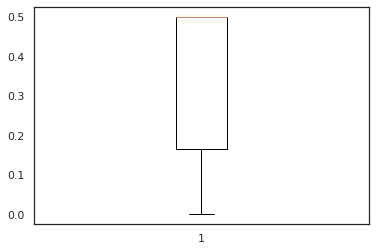

In [ ]:
plt.boxplot(df[' abs_title_subjectivity'])

(array([1.9703e+04, 5.0800e+02, 5.5800e+02, 5.8400e+02, 2.4600e+02,
        1.4180e+03, 2.0750e+03, 5.7100e+02, 6.5500e+02, 2.5000e+02,
        1.5220e+03, 1.6600e+02, 1.4330e+03, 2.0800e+02, 1.7300e+02,
        8.4100e+02, 3.6100e+02, 3.6600e+02, 3.0500e+02, 4.0000e+01,
        1.2160e+03, 1.5700e+02, 1.2600e+02, 5.4000e+01, 1.9000e+01,
        2.5900e+03, 2.8000e+01, 1.2500e+02, 3.8000e+01, 6.0000e+00,
        4.8000e+02, 5.8000e+01, 3.6000e+01, 3.8000e+01, 3.0800e+02,
        1.8000e+01, 2.0000e+00, 7.1000e+01, 0.0000e+00, 4.0000e+00,
        2.7300e+02, 0.0000e+00, 4.7000e+01, 8.0000e+00, 0.0000e+00,
        8.3000e+01, 0.0000e+00, 1.0000e+00, 0.0000e+00, 6.9300e+02]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.

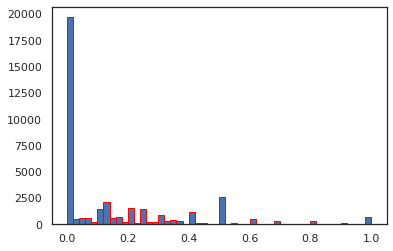

In [ ]:
plt.hist(df[' abs_title_sentiment_polarity'], edgecolor="red", bins=50)

{'boxes': [<matplotlib.lines.Line2D at 0x7fa222965c90>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa22296ec50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa222975cd0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa222975790>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa22296e1d0>,
  <matplotlib.lines.Line2D at 0x7fa22296e710>]}

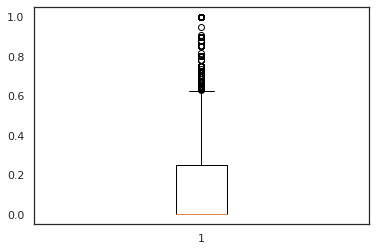

In [ ]:
plt.boxplot(df[' abs_title_sentiment_polarity'])

In [ ]:
cormat = df.corr()
round(cormat,2)

timedelta   n_tokens_title  \
 timedelta                            1.00            -0.24   
 n_tokens_title                      -0.24             1.00   
 n_tokens_content                    -0.10             0.03   
 n_unique_tokens                      0.13            -0.03   
 n_non_stop_words                    -0.13             0.04   
 n_non_stop_unique_tokens             0.11            -0.02   
 num_hrefs                           -0.03            -0.05   
 num_self_hrefs                       0.04            -0.01   
 num_imgs                            -0.03            -0.01   
 num_videos                          -0.00             0.05   
 average_token_length                -0.05            -0.09   
 num_keywords                         0.05            -0.01   
 data_channel_is_lifestyle            0.05            -0.07   
 data_channel_is_entertainment       -0.05             0.13   
 data_channel_is_bus                  0.05            -0.02   
 data_channel_is_socmed               0.07            -0.09   
 data_channel_is_tech                 0.07            -0.04   
 data_channel_is_world               -0.18             0.05   
 kw_min_min                           0.59            -0.11   
 kw_max_min                           0.03            -0.01   
 kw_avg_min                           0.13            -0.03   
 kw_min_max                          -0.07             0.01   
 kw_max_max                          -0.64             0.12   
 kw_avg_max                          -0.48             0.11   
 kw_min_avg                          -0.15            -0.01   
 kw_max_avg                          -0.04             0.00   
 kw_avg_avg                          -0.14            -0.01   
 self_reference_min_shares           -0.02            -0.00   
 self_reference_max_shares           -0.02             0.00   
 self_reference_avg_sharess          -0.02             0.00   
 weekday_is_monday                   -0.01             0.00   
 weekday_is_tuesday                  -0.00             0.01   
 weekday_is_wednesday                 0.01             0.01   
 weekday_is_thursday                  0.01            -0.02   
 weekday_is_friday                   -0.00            -0.00   
 weekday_is_saturday                 -0.01            -0.01   
 weekday_is_sunday                    0.00             0.01   
 is_weekend                          -0.00            -0.00   
 LDA_00                               0.07            -0.07   
 LDA_01                              -0.00             0.07   
 LDA_02                              -0.15             0.04   
 LDA_03                               0.01             0.03   
 LDA_04                               0.08            -0.06   
 global_subjectivity                  0.04            -0.04   
 global_sentiment_polarity            0.13            -0.07   
 global_rate_positive_words           0.16            -0.05   
 global_rate_negative_words          -0.03             0.03   
 rate_positive_words                  0.13            -0.05   
 rate_negative_words                 -0.13             0.05   
 avg_positive_polarity                0.04            -0.03   
 min_positive_polarity                0.02            -0.02   
 max_positive_polarity                0.02             0.00   
 avg_negative_polarity                0.06            -0.04   
 min_negative_polarity                0.12            -0.05   
 max_negative_polarity               -0.03             0.00   
 title_subjectivity                  -0.01             0.08   
 title_sentiment_polarity             0.04             0.00   
 abs_title_subjectivity               0.01            -0.15   
 abs_title_sentiment_polarity         0.00             0.04   
 shares                               0.01             0.01   

                                 n_tokens_content   n_unique_tokens  \
 timedelta                                  -0.10              0.13   
 n_tokens_title                              0.

In [ ]:
cormat[abs(cormat) > 0.70]

timedelta   n_tokens_title  \
 timedelta                             1.0              NaN   
 n_tokens_title                        NaN              1.0   
 n_tokens_content                      NaN              NaN   
 n_unique_tokens                       NaN              NaN   
 n_non_stop_words                      NaN              NaN   
 n_non_stop_unique_tokens              NaN              NaN   
 num_hrefs                             NaN              NaN   
 num_self_hrefs                        NaN              NaN   
 num_imgs                              NaN              NaN   
 num_videos                            NaN              NaN   
 average_token_length                  NaN              NaN   
 num_keywords                          NaN              NaN   
 data_channel_is_lifestyle             NaN              NaN   
 data_channel_is_entertainment         NaN              NaN   
 data_channel_is_bus                   NaN              NaN   
 data_channel_is_socmed                NaN              NaN   
 data_channel_is_tech                  NaN              NaN   
 data_channel_is_world                 NaN              NaN   
 kw_min_min                            NaN              NaN   
 kw_max_min                            NaN              NaN   
 kw_avg_min                            NaN              NaN   
 kw_min_max                            NaN              NaN   
 kw_max_max                            NaN              NaN   
 kw_avg_max                            NaN              NaN   
 kw_min_avg                            NaN              NaN   
 kw_max_avg                            NaN              NaN   
 kw_avg_avg                            NaN              NaN   
 self_reference_min_shares             NaN              NaN   
 self_reference_max_shares             NaN              NaN   
 self_reference_avg_sharess            NaN              NaN   
 weekday_is_monday                     NaN              NaN   
 weekday_is_tuesday                    NaN              NaN   
 weekday_is_wednesday                  NaN              NaN   
 weekday_is_thursday                   NaN              NaN   
 weekday_is_friday                     NaN              NaN   
 weekday_is_saturday                   NaN              NaN   
 weekday_is_sunday                     NaN              NaN   
 is_weekend                            NaN              NaN   
 LDA_00                                NaN              NaN   
 LDA_01                                NaN              NaN   
 LDA_02                                NaN              NaN   
 LDA_03                                NaN              NaN   
 LDA_04                                NaN              NaN   
 global_subjectivity                   NaN              NaN   
 global_sentiment_polarity             NaN              NaN   
 global_rate_positive_words            NaN              NaN   
 global_rate_negative_words            NaN              NaN   
 rate_positive_words                   NaN              NaN   
 rate_negative_words                   NaN              NaN   
 avg_positive_polarity                 NaN              NaN   
 min_positive_polarity                 NaN              NaN   
 max_positive_polarity                 NaN              NaN   
 avg_negative_polarity                 NaN              NaN   
 min_negative_polarity                 NaN              NaN   
 max_negative_polarity                 NaN              NaN   
 title_subjectivity                    NaN              NaN   
 title_sentiment_polarity              NaN              NaN   
 abs_title_subjectivity                NaN              NaN   
 abs_title_sentiment_polarity          NaN              NaN   
 shares                                NaN              NaN   

                                 n_tokens_content   n_unique_tokens  \
 timedelta                                    NaN               NaN   
 n_tokens_title                               N

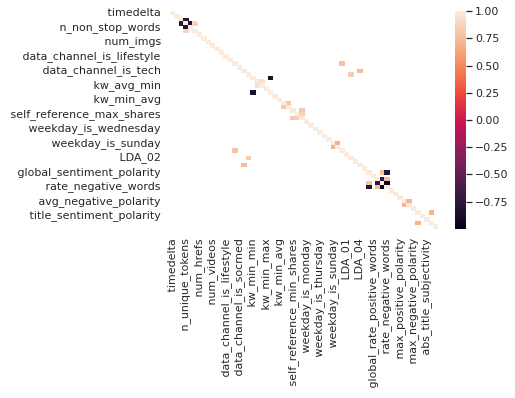

In [ ]:
sns.heatmap(cormat[abs(cormat) > 0.70])

In [ ]:
correlated_features = set()
for i in range(len(cormat.columns)):
    for j in range(i):
        if abs(cormat.iloc[i, j]) > 0.7:
            colname = cormat.columns[i]
            print(cormat.columns[i],cormat.columns[j])
            correlated_features.add(colname)

 n_unique_tokens  n_tokens_content
 n_non_stop_words  n_unique_tokens
 n_non_stop_unique_tokens  n_unique_tokens
 kw_avg_min  kw_max_min
 kw_max_max  kw_min_min
 kw_avg_avg  kw_max_avg
 self_reference_avg_sharess  self_reference_min_shares
 self_reference_avg_sharess  self_reference_max_shares
 is_weekend  weekday_is_sunday
 LDA_00  data_channel_is_bus
 LDA_02  data_channel_is_world
 LDA_04  data_channel_is_tech
 rate_positive_words  global_sentiment_polarity
 rate_positive_words  global_rate_negative_words
 rate_negative_words  global_sentiment_polarity
 rate_negative_words  global_rate_negative_words
 rate_negative_words  rate_positive_words
 min_negative_polarity  avg_negative_polarity
 abs_title_sentiment_polarity  title_subjectivity


In [ ]:
correlated_features

#Drop all highly correlated features 
# we will remove n_non_stop_words and keep average_token_length as we have good distribution 
#kw_avg_min High Correlation with kw_max_min which is also omitted
#kw_max_max High Correlation with kw_min_min which is also omitted
#self_reference_avg_sharess, self_reference_max_shares, self_reference_min_shares all correlated with each other drop all

{' LDA_00',
 ' LDA_02',
 ' LDA_04',
 ' abs_title_sentiment_polarity',
 ' is_weekend',
 ' kw_avg_avg',
 ' kw_avg_min',
 ' kw_max_max',
 ' min_negative_polarity',
 ' n_non_stop_unique_tokens',
 ' n_non_stop_words',
 ' n_unique_tokens',
 ' rate_negative_words',
 ' rate_positive_words',
 ' self_reference_avg_sharess'}

In [ ]:
df.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

In [ ]:
## chi- square test on business
cross_tab_bus = pd.crosstab(index=df[' data_channel_is_bus'],
                        columns=df[' shares'])
cross_tab_bus

shares               1       5       8       22      23      28      35      \
 data_channel_is_bus                                                           
0.0                        0       1       1       1       1       1       1   
1.0                        1       0       0       1       0       1       0   

 shares               36      41      42      ...  284700  298400  306100  \
 data_channel_is_bus                          ...                           
0.0                        1       1       2  ...       1       0       0   
1.0                        0       0       0  ...       0       1       1   

 shares               310800  441000  617900  652900  663600  690400  843300  
 data_channel_is_bus                                                          
0.0                        0       1       1       0       1       0       1  
1.0                        1       0       0       1       0       1       0  

[2 rows x 1435 columns]

In [ ]:
chiVal, pVal, dof, exp = chi2_contingency(cross_tab_bus)
chiVal, pVal, dof, exp

(1373.8123732335569,
 0.8702346893833521,
 1434,
 array([[0.83789195, 0.83789195, 0.83789195, ..., 0.83789195, 0.83789195,
         0.83789195],
        [0.16210805, 0.16210805, 0.16210805, ..., 0.16210805, 0.16210805,
         0.16210805]]))

In [ ]:
drop_features = ['url', ' timedelta', ' n_non_stop_words', ' n_non_stop_unique_tokens', ' num_hrefs', ' num_videos', ' kw_min_min', ' kw_max_min', ' kw_avg_min', ' kw_min_max', ' kw_max_max', ' kw_avg_avg', ' self_reference_max_shares', ' self_reference_min_shares', ' self_reference_avg_sharess',' LDA_02',' LDA_00',' LDA_04',' abs_title_sentiment_polarity',' is_weekend',' min_negative_polarity',' n_unique_tokens',' rate_negative_words',' rate_positive_words',' data_channel_is_bus' ]

In [ ]:
len(drop_features)

25

In [ ]:
len(df.columns)

61

In [ ]:
df.drop(labels=drop_features, axis=1, inplace=True) 

#dropping all irrelevant columns

In [ ]:
len(df.columns) #final column count

36

In [ ]:
df

n_tokens_title   n_tokens_content   num_self_hrefs   num_imgs  \
0                 12.0              219.0              2.0        1.0   
1                  9.0              255.0              1.0        1.0   
2                  9.0              211.0              1.0        1.0   
3                  9.0              531.0              0.0        1.0   
4                 13.0             1072.0             19.0       20.0   
...                ...                ...              ...        ...   
39639             11.0              346.0              7.0        1.0   
39640             12.0              328.0              7.0        3.0   
39641             10.0              442.0              1.0       12.0   
39642              6.0              682.0              1.0        1.0   
39643             10.0              157.0              1.0        0.0   

        average_token_length   num_keywords   data_channel_is_lifestyle  \
0                   4.680365            5.0                         0.0   
1                   4.913725            4.0                         0.0   
2                   4.393365            6.0                         0.0   
3                   4.404896            7.0                         0.0   
4                   4.682836            7.0                         0.0   
...                      ...            ...                         ...   
39639               4.523121            8.0                         0.0   
39640               4.405488            7.0                         0.0   
39641               5.076923            8.0                         0.0   
39642               4.975073            5.0                         0.0   
39643               4.471338            4.0                         0.0   

        data_channel_is_entertainment   data_channel_is_socmed  \
0                                 1.0                      0.0   
1                                 0.0                      0.0   
2                                 0.0                      0.0   
3                                 1.0                      0.0   
4                                 0.0                      0.0   
...                               ...                      ...   
39639                             0.0                      0.0   
39640                             0.0                      1.0   
39641                             0.0                      0.0   
39642                             0.0                      0.0   
39643                             1.0                      0.0   

        data_channel_is_tech  ...   global_rate_negative_words  \
0                        0.0  ...                     0.013699   
1                        0.0  ...                     0.015686   
2                        0.0  ...                     0.009479   
3                        0.0  ...                     0.020716   
4                        1.0  ...                     0.012127   
...                      ...  ...                          ...   
39639                    1.0  ...                     0.014451   
39640                    0.0  ...                     0.009146   
39641                    0.0  ...                     0.024887   
39642                    0.0  ...                     0.023460   
39643                    0.0  ...                     0.012739   

        avg_positive_polarity   min_positive_polarity   max_positive_polarity  \
0                    0.378636                0.100000                    0.70   
1                    0.286915                0.033333                    0.70   
2                    0.495833                0.100000                    1.00   
3                    0.385965                0.136364                    0.80   
4                    0.411127                0.033333                    1.00   
...                       ...                     ...                     ...   
39639                0.333791                0.100000                    0.75

# Converting target variable to diachotomous variable with High and Low Share 

In [ ]:
df[' shares'].median()

1400.0

In [ ]:
df[' shares'] = np.where(df[' shares'] > 2000, 1, 0)

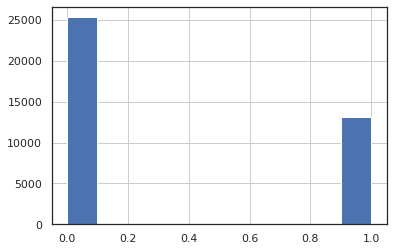

In [ ]:
df[' shares'].hist()

In [ ]:
df

n_tokens_title   n_tokens_content   num_self_hrefs   num_imgs  \
0                 12.0              219.0              2.0        1.0   
1                  9.0              255.0              1.0        1.0   
2                  9.0              211.0              1.0        1.0   
3                  9.0              531.0              0.0        1.0   
4                 13.0             1072.0             19.0       20.0   
...                ...                ...              ...        ...   
39639             11.0              346.0              7.0        1.0   
39640             12.0              328.0              7.0        3.0   
39641             10.0              442.0              1.0       12.0   
39642              6.0              682.0              1.0        1.0   
39643             10.0              157.0              1.0        0.0   

        average_token_length   num_keywords   data_channel_is_lifestyle  \
0                   4.680365            5.0                         0.0   
1                   4.913725            4.0                         0.0   
2                   4.393365            6.0                         0.0   
3                   4.404896            7.0                         0.0   
4                   4.682836            7.0                         0.0   
...                      ...            ...                         ...   
39639               4.523121            8.0                         0.0   
39640               4.405488            7.0                         0.0   
39641               5.076923            8.0                         0.0   
39642               4.975073            5.0                         0.0   
39643               4.471338            4.0                         0.0   

        data_channel_is_entertainment   data_channel_is_socmed  \
0                                 1.0                      0.0   
1                                 0.0                      0.0   
2                                 0.0                      0.0   
3                                 1.0                      0.0   
4                                 0.0                      0.0   
...                               ...                      ...   
39639                             0.0                      0.0   
39640                             0.0                      1.0   
39641                             0.0                      0.0   
39642                             0.0                      0.0   
39643                             1.0                      0.0   

        data_channel_is_tech  ...   global_rate_negative_words  \
0                        0.0  ...                     0.013699   
1                        0.0  ...                     0.015686   
2                        0.0  ...                     0.009479   
3                        0.0  ...                     0.020716   
4                        1.0  ...                     0.012127   
...                      ...  ...                          ...   
39639                    1.0  ...                     0.014451   
39640                    0.0  ...                     0.009146   
39641                    0.0  ...                     0.024887   
39642                    0.0  ...                     0.023460   
39643                    0.0  ...                     0.012739   

        avg_positive_polarity   min_positive_polarity   max_positive_polarity  \
0                    0.378636                0.100000                    0.70   
1                    0.286915                0.033333                    0.70   
2                    0.495833                0.100000                    1.00   
3                    0.385965                0.136364                    0.80   
4                    0.411127                0.033333                    1.00   
...                       ...                     ...                     ...   
39639                0.333791                0.100000                    0.75

In [ ]:
df.to_csv('cleaned_file_news_2000.csv')

In [ ]:
df.columns

Index([' n_tokens_title', ' n_tokens_content', ' num_self_hrefs', ' num_imgs',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_socmed',
       ' data_channel_is_tech', ' data_channel_is_world', ' kw_avg_max',
       ' kw_min_avg', ' kw_max_avg', ' weekday_is_monday',
       ' weekday_is_tuesday', ' weekday_is_wednesday', ' weekday_is_thursday',
       ' weekday_is_friday', ' weekday_is_saturday', ' weekday_is_sunday',
       ' LDA_01', ' LDA_03', ' global_subjectivity',
       ' global_sentiment_polarity', ' global_rate_positive_words',
       ' global_rate_negative_words', ' avg_positive_polarity',
       ' min_positive_polarity', ' max_positive_polarity',
       ' avg_negative_polarity', ' max_negative_polarity',
       ' title_subjectivity', ' title_sentiment_polarity',
       ' abs_title_subjectivity', ' shares'],
      dtype='object')

Dividing the columns as per feature use and description

In [ ]:
word_features = [' n_tokens_title', 
                 ' n_tokens_content',    
                 ' average_token_length',
                 ' shares']

media_features = [' num_imgs', ' shares']

temporal_features = [' weekday_is_monday', 
                     ' weekday_is_tuesday', 
                     ' weekday_is_wednesday',
                     ' weekday_is_thursday',
                     ' weekday_is_friday',
                     ' weekday_is_saturday',
                     ' weekday_is_sunday',
                      ' shares']

channel_features = [' data_channel_is_lifestyle', ' data_channel_is_entertainment', 
                     ' data_channel_is_socmed', 
                    ' data_channel_is_tech', ' data_channel_is_world', ' shares']

keyword_features = [' kw_avg_max',' kw_min_avg', ' kw_max_avg', 
                    ' num_keywords', ' shares']


reference_features = [
                      ' num_self_hrefs', ' shares'
                      ]

topic_features = [' LDA_01', ' LDA_03',' shares']

subjectivity_features = [' global_subjectivity', ' title_subjectivity', ' abs_title_subjectivity', ' shares']

sentiment_features = [' global_sentiment_polarity', ' global_rate_positive_words',
                      ' global_rate_negative_words', ' avg_positive_polarity',
                      ' min_positive_polarity', ' max_positive_polarity',
                      ' avg_negative_polarity',
                      ' max_negative_polarity', ' title_sentiment_polarity',
                       ' shares']


target = [' shares']

# Pairplots to see correlation

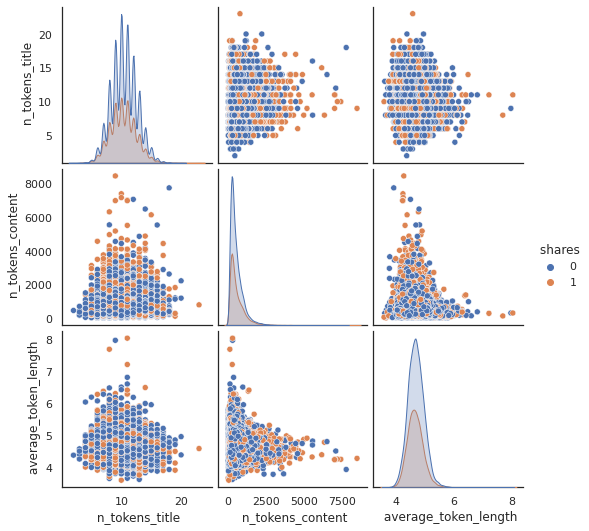

In [ ]:
# Create the pairplot of word_features
sns.pairplot(df[word_features], hue= ' shares')

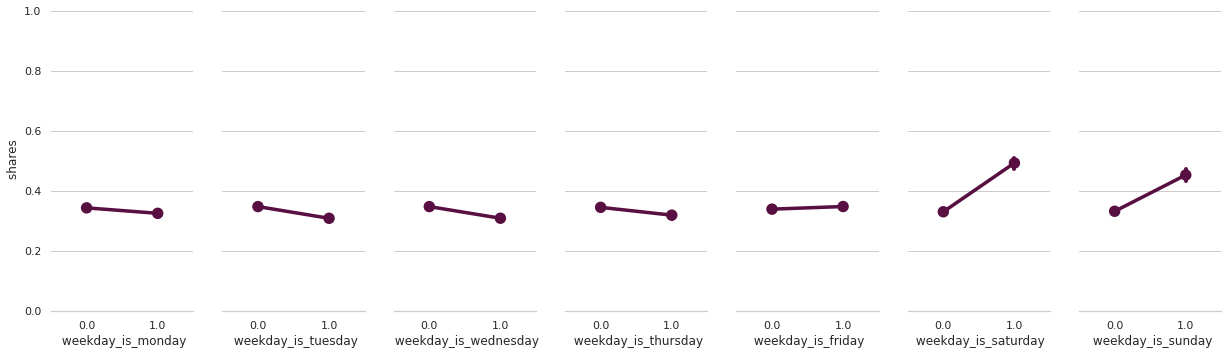

In [ ]:
# create pairplot for temporal features
import seaborn as sns
sns.set_theme(style="whitegrid")



# Set up a grid to plot survival probability against several variables
g = sns.PairGrid(df, y_vars=" shares",
                 x_vars=[" weekday_is_monday", " weekday_is_tuesday", " weekday_is_wednesday", " weekday_is_thursday", " weekday_is_friday", " weekday_is_saturday", " weekday_is_sunday"],
                 height=5, aspect=.5)

# Draw a seaborn pointplot onto each Axes
g.map(sns.pointplot, scale=1.3, errwidth=4, color="xkcd:plum")
g.set(ylim=(0, 1))
sns.despine(fig=g.fig, left=True)

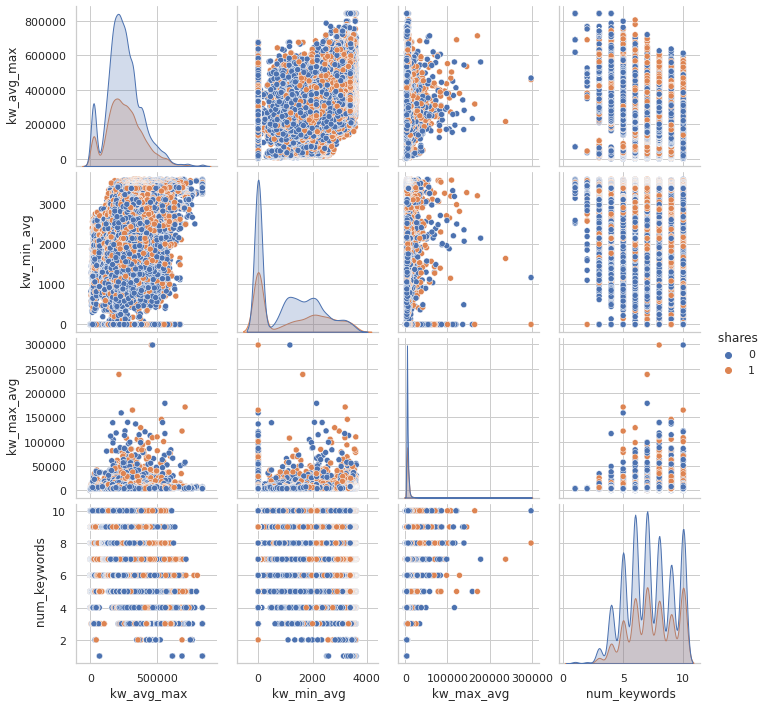

In [ ]:
# create pair plot for keyword_features
sns.pairplot(df[keyword_features], hue= ' shares')

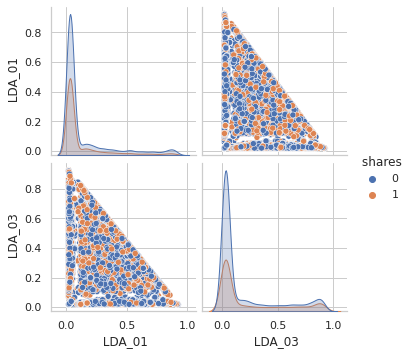

In [ ]:
# create pairplot for topic_features
sns.pairplot(df[topic_features], hue= ' shares')

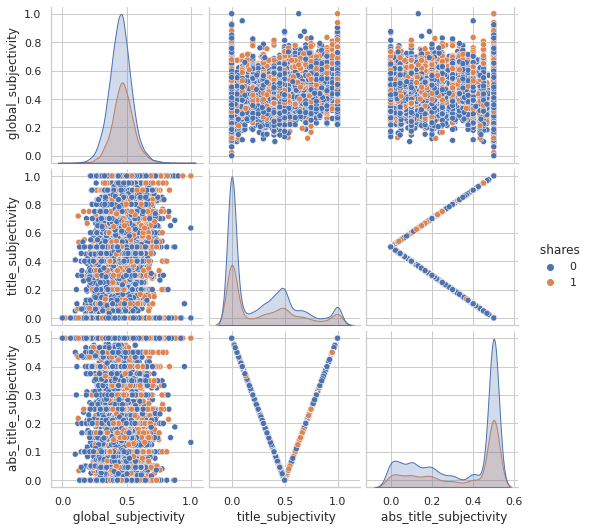

In [ ]:
# create pairplot for subjectivity_features
sns.pairplot(df[subjectivity_features], hue= ' shares')

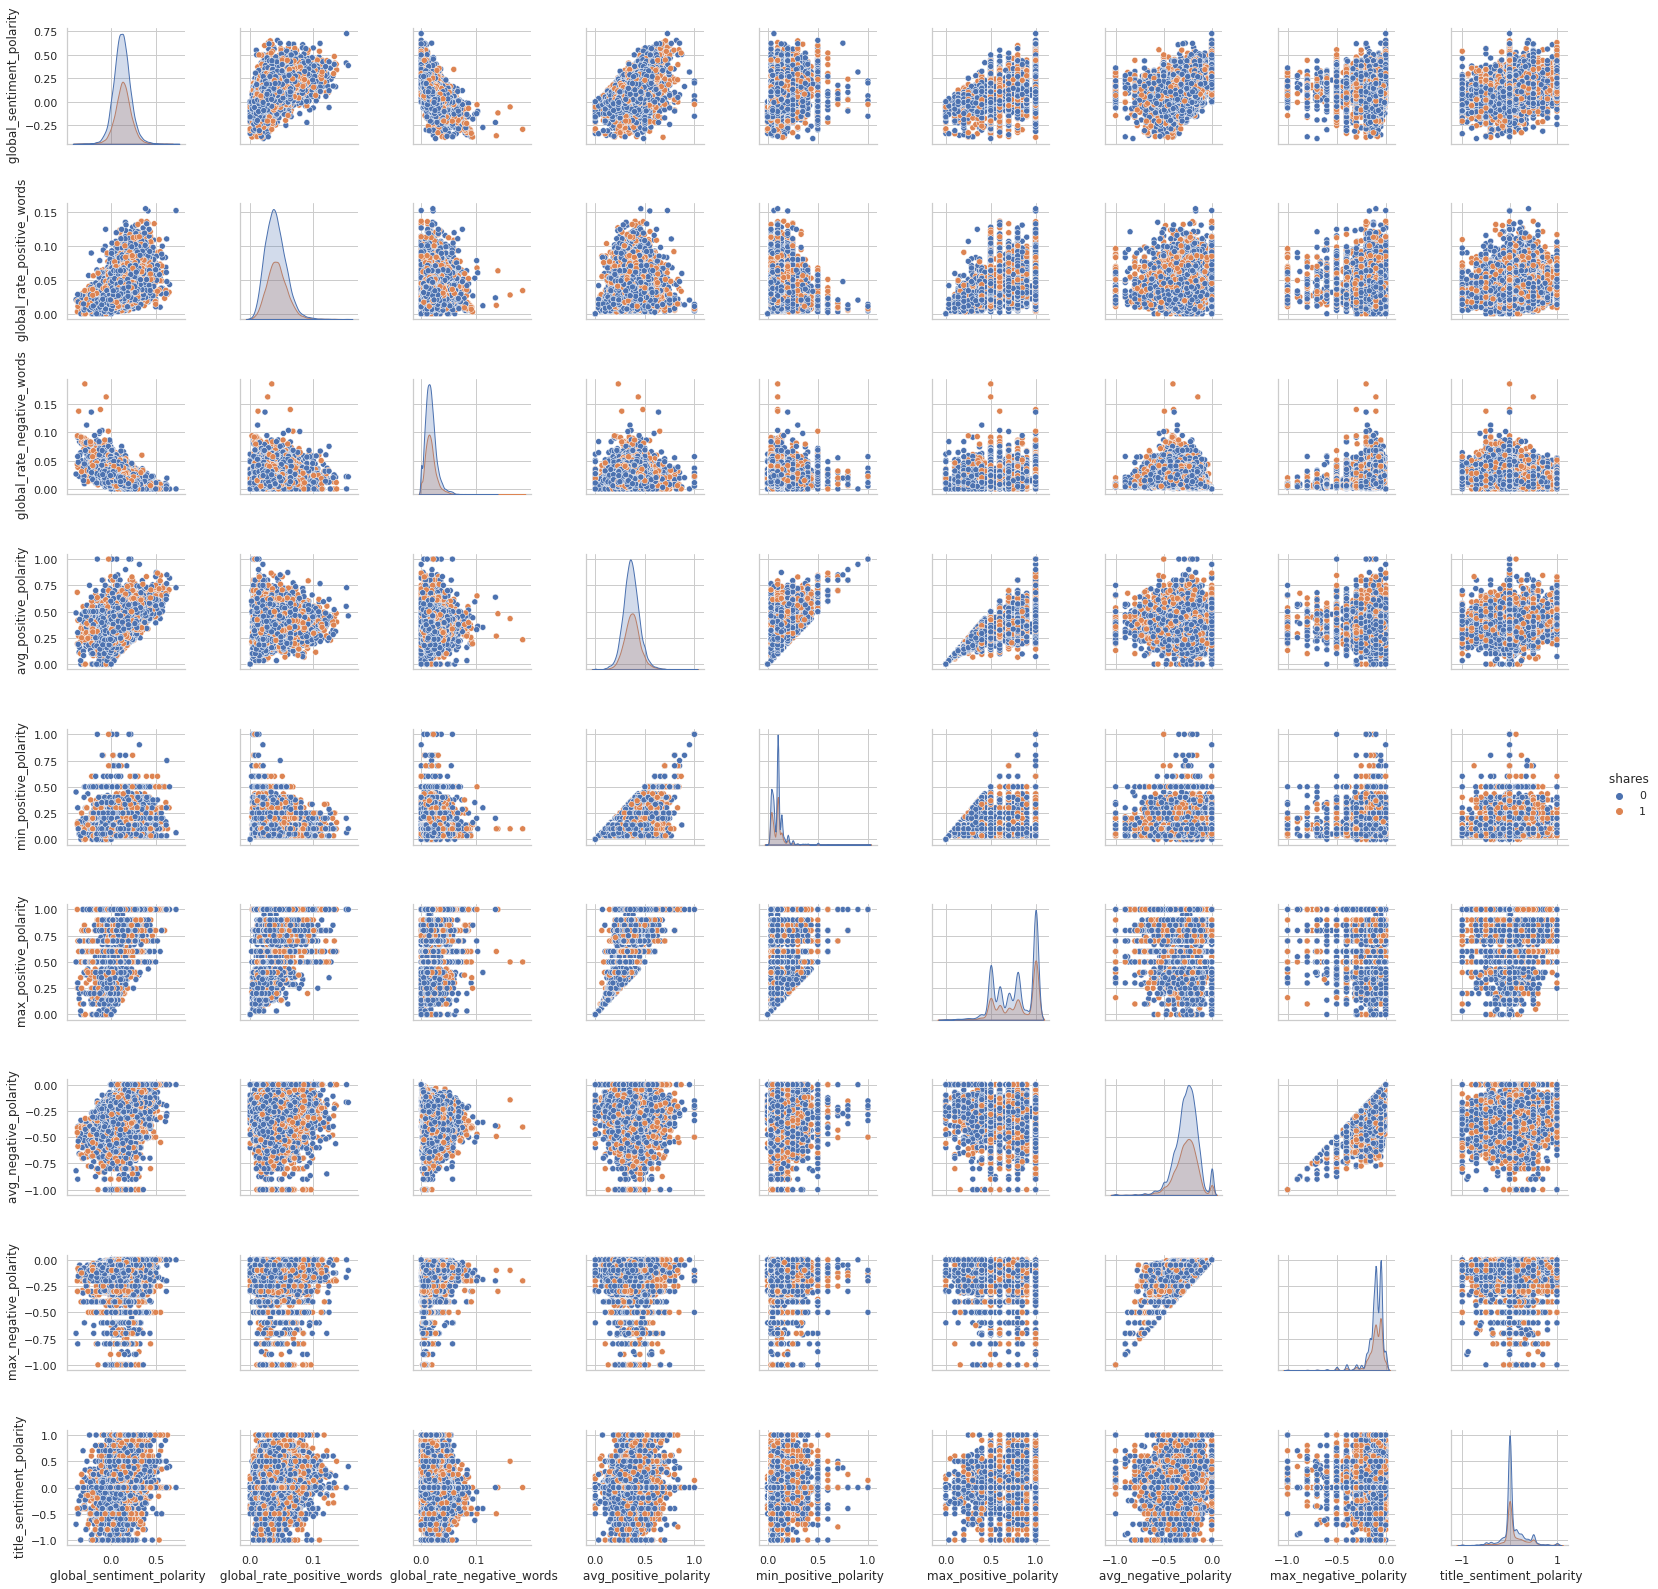

In [ ]:
# create pairplot for sentiment_features
sns.pairplot(df[sentiment_features], hue= ' shares')

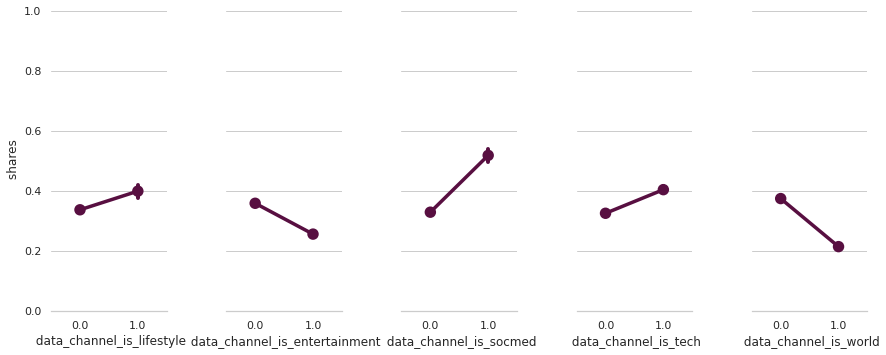

In [ ]:
# create pairplot for channel features
import seaborn as sns
sns.set_theme(style="whitegrid")



# Set up a grid to plot survival probability against several variables
g = sns.PairGrid(df, y_vars=" shares",
                 x_vars=[" data_channel_is_lifestyle", " data_channel_is_entertainment",  
                         " data_channel_is_socmed", " data_channel_is_tech", " data_channel_is_world"],
                 height=5, aspect=.5)

# Draw a seaborn pointplot onto each Axes
g.map(sns.pointplot, scale=1.3, errwidth=4, color="xkcd:plum")
g.set(ylim=(0,1))
sns.despine(fig=g.fig, left=True)


# Chi Square Test

## For temporal features

### For Monday vs Others

In [ ]:
df_is_monday = df[[' weekday_is_monday', ' shares']].copy()
df_is_monday

weekday_is_monday   shares
0                     1.0        0
1                     1.0        0
2                     1.0        0
3                     1.0        0
4                     1.0        0
...                   ...      ...
39639                 0.0        0
39640                 0.0        0
39641                 0.0        0
39642                 0.0        0
39643                 0.0        0

[38462 rows x 2 columns]

In [ ]:
cross_tab_mon = pd.crosstab(index=df[' weekday_is_monday'],
                        columns=df[' shares'],
                        normalize="index")
cross_tab_mon

shares                    0         1
 weekday_is_monday                    
0.0                 0.655528  0.344472
1.0                 0.673775  0.326225

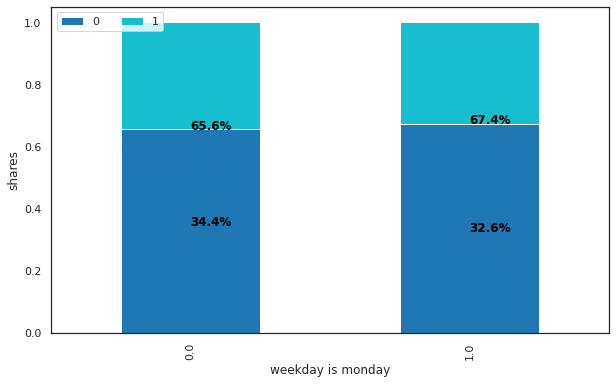

In [ ]:
cross_tab_mon.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("weekday is monday")
plt.ylabel("shares")


for n, x in enumerate([*cross_tab_mon.index.values]):
    for proportion in cross_tab_mon.loc[x]:
                
        plt.text(x=n,
                 y=proportion,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show()

### For tuesday vs others 

In [ ]:
df_is_tuesday = df[[' weekday_is_tuesday', ' shares']].copy()
df_is_tuesday

weekday_is_tuesday   shares
0                      0.0        0
1                      0.0        0
2                      0.0        0
3                      0.0        0
4                      0.0        0
...                    ...      ...
39639                  0.0        0
39640                  0.0        0
39641                  0.0        0
39642                  0.0        0
39643                  0.0        0

[38462 rows x 2 columns]

In [ ]:
cross_tab_tue = pd.crosstab(index=df[' weekday_is_tuesday'],
                        columns=df[' shares'],
                        normalize="index")
cross_tab_tue 
                            
                   


shares                     0         1
 weekday_is_tuesday                    
0.0                  0.651349  0.348651
1.0                  0.690237  0.309763

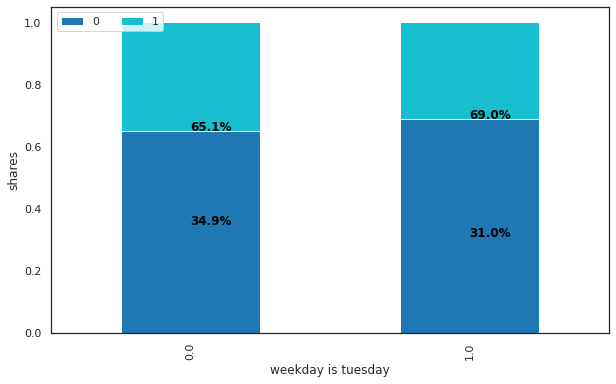

In [ ]:
cross_tab_tue.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("weekday is tuesday")
plt.ylabel("shares")


for n, x in enumerate([*cross_tab_tue.index.values]):
    for proportion in cross_tab_tue.loc[x]:
                
        plt.text(x=n,
                 y=proportion,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show()

### for wednesday vs others

In [ ]:
df_is_wednesday = df[[' weekday_is_wednesday', ' shares']].copy()
df_is_wednesday

weekday_is_wednesday   shares
0                        0.0        0
1                        0.0        0
2                        0.0        0
3                        0.0        0
4                        0.0        0
...                      ...      ...
39639                    1.0        0
39640                    1.0        0
39641                    1.0        0
39642                    1.0        0
39643                    1.0        0

[38462 rows x 2 columns]

In [ ]:
cross_tab_wed = pd.crosstab(index=df[' weekday_is_wednesday'],
                        columns=df[' shares'],
                        normalize="index")
cross_tab_wed

shares                       0         1
 weekday_is_wednesday                    
0.0                    0.651342  0.348658
1.0                    0.690076  0.309924

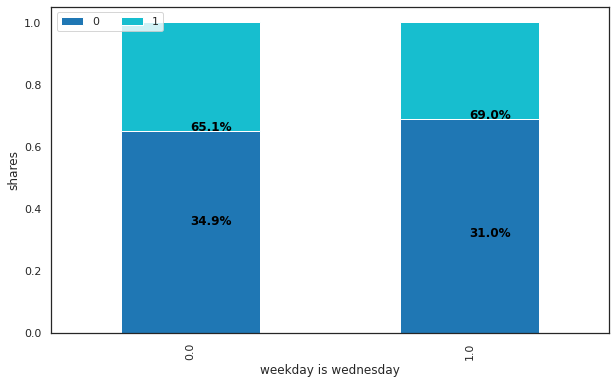

In [ ]:
cross_tab_wed.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("weekday is wednesday")
plt.ylabel("shares")


for n, x in enumerate([*cross_tab_wed.index.values]):
    for proportion in cross_tab_wed.loc[x]:
                
        plt.text(x=n,
                 y=proportion,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show()

### For thursday vs others

In [ ]:
df_is_thursday = df[[' weekday_is_thursday', ' shares']].copy()
df_is_thursday

weekday_is_thursday   shares
0                       0.0        0
1                       0.0        0
2                       0.0        0
3                       0.0        0
4                       0.0        0
...                     ...      ...
39639                   0.0        0
39640                   0.0        0
39641                   0.0        0
39642                   0.0        0
39643                   0.0        0

[38462 rows x 2 columns]

In [ ]:
cross_tab_thur = pd.crosstab(index=df[' weekday_is_thursday'],
                        columns=df[' shares'],
                        normalize="index")
cross_tab_thur

shares                      0         1
 weekday_is_thursday                    
0.0                   0.653836  0.346164
1.0                   0.679807  0.320193

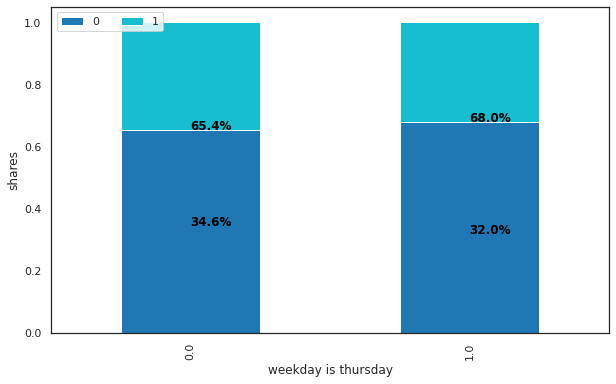

In [ ]:
cross_tab_thur.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("weekday is thursday")
plt.ylabel("shares")


for n, x in enumerate([*cross_tab_thur.index.values]):
    for proportion in cross_tab_thur.loc[x]:
                
        plt.text(x=n,
                 y=proportion,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show()

### For friday vs others

In [ ]:
df_is_friday = df[[' weekday_is_friday', ' shares']]
df_is_friday 

weekday_is_friday   shares
0                     0.0        0
1                     0.0        0
2                     0.0        0
3                     0.0        0
4                     0.0        0
...                   ...      ...
39639                 0.0        0
39640                 0.0        0
39641                 0.0        0
39642                 0.0        0
39643                 0.0        0

[38462 rows x 2 columns]

In [ ]:
cross_tab_fri = pd.crosstab(index=df[' weekday_is_friday'],
                        columns=df[' shares'],
                        normalize="index")
cross_tab_fri

shares                    0         1
 weekday_is_friday                    
0.0                 0.659853  0.340147
1.0                 0.651138  0.348862

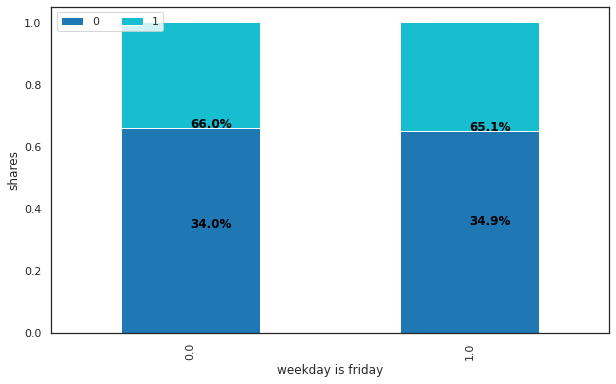

In [ ]:
cross_tab_fri.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("weekday is friday")
plt.ylabel("shares")


for n, x in enumerate([*cross_tab_fri.index.values]):
    for proportion in cross_tab_fri.loc[x]:
                
        plt.text(x=n,
                 y=proportion,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show()

### For saturday vs others

In [ ]:
df_is_saturday = df[[' weekday_is_saturday', ' shares']]
df_is_saturday

weekday_is_saturday   shares
0                       0.0        0
1                       0.0        0
2                       0.0        0
3                       0.0        0
4                       0.0        0
...                     ...      ...
39639                   0.0        0
39640                   0.0        0
39641                   0.0        0
39642                   0.0        0
39643                   0.0        0

[38462 rows x 2 columns]

In [ ]:
cross_tab_sat = pd.crosstab(index=df[' weekday_is_saturday'],
                        columns=df[' shares'],
                        normalize="index")
cross_tab_sat

shares                      0         1
 weekday_is_saturday                    
0.0                   0.668606  0.331394
1.0                   0.506121  0.493879

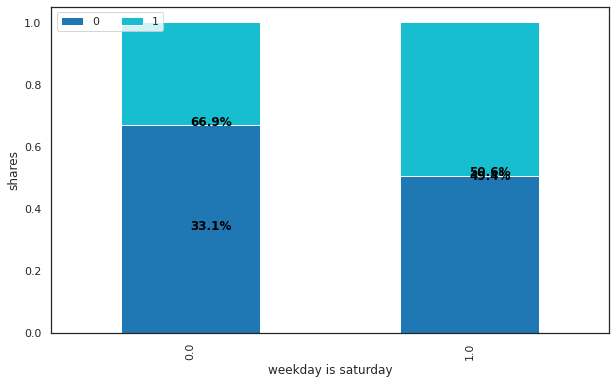

In [ ]:
cross_tab_sat.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("weekday is saturday")
plt.ylabel("shares")


for n, x in enumerate([*cross_tab_sat.index.values]):
    for proportion in cross_tab_sat.loc[x]:
                
        plt.text(x=n,
                 y=proportion,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show()

### For sunday vs all

In [ ]:
df_is_sunday = df[[' weekday_is_sunday', ' shares']]
df_is_sunday

weekday_is_sunday   shares
0                     0.0        0
1                     0.0        0
2                     0.0        0
3                     0.0        0
4                     0.0        0
...                   ...      ...
39639                 0.0        0
39640                 0.0        0
39641                 0.0        0
39642                 0.0        0
39643                 0.0        0

[38462 rows x 2 columns]

In [ ]:
cross_tab_sun = pd.crosstab(index=df[' weekday_is_sunday'],
                        columns=df[' shares'],
                        normalize="index")
cross_tab_sun

shares                    0         1
 weekday_is_sunday                    
0.0                 0.666946  0.333054
1.0                 0.546105  0.453895

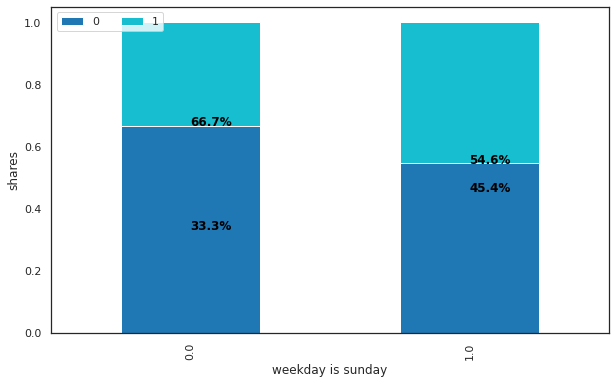

In [ ]:
cross_tab_sun.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("weekday is sunday")
plt.ylabel("shares")


for n, x in enumerate([*cross_tab_sun.index.values]):
    for proportion in cross_tab_sun.loc[x]:
                
        plt.text(x=n,
                 y=proportion,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show()

## Chi Square test for temporal features

### For monday

In [ ]:
cross_tab_mon_chi = pd.crosstab(index=df[' weekday_is_monday'],
                        columns=df[' shares'])
cross_tab_mon_chi

shares                 0      1
 weekday_is_monday              
0.0                 20971  11020
1.0                  4360   2111

In [ ]:
chiVal, pVal, dof, exp = chi2_contingency(cross_tab_mon_chi)
chiVal, pVal, dof, exp

(7.8893189599087385,
 0.00497275858909324,
 1,
 array([[21069.21171546, 10921.78828454],
        [ 4261.78828454,  2209.21171546]]))

### For tuesday

In [ ]:
cross_tab_tue_chi = pd.crosstab(index=df[' weekday_is_tuesday'],
                        columns=df[' shares'])
cross_tab_tue_chi

shares                  0      1
 weekday_is_tuesday              
0.0                  20382  10910
1.0                   4949   2221

In [ ]:
chiVal, pVal, dof, exp = chi2_contingency(cross_tab_tue_chi)
chiVal, pVal, dof, exp

(39.06252298361143,
 4.104478529911092e-10,
 1,
 array([[20608.85164578, 10683.14835422],
        [ 4722.14835422,  2447.85164578]]))

### For wednesday

In [ ]:
cross_tab_wed_chi = pd.crosstab(index=df[' weekday_is_wednesday'],
                        columns=df[' shares'])
cross_tab_wed_chi

shares                    0      1
 weekday_is_wednesday              
0.0                    20359  10898
1.0                     4972   2233

In [ ]:
chiVal, pVal, dof, exp = chi2_contingency(cross_tab_wed_chi)
chiVal, pVal, dof, exp

(38.898783412985885,
 4.4635869664323355e-10,
 1,
 array([[20585.80071239, 10671.19928761],
        [ 4745.19928761,  2459.80071239]]))

### For thursday

In [ ]:
cross_tab_thur_chi = pd.crosstab(index=df[' weekday_is_thursday'],
                        columns=df[' shares'])
cross_tab_thur_chi

shares                   0      1
 weekday_is_thursday              
0.0                   20537  10873
1.0                    4794   2258

In [ ]:
chiVal, pVal, dof, exp = chi2_contingency(cross_tab_thur_chi)
chiVal, pVal, dof, exp

(17.16025349303056,
 3.435499100410252e-05,
 1,
 array([[20686.56622121, 10723.43377879],
        [ 4644.43377879,  2407.56622121]]))

### For friday

In [ ]:
cross_tab_fri_chi = pd.crosstab(index=df[' weekday_is_friday'],
                        columns=df[' shares'])
cross_tab_fri_chi

shares                 0      1
 weekday_is_friday              
0.0                 21725  11199
1.0                  3606   1932

In [ ]:
chiVal, pVal, dof, exp = chi2_contingency(cross_tab_fri_chi)
chiVal, pVal, dof, exp

(1.562954480311328,
 0.21123315137547308,
 1,
 array([[21683.6837398, 11240.3162602],
        [ 3647.3162602,  1890.6837398]]))

### For Saturday

In [ ]:
cross_tab_sat_chi = pd.crosstab(index=df[' weekday_is_saturday'],
                        columns=df[' shares'])
cross_tab_sat_chi

shares                   0      1
 weekday_is_saturday              
0.0                   24132  11961
1.0                    1199   1170

In [ ]:
chiVal, pVal, dof, exp = chi2_contingency(cross_tab_sat_chi)
chiVal, pVal, dof, exp

(260.31259837446504,
 1.4668216635056474e-58,
 1,
 array([[23770.78110863, 12322.21889137],
        [ 1560.21889137,   808.78110863]]))

### For Sunday

In [ ]:
cross_tab_sun_chi = pd.crosstab(index=df[' weekday_is_sunday'],
                        columns=df[' shares'])
cross_tab_sun_chi

shares                 0      1
 weekday_is_sunday              
0.0                 23880  11925
1.0                  1451   1206

In [ ]:
chiVal, pVal, dof, exp = chi2_contingency(cross_tab_sun_chi)
chiVal, pVal, dof, exp

(160.10088118653383,
 1.0754916791697013e-36,
 1,
 array([[23581.10485674, 12223.89514326],
        [ 1749.89514326,   907.10485674]]))

## For channel features

### lifestyle 

In [ ]:
df_is_lifestyle = df[[' data_channel_is_lifestyle', ' shares']].copy()
df_is_lifestyle

data_channel_is_lifestyle   shares
0                             0.0        0
1                             0.0        0
2                             0.0        0
3                             0.0        0
4                             0.0        0
...                           ...      ...
39639                         0.0        0
39640                         0.0        0
39641                         0.0        0
39642                         0.0        0
39643                         0.0        0

[38462 rows x 2 columns]

In [ ]:
cross_tab_lifestyle = pd.crosstab(index=df[' data_channel_is_lifestyle'],
                        columns=df[' shares'],
                        normalize="index")
cross_tab_lifestyle

shares                            0         1
 data_channel_is_lifestyle                    
0.0                         0.661949  0.338051
1.0                         0.599904  0.400096

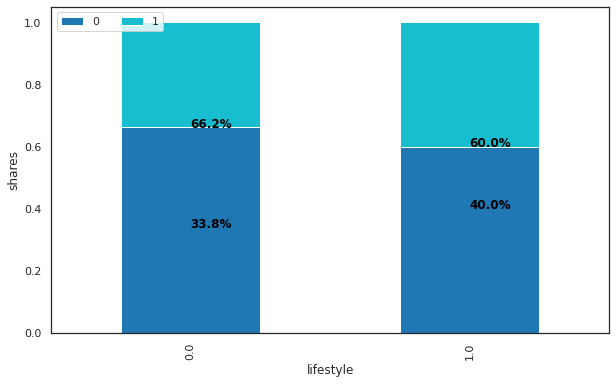

In [ ]:
cross_tab_lifestyle.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("lifestyle")
plt.ylabel("shares")


for n, x in enumerate([*cross_tab_lifestyle.index.values]):
    for proportion in cross_tab_lifestyle.loc[x]:
                
        plt.text(x=n,
                 y=proportion,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show()

### Entertainment

In [ ]:
df_is_entertainment = df[[' data_channel_is_entertainment', ' shares']].copy()
df_is_entertainment

data_channel_is_entertainment   shares
0                                 1.0        0
1                                 0.0        0
2                                 0.0        0
3                                 1.0        0
4                                 0.0        0
...                               ...      ...
39639                             0.0        0
39640                             0.0        0
39641                             0.0        0
39642                             0.0        0
39643                             1.0        0

[38462 rows x 2 columns]

In [ ]:
cross_tab_entertainment = pd.crosstab(index=df[' data_channel_is_entertainment'],
                        columns=df[' shares'],
                        normalize="index")
cross_tab_entertainment

shares                                0         1
 data_channel_is_entertainment                    
0.0                             0.640301  0.359699
1.0                             0.742961  0.257039

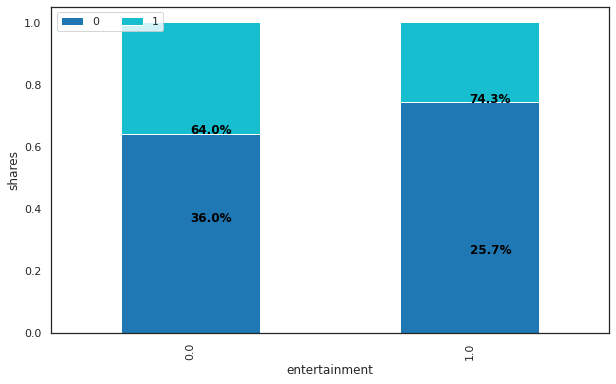

In [ ]:
cross_tab_entertainment.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("entertainment")
plt.ylabel("shares")


for n, x in enumerate([*cross_tab_entertainment.index.values]):
    for proportion in cross_tab_entertainment.loc[x]:
                
        plt.text(x=n,
                 y=proportion,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show()

### Socmed

In [ ]:
df_is_socmed = df[[' data_channel_is_socmed', ' shares']].copy()
df_is_socmed

data_channel_is_socmed   shares
0                          0.0        0
1                          0.0        0
2                          0.0        0
3                          0.0        0
4                          0.0        0
...                        ...      ...
39639                      0.0        0
39640                      1.0        0
39641                      0.0        0
39642                      0.0        0
39643                      0.0        0

[38462 rows x 2 columns]

In [ ]:
cross_tab_socmed = pd.crosstab(index=df[' data_channel_is_socmed'],
                        columns=df[' shares'],
                        normalize="index")
cross_tab_socmed

shares                         0         1
 data_channel_is_socmed                    
0.0                      0.669968  0.330032
1.0                      0.480744  0.519256

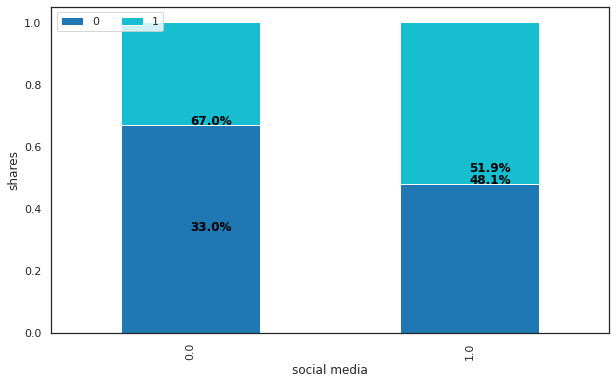

In [ ]:
cross_tab_socmed.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("social media")
plt.ylabel("shares")


for n, x in enumerate([*cross_tab_socmed.index.values]):
    for proportion in cross_tab_socmed.loc[x]:
                
        plt.text(x=n,
                 y=proportion,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show()

### Technology

In [ ]:
df_is_tech = df[[' data_channel_is_tech', ' shares']].copy()
df_is_tech

data_channel_is_tech   shares
0                        0.0        0
1                        0.0        0
2                        0.0        0
3                        0.0        0
4                        1.0        0
...                      ...      ...
39639                    1.0        0
39640                    0.0        0
39641                    0.0        0
39642                    0.0        0
39643                    0.0        0

[38462 rows x 2 columns]

In [ ]:
cross_tab_tech = pd.crosstab(index=df[' data_channel_is_tech'],
                        columns=df[' shares'],
                        normalize="index")
cross_tab_tech

shares                       0         1
 data_channel_is_tech                    
0.0                    0.673572  0.326428
1.0                    0.594949  0.405051

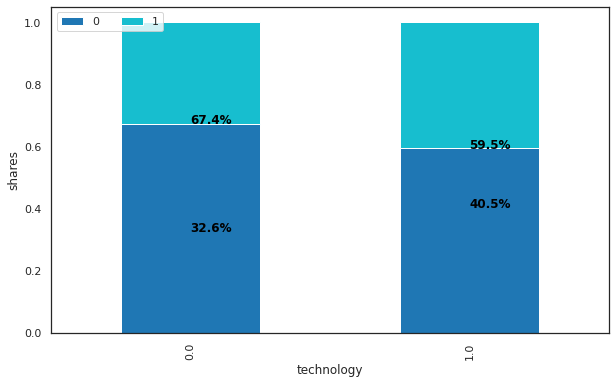

In [ ]:

cross_tab_tech.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("technology")
plt.ylabel("shares")


for n, x in enumerate([*cross_tab_tech.index.values]):
    for proportion in cross_tab_tech.loc[x]:
                
        plt.text(x=n,
                 y=proportion,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show()

### World

In [ ]:
df_is_world = df[[' data_channel_is_world', ' shares']].copy()
df_is_world

data_channel_is_world   shares
0                         0.0        0
1                         0.0        0
2                         0.0        0
3                         0.0        0
4                         0.0        0
...                       ...      ...
39639                     0.0        0
39640                     0.0        0
39641                     0.0        0
39642                     1.0        0
39643                     0.0        0

[38462 rows x 2 columns]

In [ ]:

cross_tab_world = pd.crosstab(index=df[' data_channel_is_world'],
                        columns=df[' shares'],
                        normalize="index")
cross_tab_world


shares                        0         1
 data_channel_is_world                    
0.0                     0.624612  0.375388
1.0                     0.784647  0.215353

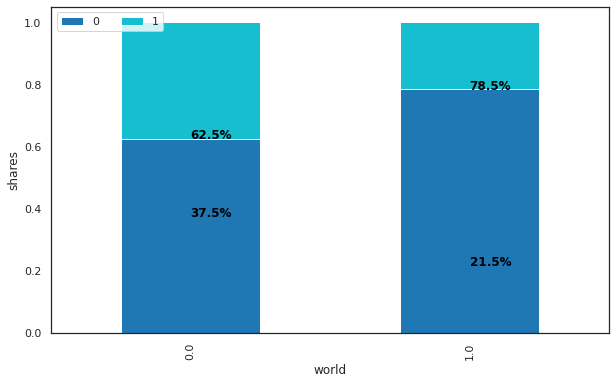

In [ ]:
cross_tab_world.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("world")
plt.ylabel("shares")


for n, x in enumerate([*cross_tab_world.index.values]):
    for proportion in cross_tab_world.loc[x]:
                
        plt.text(x=n,
                 y=proportion,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show()

## Chi Square for Channel Features

### Lifestyle

In [ ]:
cross_tab_lifestyle = pd.crosstab(index=df[' data_channel_is_lifestyle'],
                        columns=df[' shares'])
cross_tab_lifestyle

shares                         0      1
 data_channel_is_lifestyle              
0.0                         24085  12300
1.0                          1246    831

In [ ]:
chiVal, pVal, dof, exp = chi2_contingency(cross_tab_lifestyle)
chiVal, pVal, dof, exp

(33.36437210514235,
 7.641103838104735e-09,
 1,
 array([[23963.0917529, 12421.9082471],
        [ 1367.9082471,   709.0917529]]))

### Entertainment

In [ ]:
cross_tab_entertainment = pd.crosstab(index=df[' data_channel_is_entertainment'],
                        columns=df[' shares'])
cross_tab_entertainment

shares                             0      1
 data_channel_is_entertainment              
0.0                             20238  11369
1.0                              5093   1762

In [ ]:
chiVal, pVal, dof, exp = chi2_contingency(cross_tab_entertainment)
chiVal, pVal, dof, exp

(263.5875515229583,
 2.8348870779050164e-59,
 1,
 array([[20816.31004628, 10790.68995372],
        [ 4514.68995372,  2340.31004628]]))

### SocMedia

In [ ]:
cross_tab_socmed = pd.crosstab(index=df[' data_channel_is_socmed'],
                        columns=df[' shares'])
cross_tab_socmed

shares                      0      1
 data_channel_is_socmed              
0.0                      24220  11931
1.0                       1111   1200

In [ ]:
chiVal, pVal, dof, exp = chi2_contingency(cross_tab_socmed)
chiVal, pVal, dof, exp 

(345.0597164297639,
 5.0463565110546e-77,
 1,
 array([[23808.97979824, 12342.02020176],
        [ 1522.02020176,   788.97979824]]))

### Technology

In [ ]:
cross_tab_tech = pd.crosstab(index=df[' data_channel_is_tech'],
                        columns=df[' shares'])
cross_tab_tech

shares                    0      1
 data_channel_is_tech              
0.0                    20973  10164
1.0                     4358   2967

In [ ]:
chiVal, pVal, dof, exp = chi2_contingency(cross_tab_tech)
chiVal, pVal, dof, exp

(162.678987955505,
 2.9400257091901503e-37,
 1,
 array([[20506.76894077, 10630.23105923],
        [ 4824.23105923,  2500.76894077]]))

### World

In [ ]:
cross_tab_world = pd.crosstab(index=df[' data_channel_is_world'],
                        columns=df[' shares'])
cross_tab_world

shares                     0      1
 data_channel_is_world              
0.0                     18922  11372
1.0                      6409   1759

In [ ]:
chiVal, pVal, dof, exp = chi2_contingency(cross_tab_world)
chiVal, pVal, dof, exp

(732.0884722529091,
 3.1482932672386513e-161,
 1,
 array([[19951.57074515, 10342.42925485],
        [ 5379.42925485,  2788.57074515]]))

# Performing Statistical Test 

Performing a Logistic regression on our feature sets to analysis the p values 

In [ ]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# building the model and fitting the data
log_reg = sm.Logit(df[word_features].iloc[:,-1],df[word_features].iloc[:,:-1]).fit()

Optimization terminated successfully.
         Current function value: 0.639823
         Iterations 4


In [ ]:
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:                 shares   No. Observations:                38462
Model:                          Logit   Df Residuals:                    38459
Method:                           MLE   Df Model:                            2
Date:                Mon, 08 Aug 2022   Pseudo R-squ.:                0.003330
Time:                        23:53:01   Log-Likelihood:                -24609.
converged:                       True   LL-Null:                       -24691.
Covariance Type:            nonrobust   LLR p-value:                 1.938e-36
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
 n_tokens_title          -0.0323      0.005     -6.739      0.000      -0.042      -0.023
 n_tokens_content         0.0002   2.24e-05      9.257      0.000       0.000       0.000
 average

## From Word Features we have all as our significant variable

In [ ]:
log_reg = sm.Logit(df[media_features].iloc[:,-1],df[media_features].iloc[:,:-1]).fit()

Optimization terminated successfully.
         Current function value: 0.689045
         Iterations 4


In [ ]:
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:                 shares   No. Observations:                38462
Model:                          Logit   Df Residuals:                    38461
Method:                           MLE   Df Model:                            0
Date:                Mon, 08 Aug 2022   Pseudo R-squ.:                -0.07334
Time:                        23:53:02   Log-Likelihood:                -26502.
converged:                       True   LL-Null:                       -24691.
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
 num_imgs     -0.0200      0.001    -17.105      0.000      -0.022      -0.018


## From media Features we have num_imgs as our significant variable




In [ ]:
log_reg = sm.Logit(df[temporal_features].iloc[:,-1],df[temporal_features].iloc[:,:-1]).fit()

Optimization terminated successfully.
         Current function value: 0.635943
         Iterations 5


In [ ]:
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:                 shares   No. Observations:                38462
Model:                          Logit   Df Residuals:                    38455
Method:                           MLE   Df Model:                            6
Date:                Mon, 08 Aug 2022   Pseudo R-squ.:                0.009374
Time:                        23:53:03   Log-Likelihood:                -24460.
converged:                       True   LL-Null:                       -24691.
Covariance Type:            nonrobust   LLR p-value:                 8.190e-97
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
 weekday_is_monday       -0.7253      0.027    -27.354      0.000      -0.777      -0.673
 weekday_is_tuesday      -0.8012      0.026    -31.371      0.000      -0.851      -0.751
 weekday

## From Temporal Features we have all as our significant variable except Weekdat_is_saturday

In [ ]:
log_reg = sm.Logit(df[channel_features].iloc[:,-1],df[channel_features].iloc[:,:-1]).fit()

Optimization terminated successfully.
         Current function value: 0.630037
         Iterations 5


In [ ]:
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:                 shares   No. Observations:                38462
Model:                          Logit   Df Residuals:                    38457
Method:                           MLE   Df Model:                            4
Date:                Mon, 08 Aug 2022   Pseudo R-squ.:                 0.01857
Time:                        23:53:04   Log-Likelihood:                -24232.
converged:                       True   LL-Null:                       -24691.
Covariance Type:            nonrobust   LLR p-value:                3.058e-197
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
 data_channel_is_lifestyle        -0.4051      0.045     -9.044      0.000      -0.493      -0.317
 data_channel_is_entertainment    -1.0614      0.028    -38.404      0.

## From channel Features we have all features as our significant variable

In [ ]:
log_reg = sm.Logit(df[keyword_features].iloc[:,-1],df[keyword_features].iloc[:,:-1]).fit()

Optimization terminated successfully.
         Current function value: 0.643529
         Iterations 5


In [ ]:
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:                 shares   No. Observations:                38462
Model:                          Logit   Df Residuals:                    38458
Method:                           MLE   Df Model:                            3
Date:                Mon, 08 Aug 2022   Pseudo R-squ.:               -0.002443
Time:                        23:53:05   Log-Likelihood:                -24751.
converged:                       True   LL-Null:                       -24691.
Covariance Type:            nonrobust   LLR p-value:                     1.000
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
 kw_avg_max   -1.481e-06   7.91e-08    -18.722      0.000   -1.64e-06   -1.33e-06
 kw_min_avg       0.0001   1.03e-05     12.710      0.000       0.000       0.000
 kw_max_avg    2.798e-05   2.34e-06     

## From Keyword Features all are significant 

In [ ]:
log_reg = sm.Logit(df[reference_features].iloc[:,-1],df[reference_features].iloc[:,:-1]).fit()

Optimization terminated successfully.
         Current function value: 0.674055
         Iterations 5


In [ ]:
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:                 shares   No. Observations:                38462
Model:                          Logit   Df Residuals:                    38461
Method:                           MLE   Df Model:                            0
Date:                Mon, 08 Aug 2022   Pseudo R-squ.:                -0.04999
Time:                        23:53:05   Log-Likelihood:                -25925.
converged:                       True   LL-Null:                       -24691.
Covariance Type:            nonrobust   LLR p-value:                       nan
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
 num_self_hrefs    -0.0869      0.002    -35.104      0.000      -0.092      -0.082


## From Referencec Features all are significant 

In [ ]:
log_reg = sm.Logit(df[topic_features].iloc[:,-1],df[topic_features].iloc[:,:-1]).fit()

Optimization terminated successfully.
         Current function value: 0.665976
         Iterations 5


In [ ]:
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:                 shares   No. Observations:                38462
Model:                          Logit   Df Residuals:                    38460
Method:                           MLE   Df Model:                            1
Date:                Mon, 08 Aug 2022   Pseudo R-squ.:                -0.03741
Time:                        23:53:06   Log-Likelihood:                -25615.
converged:                       True   LL-Null:                       -24691.
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
 LDA_01       -1.6872      0.048    -35.456      0.000      -1.780      -1.594
 LDA_03       -0.4208      0.030    -13.976      0.000      -0.480      -0.362


## From topic Features all are significant 

In [ ]:
log_reg = sm.Logit(df[subjectivity_features].iloc[:,-1],df[subjectivity_features].iloc[:,:-1]).fit()

Optimization terminated successfully.
         Current function value: 0.648486
         Iterations 4


In [ ]:
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:                 shares   No. Observations:                38462
Model:                          Logit   Df Residuals:                    38459
Method:                           MLE   Df Model:                            2
Date:                Mon, 08 Aug 2022   Pseudo R-squ.:                -0.01016
Time:                        23:53:07   Log-Likelihood:                -24942.
converged:                       True   LL-Null:                       -24691.
Covariance Type:            nonrobust   LLR p-value:                     1.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
 global_subjectivity       -0.9220      0.063    -14.744      0.000      -1.045      -0.799
 title_subjectivity         0.0163      0.038      0.424      0.672      -0.059       0.092


## From Keyword Features Global_subjectivity and abs_title_subjectivity are significant 

In [ ]:
log_reg = sm.Logit(df[sentiment_features].iloc[:,-1],df[sentiment_features].iloc[:,:-1]).fit()

Optimization terminated successfully.
         Current function value: 0.644277
         Iterations 5


In [ ]:
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:                 shares   No. Observations:                38462
Model:                          Logit   Df Residuals:                    38453
Method:                           MLE   Df Model:                            8
Date:                Mon, 08 Aug 2022   Pseudo R-squ.:               -0.003607
Time:                        23:53:08   Log-Likelihood:                -24780.
converged:                       True   LL-Null:                       -24691.
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
 global_sentiment_polarity      2.8075      0.283      9.927      0.000       2.253       3.362
 global_rate_positive_words    -5.7718      0.975     -5.922      0.000      -7.

## From Sentiment Features we have all as significant 

In [ ]:
log_reg = sm.Logit(df.iloc[:,-1],df.iloc[:,:-1]).fit()

Optimization terminated successfully.
         Current function value: 0.604456
         Iterations 5


In [ ]:
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:                 shares   No. Observations:                38462
Model:                          Logit   Df Residuals:                    38427
Method:                           MLE   Df Model:                           34
Date:                Mon, 08 Aug 2022   Pseudo R-squ.:                 0.05842
Time:                        23:53:09   Log-Likelihood:                -23249.
converged:                       True   LL-Null:                       -24691.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
 n_tokens_title                   -0.0071      0.006     -1.287      0.198      -0.018       0.004
 n_tokens_content                  0.0002   3.12e-05      6.604      0.

## Testing all significant features only 

In [ ]:
df[[' n_tokens_content',
    ' num_self_hrefs',
    ' num_imgs',
    ' average_token_length',
    ' num_keywords',
    ' data_channel_is_entertainment',
    ' data_channel_is_socmed',
    ' data_channel_is_tech',
    ' data_channel_is_world',
    ' kw_min_avg',
    ' kw_max_avg',
    ' weekday_is_monday',
    ' weekday_is_tuesday',
    ' weekday_is_wednesday',
    ' weekday_is_thursday',
    ' weekday_is_friday',
    ' weekday_is_saturday',
    ' weekday_is_sunday',
    ' LDA_03',
    ' global_subjectivity',
    ' min_positive_polarity',
    ' avg_negative_polarity',
    ' title_subjectivity',
    ' title_sentiment_polarity',
    ' abs_title_subjectivity',
    ' shares']]

n_tokens_content   num_self_hrefs   num_imgs   average_token_length  \
0                  219.0              2.0        1.0               4.680365   
1                  255.0              1.0        1.0               4.913725   
2                  211.0              1.0        1.0               4.393365   
3                  531.0              0.0        1.0               4.404896   
4                 1072.0             19.0       20.0               4.682836   
...                  ...              ...        ...                    ...   
39639              346.0              7.0        1.0               4.523121   
39640              328.0              7.0        3.0               4.405488   
39641              442.0              1.0       12.0               5.076923   
39642              682.0              1.0        1.0               4.975073   
39643              157.0              1.0        0.0               4.471338   

        num_keywords   data_channel_is_entertainment   data_channel_is_socmed  \
0                5.0                             1.0                      0.0   
1                4.0                             0.0                      0.0   
2                6.0                             0.0                      0.0   
3                7.0                             1.0                      0.0   
4                7.0                             0.0                      0.0   
...              ...                             ...                      ...   
39639            8.0                             0.0                      0.0   
39640            7.0                             0.0                      1.0   
39641            8.0                             0.0                      0.0   
39642            5.0                             0.0                      0.0   
39643            4.0                             1.0                      0.0   

        data_channel_is_tech   data_channel_is_world   kw_min_avg  ...  \
0                        0.0                     0.0     0.000000  ...   
1                        0.0                     0.0     0.000000  ...   
2                        0.0                     0.0     0.000000  ...   
3                        0.0                     0.0     0.000000  ...   
4                        1.0                     0.0     0.000000  ...   
...                      ...                     ...          ...  ...   
39639                    1.0                     0.0  2514.742857  ...   
39640                    0.0                     0.0  1664.267857  ...   
39641                    0.0                     0.0  1753.882353  ...   
39642                    0.0                     1.0     0.000000  ...   
39643                    0.0                     0.0  3035.080555  ...   

        weekday_is_saturday   weekday_is_sunday    LDA_03  \
0                       0.0                 0.0  0.041263   
1                       0.0                 0.0  0.050101   
2                       0.0                 0.0  0.033334   
3                       0.0                 0.0  0.028905   
4                       0.0                 0.0  0.028572   
...                     ...                 ...       ...   
39639                   0.0                 0.0  0.025000   
39640                   0.0                 0.0  0.681635   
39641                   0.0                 0.0  0.643794   
39642                   0.0                 0.0  0.040002   
39643                   0.0                 0.0  0.050659   

        global_subjectivity   min_positive_polarity   avg_negative_polarity  \
0                  0.521617                0.100000               -0.350000   
1                  0.341246                0.033333               -0.118750   
2                  0.702222                0.100000               -0.466667   
3                  0.429850                0.136364               -0.369697   
4                  0.513502                0.033333               -0.

In [ ]:
log_reg = sm.Logit(df.iloc[:,-1], df[[' n_tokens_content',
    ' num_self_hrefs',
    ' num_imgs',
    ' average_token_length',
    ' num_keywords',
    ' data_channel_is_entertainment',
    ' data_channel_is_socmed',
    ' data_channel_is_tech',
    ' data_channel_is_world',
    ' kw_min_avg',
    ' kw_max_avg',
    ' weekday_is_monday',
    ' weekday_is_tuesday',
    ' weekday_is_wednesday',
    ' weekday_is_thursday',
    ' weekday_is_saturday',
    ' weekday_is_sunday',
    ' LDA_03',
    ' global_subjectivity',
    ' min_positive_polarity',
    ' avg_negative_polarity',
    ' title_subjectivity',
    ' title_sentiment_polarity',
    ' abs_title_subjectivity']] ).fit()

Optimization terminated successfully.
         Current function value: 0.605302
         Iterations 5


In [ ]:
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:                 shares   No. Observations:                38462
Model:                          Logit   Df Residuals:                    38438
Method:                           MLE   Df Model:                           23
Date:                Mon, 08 Aug 2022   Pseudo R-squ.:                 0.05711
Time:                        23:53:10   Log-Likelihood:                -23281.
converged:                       True   LL-Null:                       -24691.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
 n_tokens_content                  0.0002   2.77e-05      6.055      0.000       0.000       0.000
 num_self_hrefs                   -0.0155      0.003     -5.060      0.

# Testing Accuracy

In [ ]:
df[[' n_tokens_content',
    ' num_self_hrefs',
    ' num_imgs',
    ' average_token_length',
    ' num_keywords',
    ' data_channel_is_entertainment',
    ' data_channel_is_socmed',
    ' data_channel_is_tech',
    ' data_channel_is_world',
    ' kw_min_avg',
    ' kw_max_avg',
    ' weekday_is_monday',
    ' weekday_is_tuesday',
    ' weekday_is_wednesday',
    ' weekday_is_thursday',
    ' weekday_is_saturday',
    ' weekday_is_sunday',
    ' LDA_03',
    ' global_subjectivity',
    ' min_positive_polarity',
    ' avg_negative_polarity',
    ' title_subjectivity',
    ' title_sentiment_polarity',
    ' abs_title_subjectivity',' shares']].to_csv('CleanedFile_25.csv')

In [ ]:
df_25 = df[[' n_tokens_content',
    ' num_self_hrefs',
    ' num_imgs',
    ' average_token_length',
    ' num_keywords',
    ' data_channel_is_entertainment',
    ' data_channel_is_socmed',
    ' data_channel_is_tech',
    ' data_channel_is_world',
    ' kw_min_avg',
    ' kw_max_avg',
    ' weekday_is_monday',
    ' weekday_is_tuesday',
    ' weekday_is_wednesday',
    ' weekday_is_thursday',
    ' weekday_is_saturday',
    ' weekday_is_sunday',
    ' LDA_03',
    ' global_subjectivity',
    ' min_positive_polarity',
    ' avg_negative_polarity',
    ' title_subjectivity',
    ' title_sentiment_polarity',
    ' abs_title_subjectivity',' shares']].copy()

# Handling Outliers

In [ ]:
df_out = df_25.copy()

In [ ]:
df_out.shape

(38462, 25)

In [ ]:
Num_cols = [ ' n_tokens_content', 
            ' num_self_hrefs', ' num_imgs', ' average_token_length',
       ' num_keywords', ' kw_min_avg', ' kw_max_avg', ' LDA_03',
      ' global_subjectivity', ' min_positive_polarity',
        ' avg_negative_polarity',
       ' title_subjectivity', ' title_sentiment_polarity',
       ' abs_title_subjectivity']

In [ ]:
Num_cols_36 = [' n_tokens_title', ' n_tokens_content', ' num_self_hrefs', ' num_imgs',
       ' average_token_length', ' num_keywords', ' kw_avg_max',
       ' kw_min_avg', ' kw_max_avg',
       ' LDA_01', ' LDA_03', ' global_subjectivity',
       ' global_sentiment_polarity', ' global_rate_positive_words',
       ' global_rate_negative_words', ' avg_positive_polarity',
       ' min_positive_polarity', ' max_positive_polarity',
       ' avg_negative_polarity', ' max_negative_polarity',
       ' title_subjectivity', ' title_sentiment_polarity',
       ' abs_title_subjectivity']

In [ ]:
for i in Num_cols:
  #print('Quantile Range of Columns {}'.format(i))
  percentile25 = df_out[i].quantile(0.25)
  percentile75 = df_out[i].quantile(0.75)
  #print('25th Quantile is ', percentile25)
  #print('75th Quantile is ', percentile75)
  iqr = percentile75 - percentile25
  #print('IQR is ', iqr)

## Approach 1 - Trimming

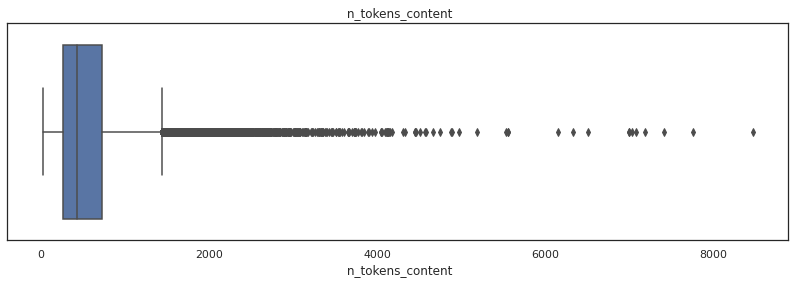

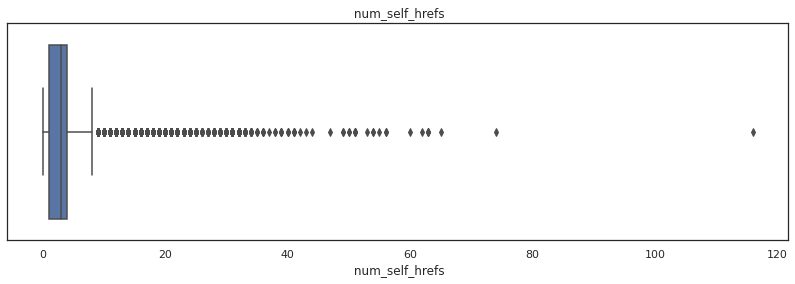

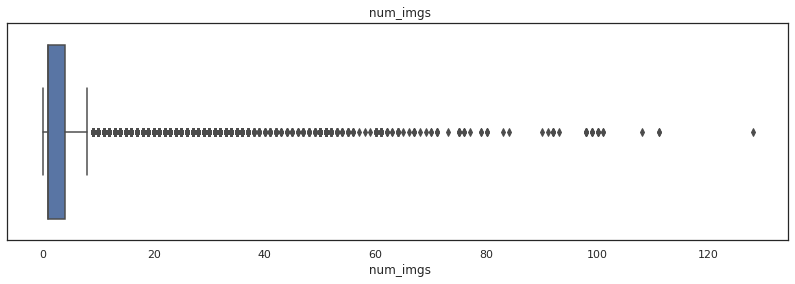

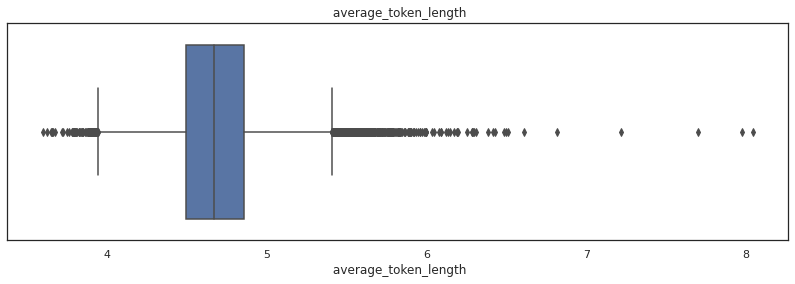

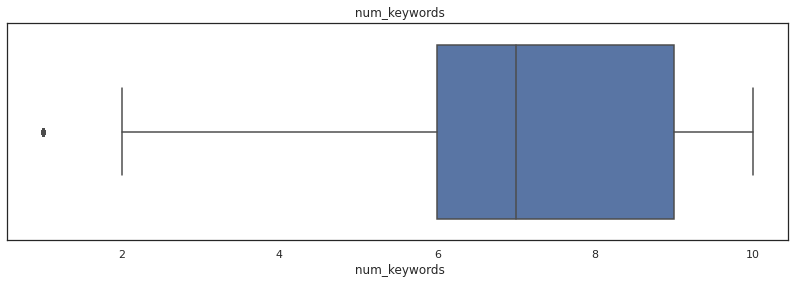

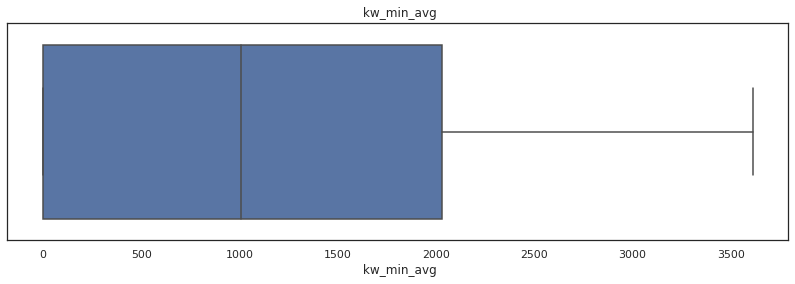

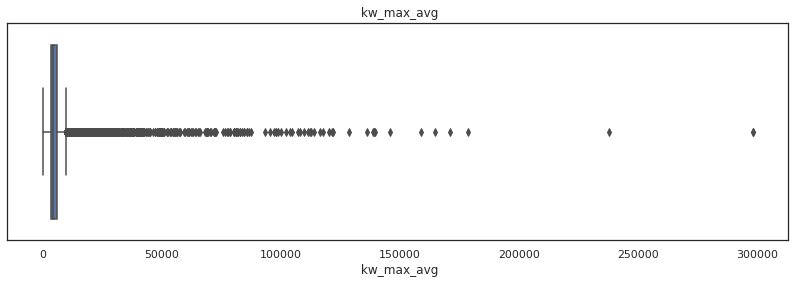

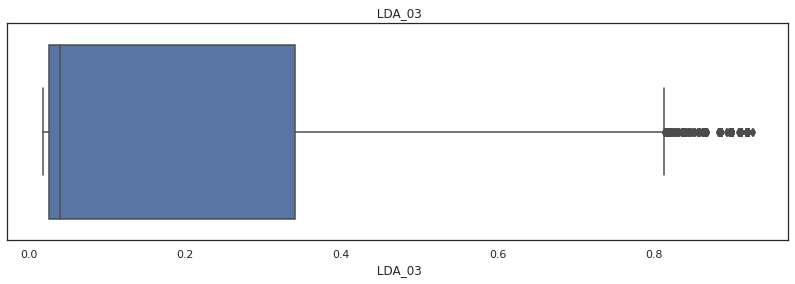

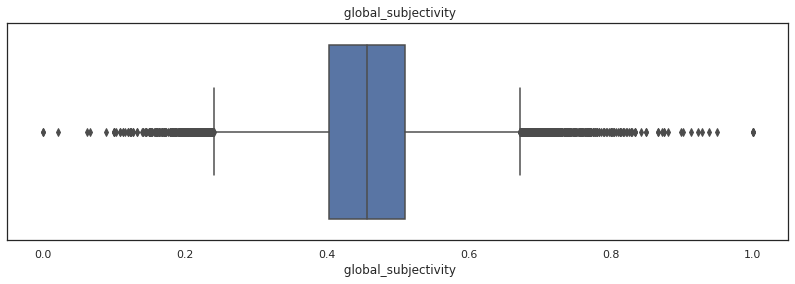

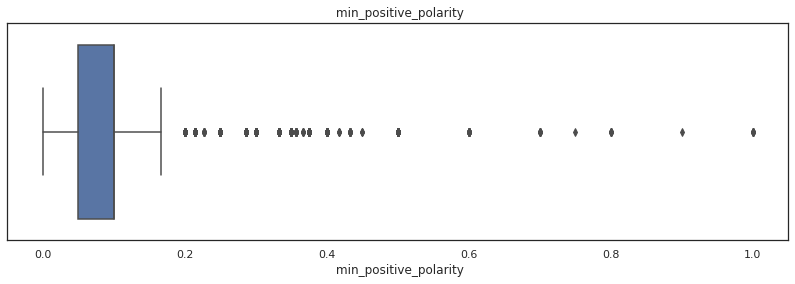

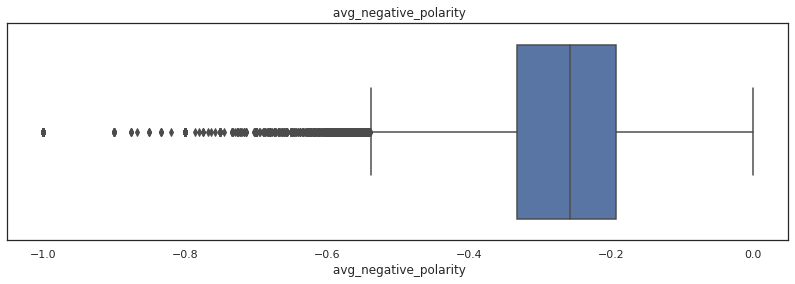

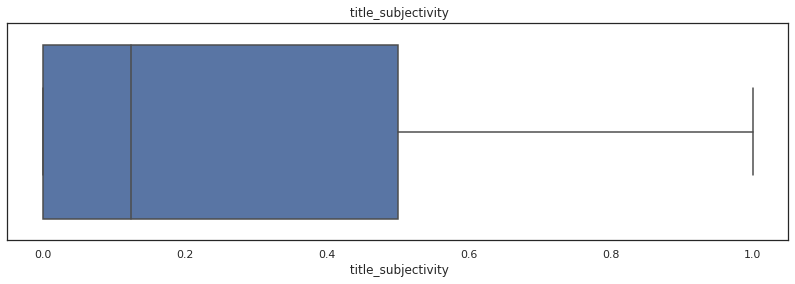

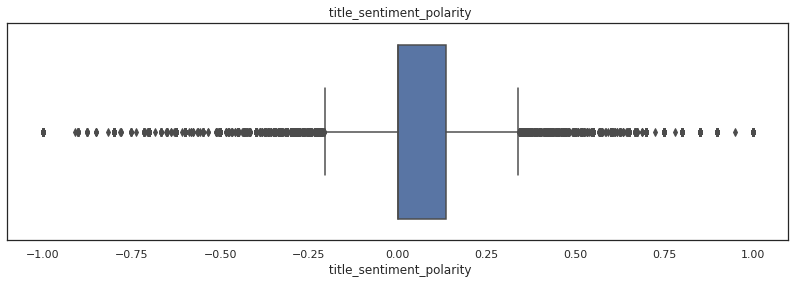

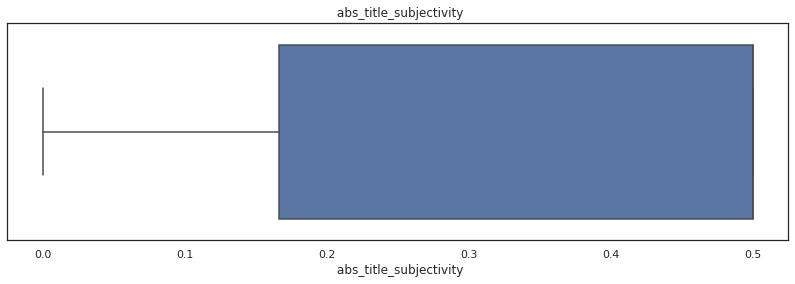

In [ ]:
for col in Num_cols:
    plt.figure(figsize=(14,4))
    sns.boxplot(x = df_out[col])
    plt.title(col)
    plt.show()

In [ ]:
for i in Num_cols:
  #print('Quantile Range of Columns {}'.format(i))
  percentile25 = df_out[i].quantile(0.25)
  percentile75 = df_out[i].quantile(0.75)
  #print('25th Quantile is ', percentile25)
  #print('75th Quantile is ', percentile75)
  iqr = percentile75 - percentile25
  upper_limit = percentile75 + 1.5 * iqr
  lower_limit = percentile25 - 1.5 * iqr
  df_out.drop(df_out[ (df_out[i] > upper_limit) | (df_out[i] < lower_limit) ].index , inplace=True)

In [ ]:
print(df_out.shape)

print('number of rows dropped or trimmed ', len(df) - len(df_out))

#We cant drop these many rows moving to approach two (Capping)

(16328, 25)
number of rows dropped or trimmed  22134


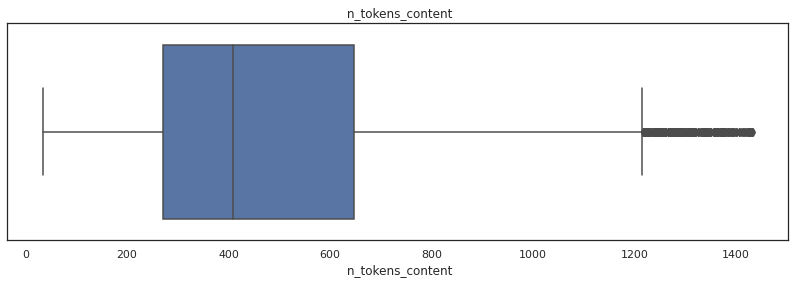

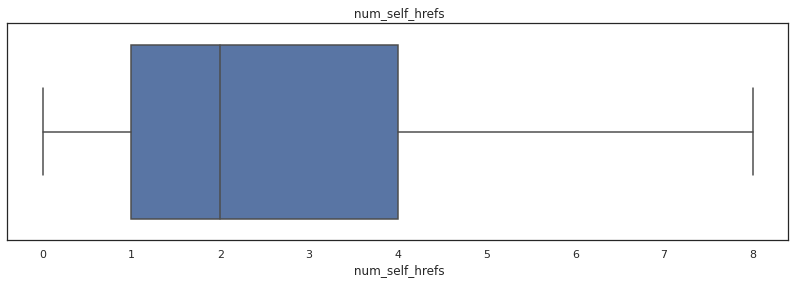

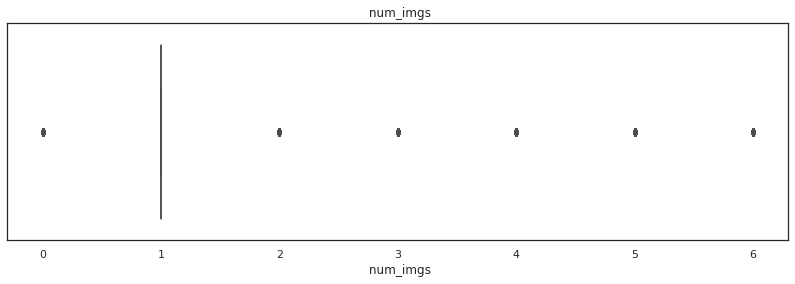

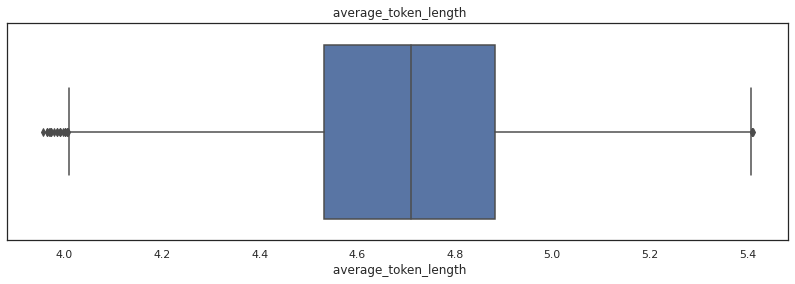

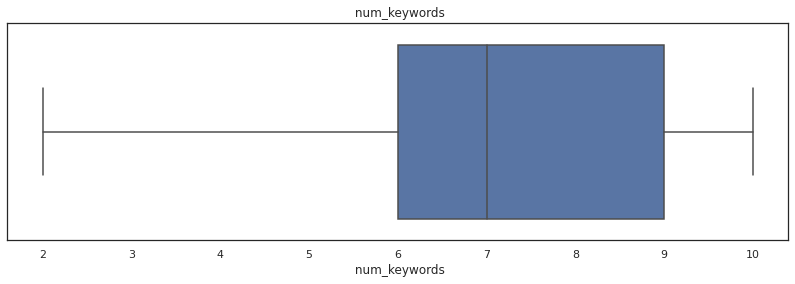

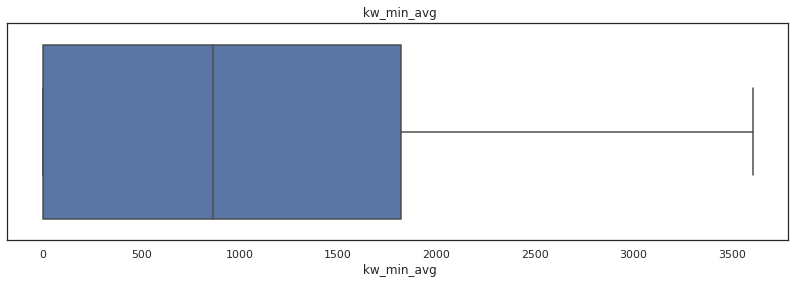

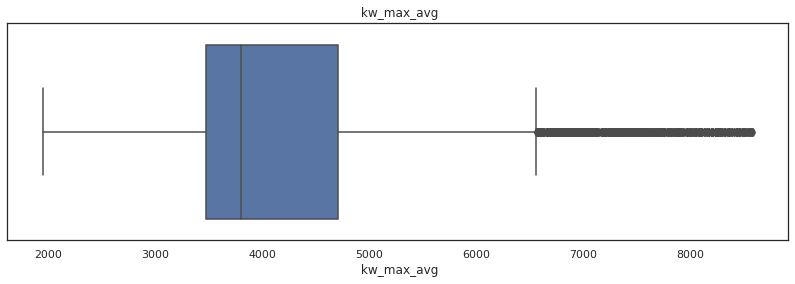

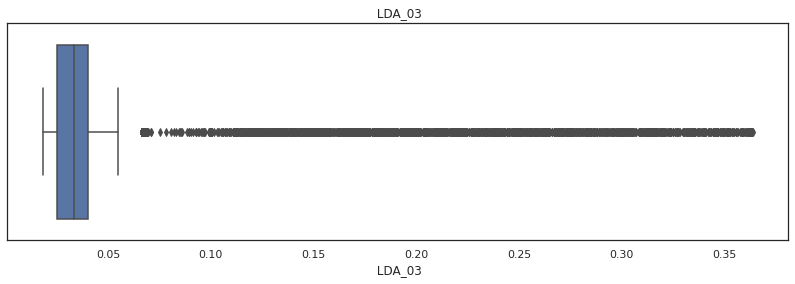

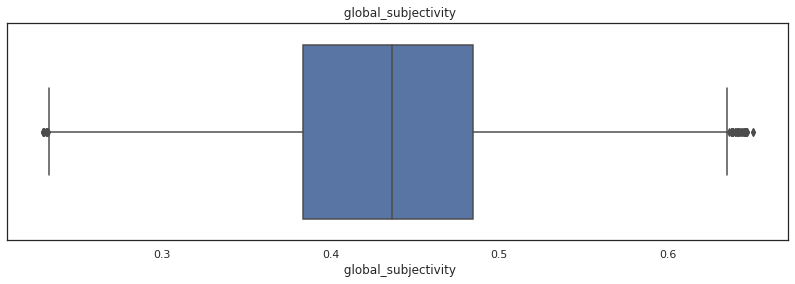

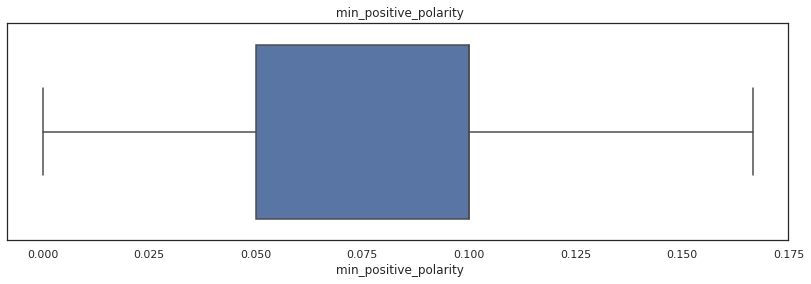

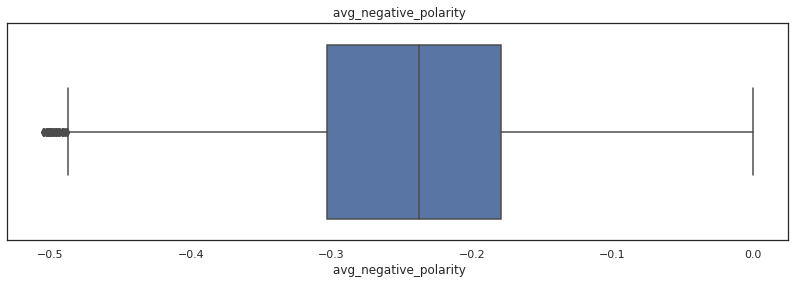

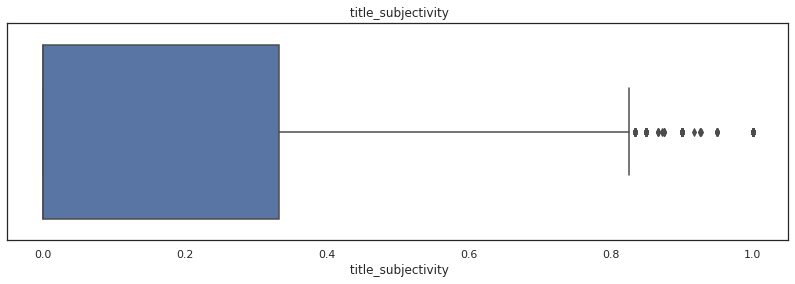

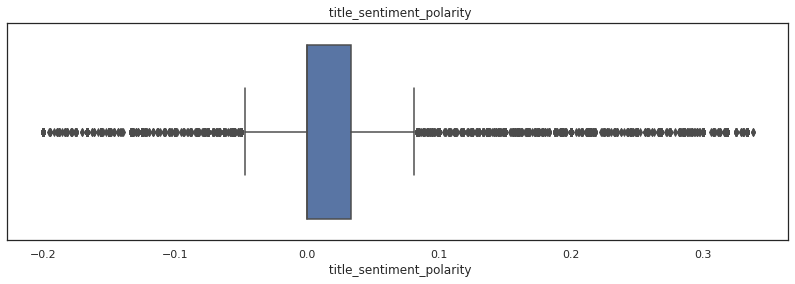

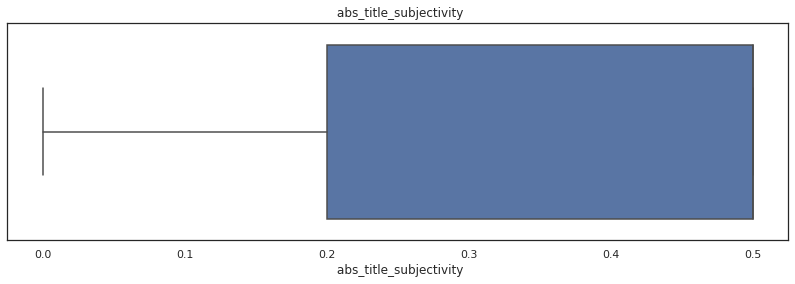

In [ ]:
for col in Num_cols:
    plt.figure(figsize=(14,4))
    sns.boxplot(x = df_out[col])
    plt.title(col)
    plt.show()

## Approach 2 - Capping 

In [ ]:
df_cap = df_25.copy()

In [ ]:
df_cap_36 = df.copy()

In [ ]:
for i in Num_cols:
  #print('Quantile Range of Columns {}'.format(i))
  percentile25 = df_cap[i].quantile(0.25)
  percentile75 = df_cap[i].quantile(0.75)
  #print('25th Quantile is ', percentile25)
  #print('75th Quantile is ', percentile75)
  iqr = percentile75 - percentile25
  upper_limit = percentile75 + 1.5 * iqr
  lower_limit = percentile25 - 1.5 * iqr
  df_cap[i] = np.where( df_cap[i] > upper_limit, upper_limit, np.where( df_cap[i] < lower_limit, lower_limit, df_cap[i] ) )

In [ ]:
for i in Num_cols_36:
  #print('Quantile Range of Columns {}'.format(i))
  percentile25 = df_cap_36[i].quantile(0.25)
  percentile75 = df_cap_36[i].quantile(0.75)
  #print('25th Quantile is ', percentile25)
  #print('75th Quantile is ', percentile75)
  iqr = percentile75 - percentile25
  upper_limit = percentile75 + 1.5 * iqr
  lower_limit = percentile25 - 1.5 * iqr
  df_cap_36[i] = np.where( df_cap_36[i] > upper_limit, upper_limit, np.where( df_cap_36[i] < lower_limit, lower_limit, df_cap_36[i] ) )

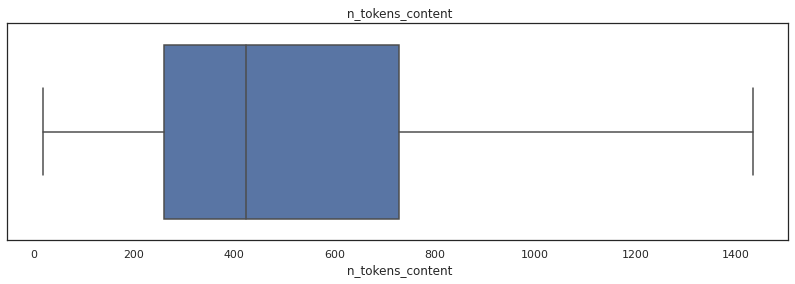

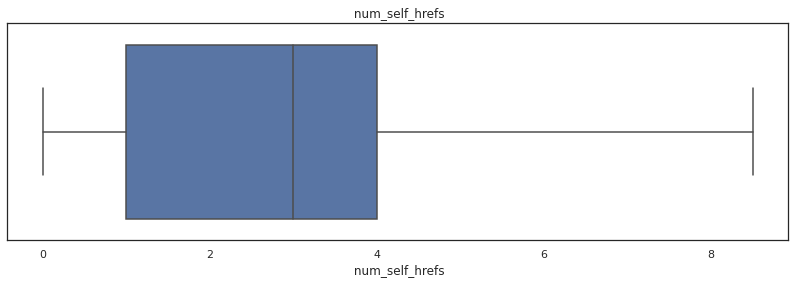

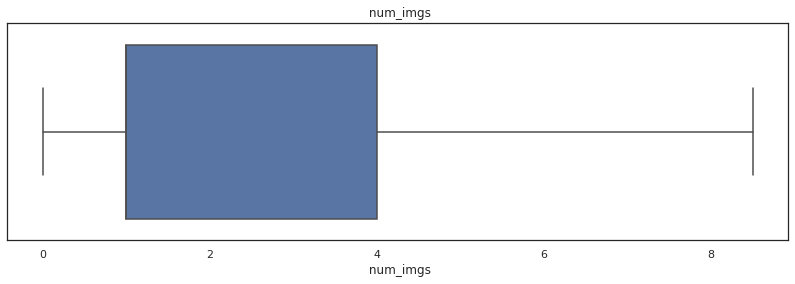

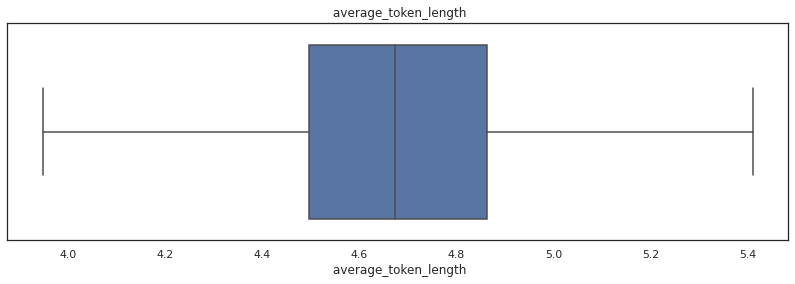

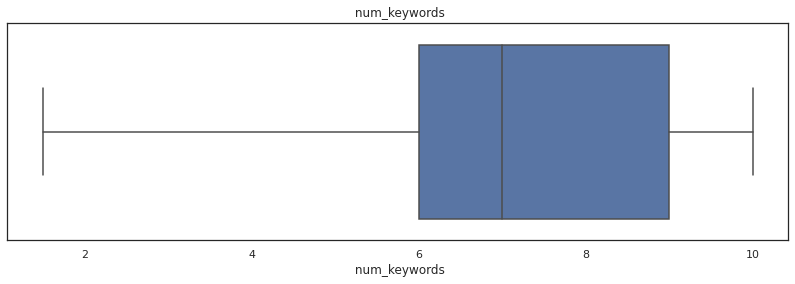

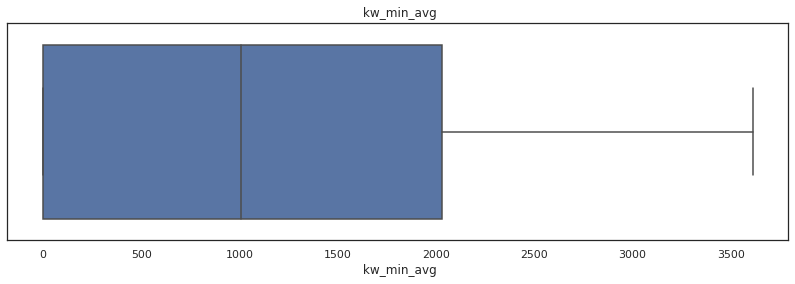

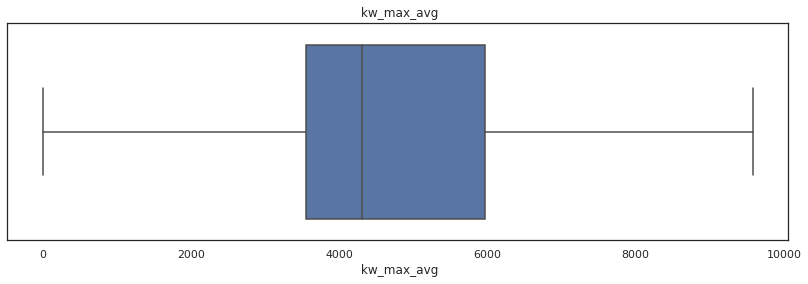

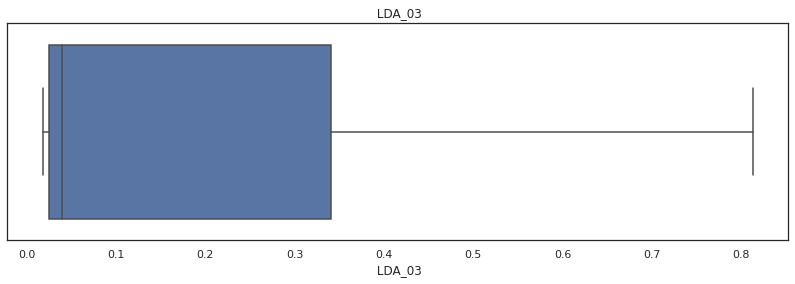

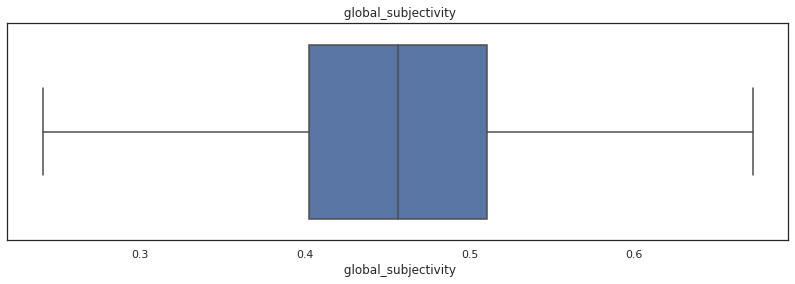

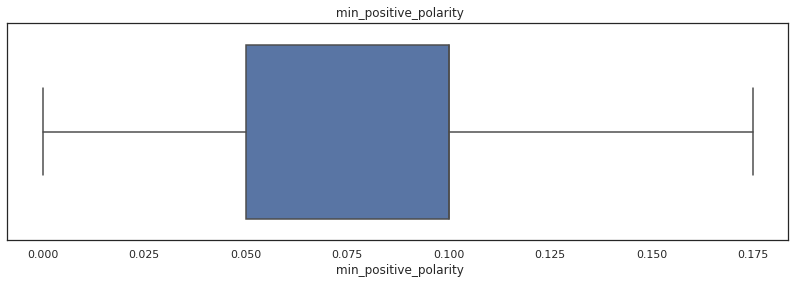

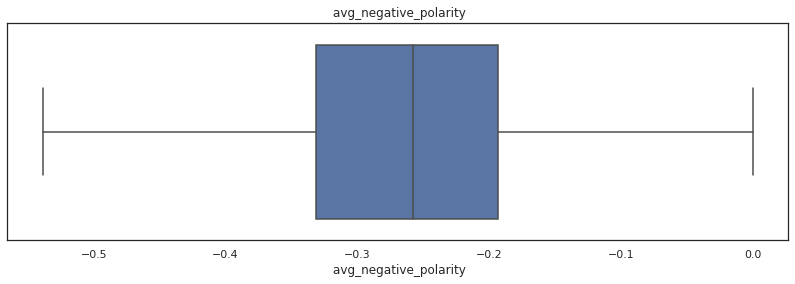

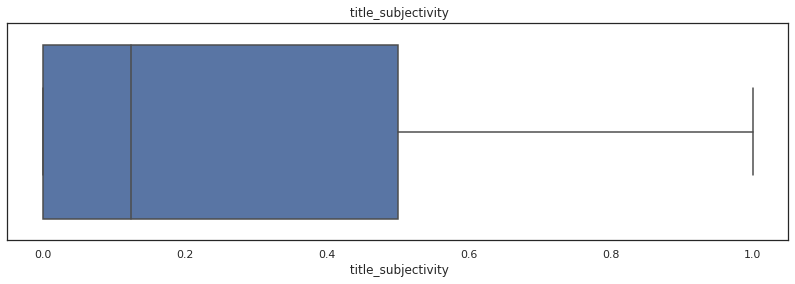

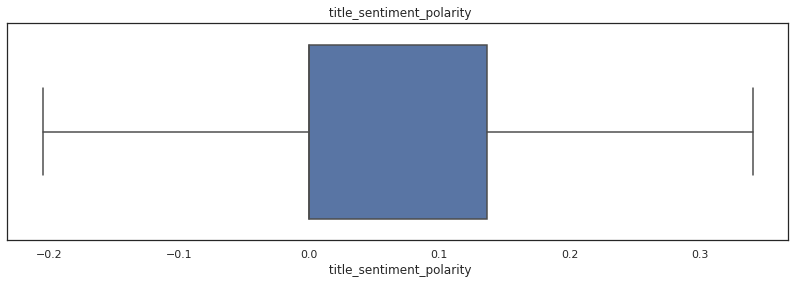

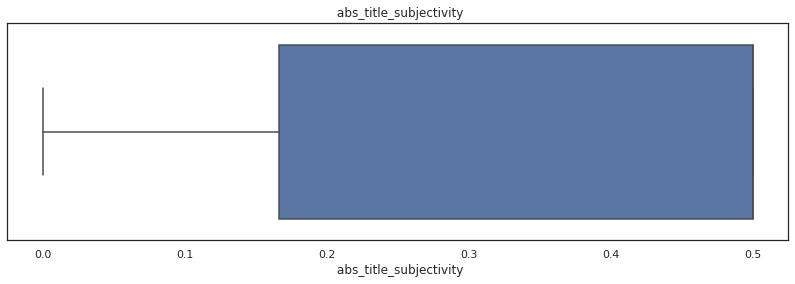

In [ ]:
for col in Num_cols:
    plt.figure(figsize=(14,4))
    sns.boxplot(x = df_cap[col])
    plt.title(col)
    plt.show()

# Apply Min Max Normalization

In [ ]:
df_norm = df_25.copy() #Only Normalized 

In [ ]:
df_norm_36 = df.copy() #Only Normalized 36

In [ ]:
df_no = df_cap.copy() #Normalized and Outlier Treatment


In [ ]:
df_no_36 = df_cap_36.copy() #Normalized and Outlier Treatment 36



Performing Min Max Normalization

In [ ]:
for column in Num_cols:
    df_norm[column] = (df_norm[column] - df_norm[column].min()) / (df_norm[column].max() - df_norm[column].min())

In [ ]:
for column in Num_cols_36:
    df_norm_36[column] = (df_norm_36[column] - df_norm_36[column].min()) / (df_norm_36[column].max() - df_norm_36[column].min())

In [ ]:
for column in Num_cols:
    df_no[column] = (df_no[column] - df_no[column].min()) / (df_no[column].max() - df_no[column].min())

In [ ]:
for column in Num_cols_36:
    df_no_36[column] = (df_no_36[column] - df_no_36[column].min()) / (df_no_36[column].max() - df_no_36[column].min())

In [ ]:
print(df_norm.shape)
print(df_norm_36.shape)
print(df_no.shape)
print(df_no_36.shape)

(38462, 25)
(38462, 36)
(38462, 25)
(38462, 36)


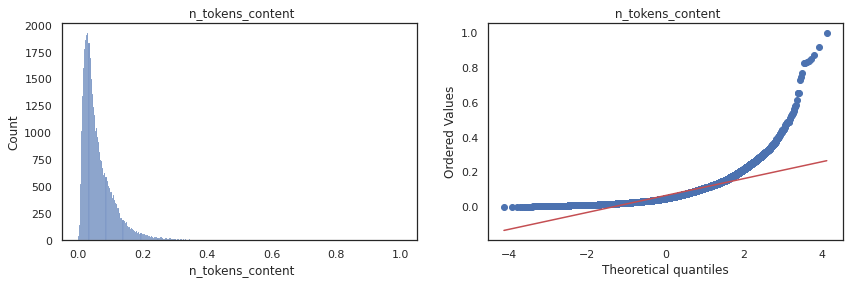

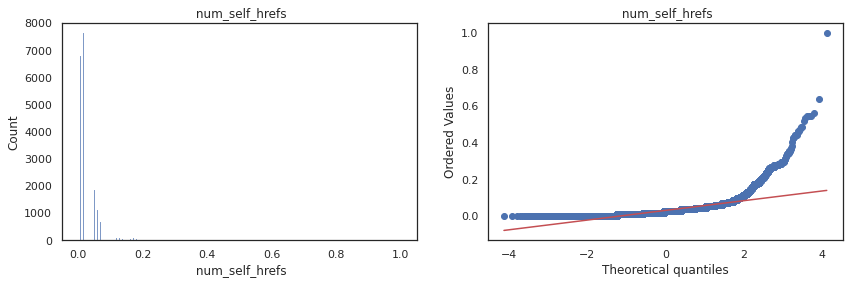

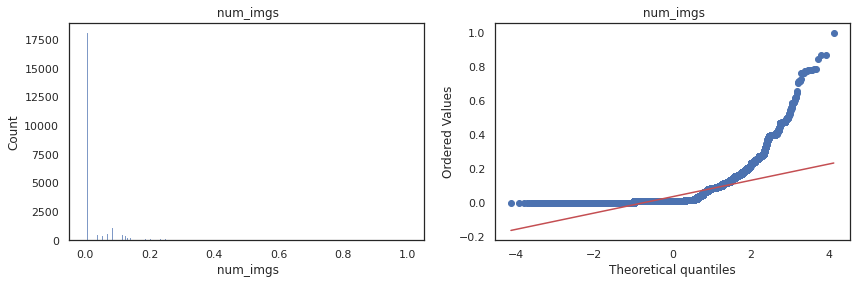

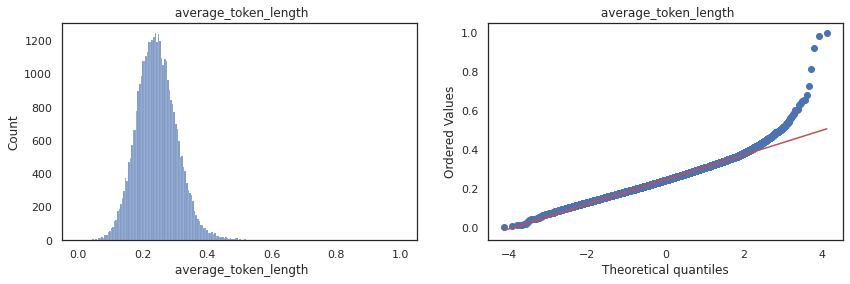

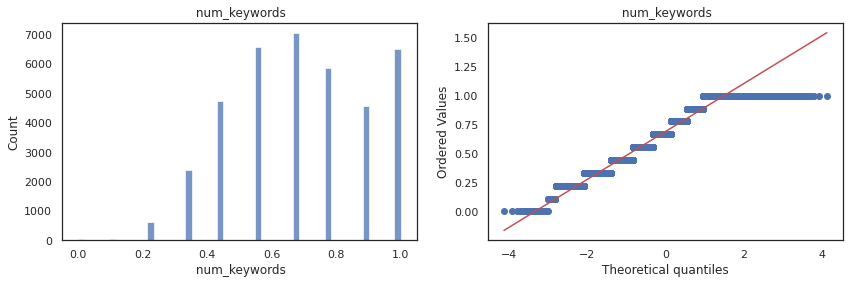

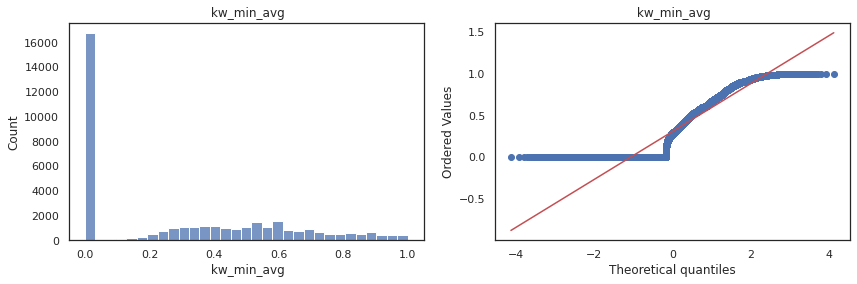

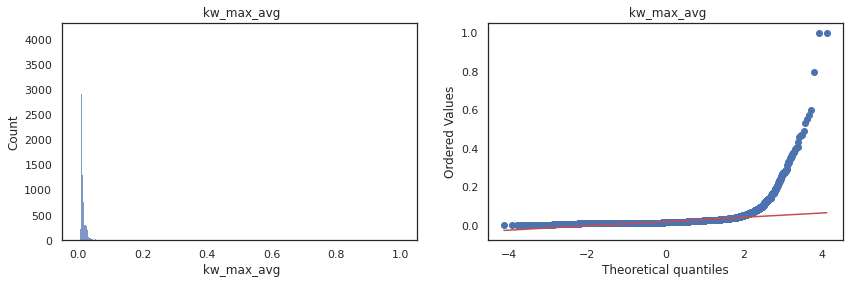

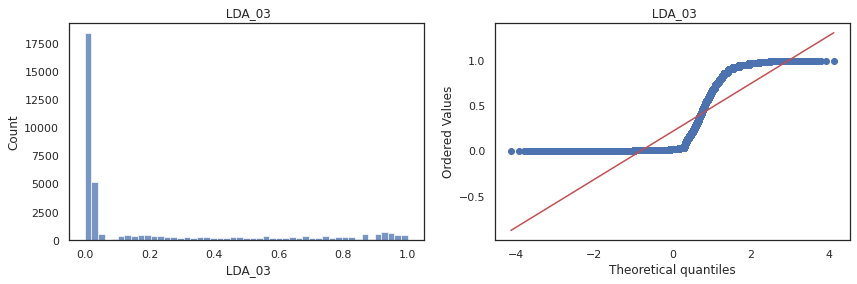

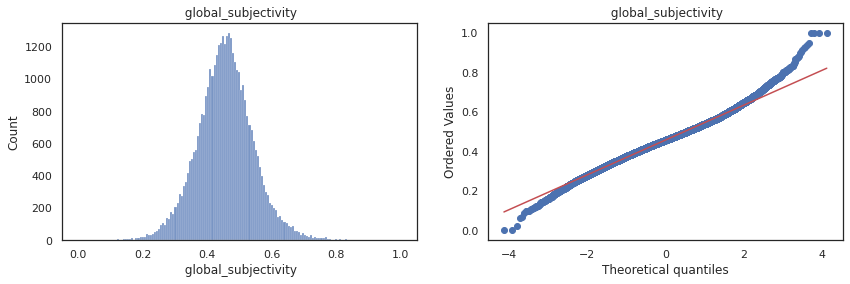

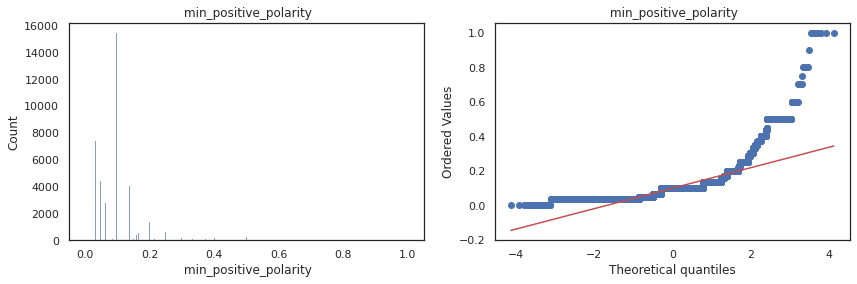

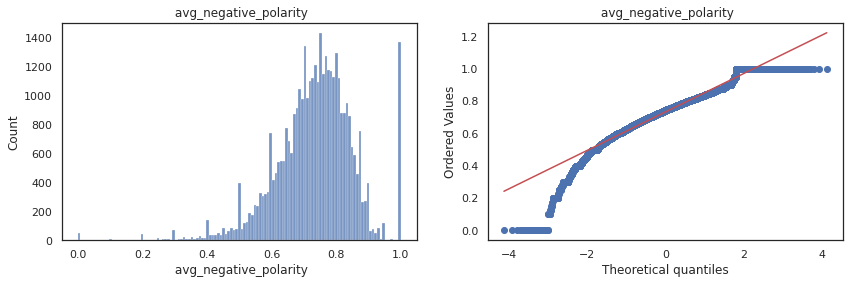

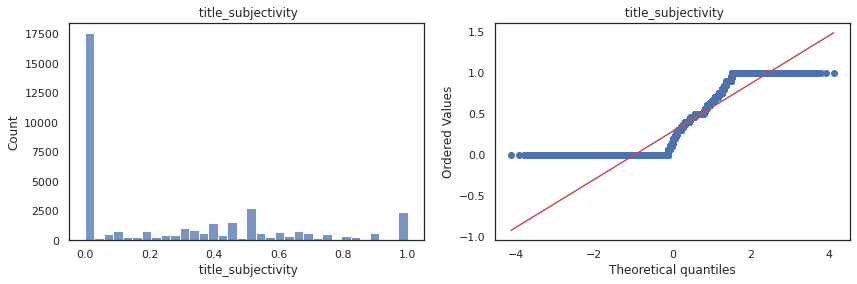

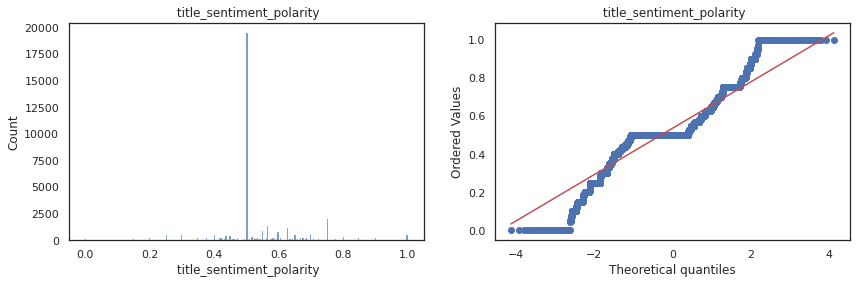

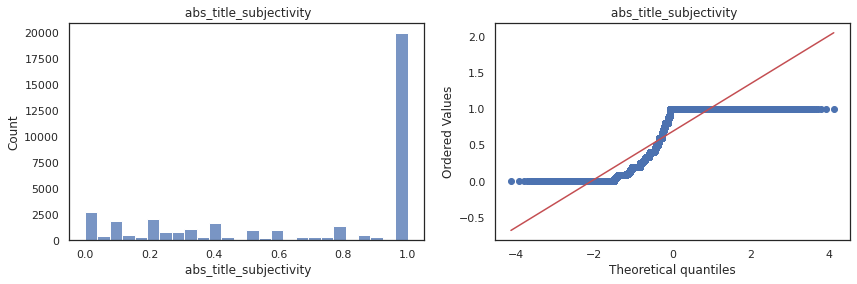

In [ ]:
for col in Num_cols:
    plt.figure(figsize=(14,4))
    plt.subplot(1,2,1)
    sns.histplot(df_norm[col])
    plt.title(col)

    plt.subplot(1,2,2)
    stats.probplot(df_norm[col], dist="norm", plot=plt)
    plt.title(col)

    plt.show()

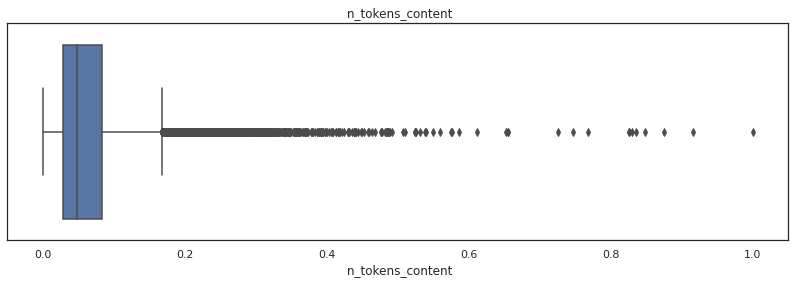

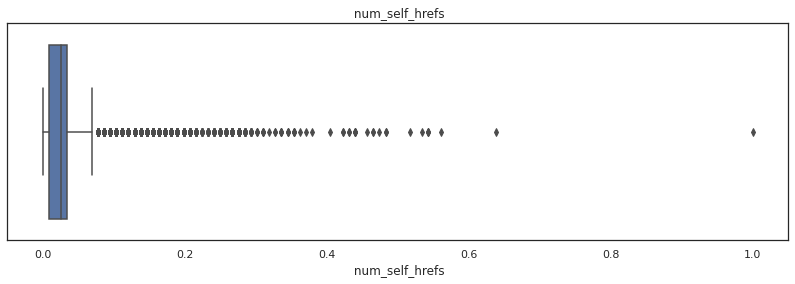

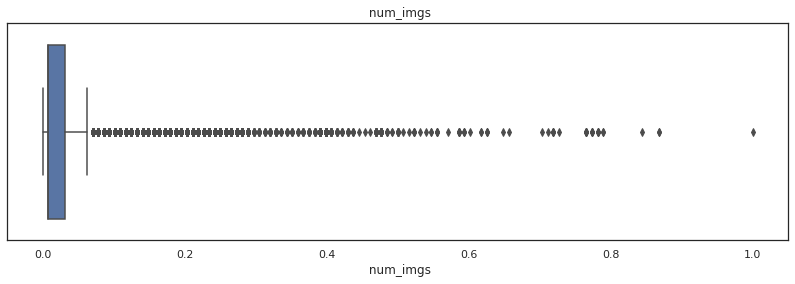

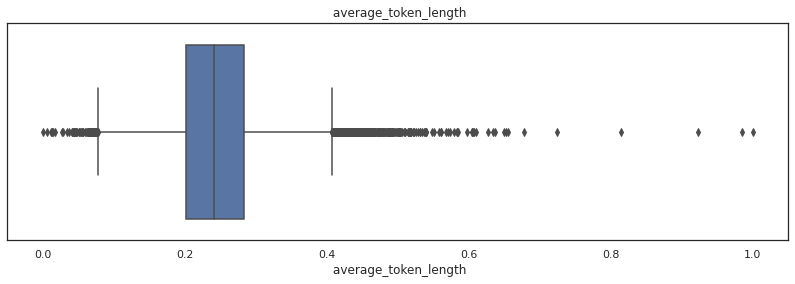

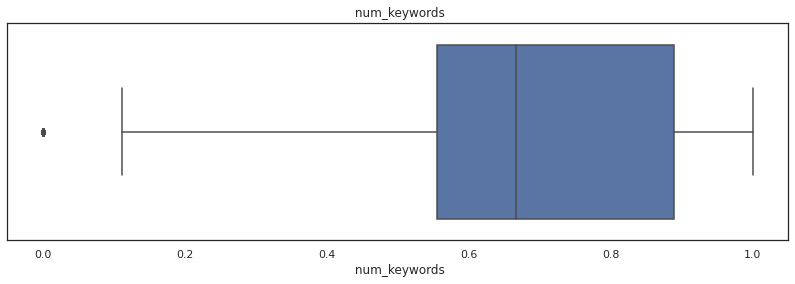

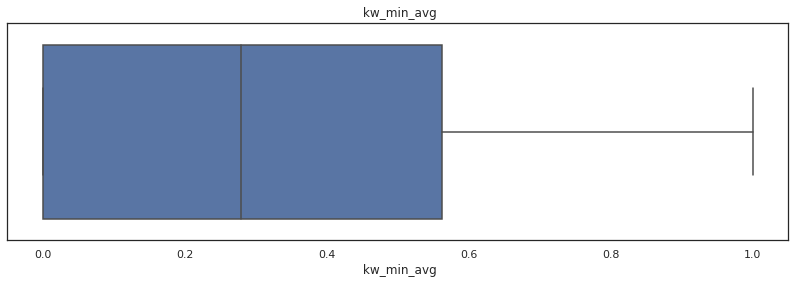

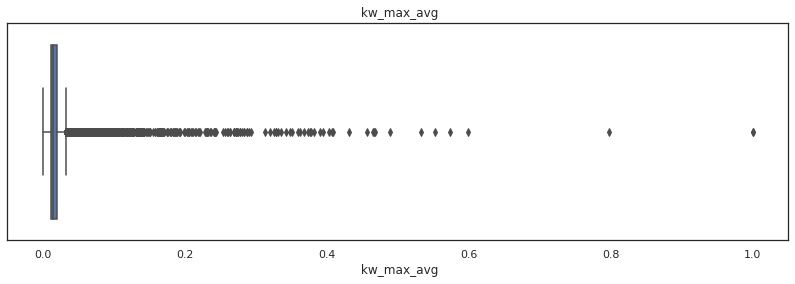

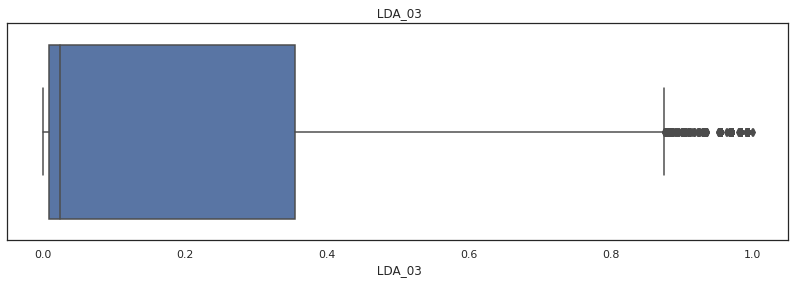

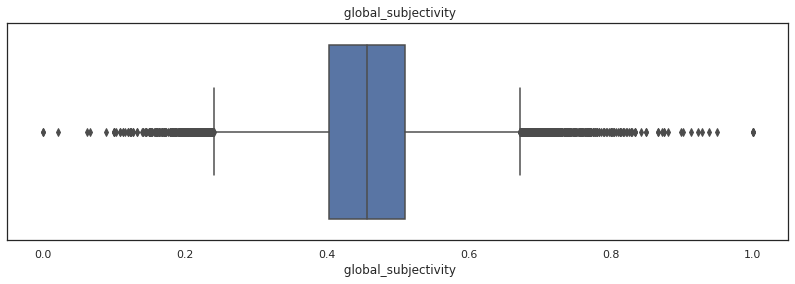

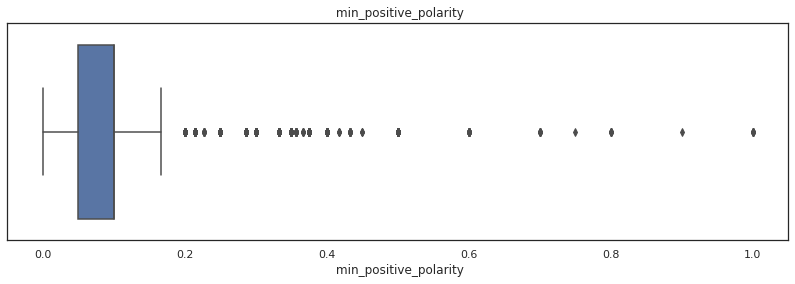

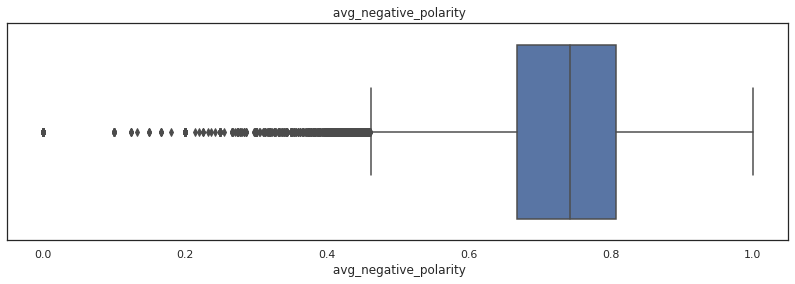

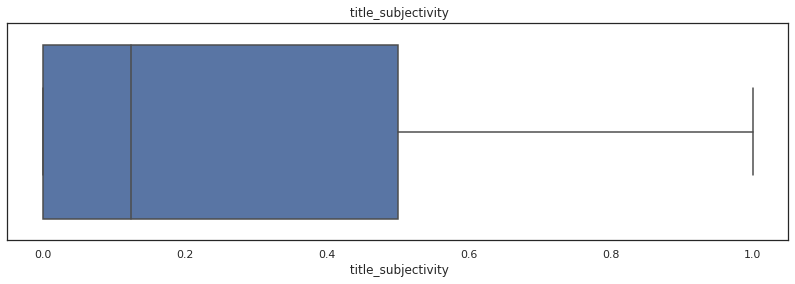

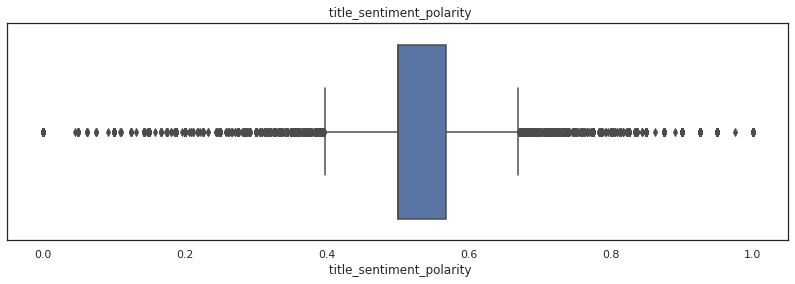

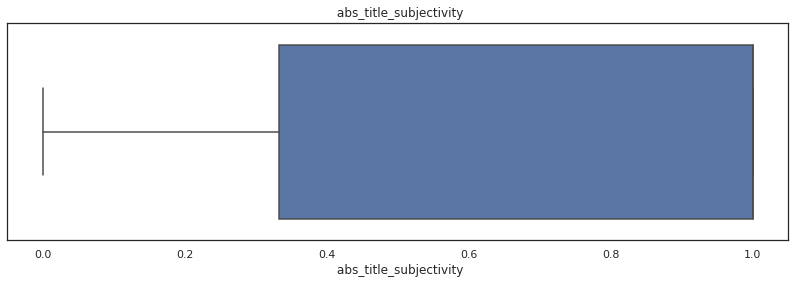

In [ ]:
for col in Num_cols:
    plt.figure(figsize=(14,4))
    sns.boxplot(x = df_norm[col])
    plt.title(col)
    plt.show()

# Principle Component Analysis (PCA)

In [ ]:
class PCA:
    def __int__ (self):
        pass
    def standardize_data(self,data):  
        arr = data.to_numpy()
        rows, columns = arr.shape
        standardizedArray = np.zeros(shape=(rows, columns))
        tempArray = np.zeros(rows)

        for column in range(columns):
            mean = np.mean(arr[:,column])
            std = np.std(arr[:,column])
            tempArray = np.empty(0)
            for element in arr[:,column]:
                tempArray = np.append(tempArray, ((element - mean) / std))
            standardizedArray[:,column] = tempArray
        return standardizedArray

    def fit(self,data):
        self.X = self.standardize_data(data)
        covariance_matrix = np.cov(self.X.T)
        eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
        PC = np.dot(self.X,eigen_vectors)
        return PC

    def eigen_value_decomp(self,X):
        covariance_matrix = np.cov(self.X.T)
        eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
        return eigen_values, eigen_vectors

    def explained_variance(self):
        eigen_values, eigen_vectors = self.eigen_value_decomp(self.X)
        variance_explained = []
        for i in eigen_values:
            variance_explained.append((i/sum(eigen_values))*100)
        return variance_explained
        

In [ ]:
import pandas as pd
import numpy as np
# df = pd.read_csv("/content/CleanedFile_25.csv")
#df = df.drop('Unnamed: 0',axis= 1)
target = df_25.iloc[:,-1]
features = df_25.iloc[:,:-1]
target = np.where(target == 0, -1, 1)

features = features[[' n_tokens_content',
    ' num_self_hrefs',
    ' num_imgs',
    ' average_token_length',
    ' num_keywords',
    ' kw_min_avg',
    ' kw_max_avg',
    ' LDA_03',
    ' global_subjectivity',
    ' min_positive_polarity',
    ' avg_negative_polarity',
    ' title_subjectivity',
    ' title_sentiment_polarity',
    ' abs_title_subjectivity']]



In [ ]:
test = PCA()

In [ ]:
array_PCA = test.fit(features)

In [ ]:
mlist = test.explained_variance()

In [ ]:
variance = np.cumsum(mlist)
variance

array([ 13.96769977,  26.25606643,  37.26924176,  46.27531026,
        54.33671315,  57.62002462,  61.08878504,  68.2201285 ,
        74.9963606 ,  80.73622171,  86.20412261,  90.49118603,
        95.31249435, 100.        ])

In [ ]:
df_PCA = pd.DataFrame(array_PCA, columns = ['X1','X2','X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14']).reset_index(drop = True)

In [ ]:
df_PCA

X1        X2        X3        X4        X5        X6        X7  \
0      0.090338 -1.045194 -1.116406  0.267911 -1.502984  0.043104  1.088993   
1     -2.805394 -0.080754 -0.356089  0.882206  0.397205 -0.272632  0.098850   
2      0.047798 -0.984968  1.411170 -0.427733 -2.868689 -0.479967  1.044875   
3     -1.362613 -0.363706  0.553696 -0.415982 -1.495852 -0.127913 -0.037999   
4      1.536045  3.510866 -1.280800  0.165378  0.118362 -0.312005  1.185177   
...         ...       ...       ...       ...       ...       ...       ...   
38457 -0.333144  0.124459  0.504219  0.530968 -0.305579 -0.328344  0.277765   
38458  2.294341 -0.829494 -1.104092  0.238994  0.520857  0.593241  0.434338   
38459  2.078267 -0.923578 -0.093934 -0.242428  1.144050  0.556921  0.680866   
38460 -2.234762  0.298340  0.009980  0.388221  0.320649  0.277526 -0.191452   
38461  0.202863 -1.530005 -0.914635  2.234387 -0.385899 -0.187287  0.802432   

             X8        X9       X10       X11       X12       X13       X14  
0      1.117150 -0.984931 -1.083925  0.092794 -0.856172  0.203556  0.146766  
1      0.568436 -0.282986  0.554828  0.651830 -1.160226 -0.590254  0.565813  
2     -0.045845 -1.029502  1.221969 -0.494215 -0.896572  0.580128 -0.315383  
3     -0.297048 -0.617324  0.409774  0.628365  0.501486  0.672064  0.585034  
4     -0.742110 -1.640558 -1.327324 -1.337107 -1.461412 -0.340085  0.685526  
...         ...       ...       ...       ...       ...       ...       ...  
38457 -0.928882  0.093860 -0.386147 -1.264815  0.659279 -0.215074 -0.605632  
38458 -2.387242 -0.214540  2.035570 -0.796112 -0.089630 -0.787819  0.864548  
38459  1.325453 -0.576358 -0.043050  0.319922  0.568115 -0.244851 -0.150852  
38460  0.880028 -0.063318  0.564555  0.490526 -0.773139  0.196077  0.557120  
38461 -0.692499  0.280276  0.322287 -0.285105 -0.123175  0.138958 -0.727694  

[38462 rows x 14 columns]

In [ ]:
df_PCA_10 = df_PCA.iloc[:, 0:10]

In [ ]:
df_PCA_5 = df_PCA.iloc[:, 0:5]

In [ ]:
df_PCA_3 = df_PCA.iloc[:, 0:3]

# Logistic Regression Class without Normalization

In [ ]:
X = df_25.iloc[:, :-1]
X.shape


(38462, 24)

In [ ]:
y = df_25.iloc[:,-1]
y.shape

(38462,)

In [ ]:
X_main, X_test_l, y_main, y_test_l = train_test_split(X,y, test_size = 0.2, random_state=4)
print(X_main.shape)
print(X_test_l.shape)
print(y_main.shape)
print(y_test_l.shape)

(30769, 24)
(7693, 24)
(30769,)
(7693,)


In [ ]:
X_train_l, X_val_l, y_train_l, y_val_l = train_test_split(X_main,y_main, test_size = 0.2, random_state=4)
print(X_train_l.shape)
print(X_val_l.shape)
print(y_train_l.shape)
print(y_val_l.shape)

(24615, 24)
(6154, 24)
(24615,)
(6154,)


In [ ]:
from tqdm.utils import RE_ANSI
class LogisticRegression:

  def __init__(self, learningRate, tolerance, maxiter) -> None:
      self.learningRate = learningRate
      self.tolerance = tolerance 
      self.maxiter = maxiter
    
  def add_x0(self,X ):

    return np.column_stack([np.ones([X.shape[0], 1]), X])

  def sigmoid(self, z):

    sig = 1/ (1 + np.exp(-z))

    return sig


  def costFunction(self, X, y):

    #approach 1
    y_hat = self.sigmoid( X.dot(self.w) )
    pred = y * np.log( y_hat ) + (1 - y) * np.log( 1 - y_hat )
    cost = - pred.sum()

    #approach 2 
    
    pred_ = np.log( np.ones(X.shape[0]) + np.exp(X.dot(self.w)) ) - X.dot(self.w).dot(y)
    cost_ = pred_.sum()

    return cost

  

  def gradient(self, X, y):
    # print('inside gradient')
    # print(X.shape, y.shape)

    y_hat = self.sigmoid( X.dot(self.w) )
    # print(y_hat)
    grad = (y_hat - y).dot(X)

    
    return grad

  
  def gradientDescent(self, X, y):

    errors = []
    last_error = float('inf')

    for i in tqdm( range(self.maxiter) ):


      self.w = self.w - self.learningRate * self.gradient(X,y)



      currentError = self.costFunction(X,y)



      diff = last_error - currentError



      last_error = currentError
     
      errors.append(currentError)

      if np.abs(diff) < self.tolerance:

        print('Model stopped learning')
        break
    # self.plot_cost(errors)   
    return
    
  def predict(self,X):

      self.X_test = X
      # print(self.X_test.shape)
      # print('inside sig')
      sig = self.sigmoid(self.X_test.dot(self.w))
      # print('outside sig')
      
      return np.around(sig)


    
  def fit(self, X, y):

      self.X_train = X
      self.y_train = y

      # print('shape of X train and Y train', self.X_train.shape, self.y_train.shape)
      # print('Printing X_train')
      # # print(X_train)


      self.w = np.ones(self.X_train.shape[1], dtype = np.float64) * 0
      # print(self.w.shape)

     

      self.gradientDescent(self.X_train, self.y_train)

      # print(self.w)
      

      #y_hat_train = self.predict(self.X_train)

      




  def evaluate(self, y_test, y_pred):

    self.y_hat = y_pred
    self.y_test = y_test
    y = (self.y_test == 1)
    y_hat = (self.y_hat == 1)

    accuracy = ( y == y_hat).sum() / y.size
    precision = (y & y_hat).sum() / y_hat.sum()
    recall = (y & y_hat).sum() / y.sum()

    # print('Accuracy is {}', accuracy)
    # print('recall is {}', recall)
    # print('precision is {}', precision)

    return accuracy
    
  def plot_cost(self, cost_sequence):
    # Data for plotting
      s = np.array(cost_sequence)
      t = np.arange(s.size)

      fig, ax = plt.subplots()
      ax.plot(t, s)

      ax.set(xlabel='iterations', ylabel='cost',
            title='cost trend')
      ax.grid()

      plt.legend(bbox_to_anchor=(1.05,1), loc=2, shadow=True)
      plt.show()

  def plot(self):
        plt.figure(figsize=(12, 8))
        ax = plt.axes(projection='3d')

        # Data for three-dimensional scattered points
        ax.scatter3D(self.X_train[:, 0], self.X_train[:, 1], 
                     self.sigmoid(self.X_train.dot(self.w)), 
                     c = self.y_train[:], cmap='viridis', s=100);

        ax.set_xlim3d(55, 80)
        ax.set_ylim3d(80, 240)
        plt.xlabel('$x_1$ feature', fontsize=15)
        plt.ylabel('$x_2$ feature', fontsize=15, )
        ax.set_zlabel('$P(Y = 1|x_1, x_2)$', fontsize=15, rotation = 0)

    
  def scatterPlt(self):
        # evenly sampled points
        x_min, x_max = 55, 80
        y_min, y_max = 80, 240

        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 250),
                             np.linspace(y_min, y_max, 250))
        grid = np.c_[xx.ravel(), yy.ravel()]
        probs = grid.dot(self.w).reshape(xx.shape)

        f, ax = plt.subplots(figsize=(14,12))


        ax.contour(xx, yy, probs, levels=[0.5], cmap="Greys", vmin=0, vmax=.6)


        ax.scatter(self.X_train[:, 0], self.X_train[:, 1], 
                   c=self.y_train[:], s=50,
                   cmap="RdBu", vmin=-.2, vmax=1.2,
                   edgecolor="white", linewidth=1)

        plt.xlabel('x1 feature')
        plt.ylabel('x2 feature')
        

  def plot3D(self):
    # evenly sampled points
    x_min, x_max = 55, 80
    y_min, y_max = 80, 240
    
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 250),
                          np.linspace(y_min, y_max, 250))
    
    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = grid.dot(self.w).reshape(xx.shape)
    fig = plt.figure(figsize=(14,12))
    ax = plt.axes(projection='3d')
    ax.contour3D(xx, yy, probs, 50, cmap='binary')

    ax.scatter3D(self.X_train[:, 0], self.X_train[:, 1], 
                c=self.y_train[:], s=50,
                cmap="RdBu", vmin=-.2, vmax=1.2,
                edgecolor="white", linewidth=1)

    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('probs')
    ax.set_title('3D contour')
    plt.show()

In [ ]:
# Model training    

max_accuracy =  0     

# learning_rate choices    

learningRate = [0.000001, 0.00001,0.0001, 0.001 ]      

# iterations choices    

maxiter = [ 100, 1000, 1500, 2000, 5000 ]

tolerance = [0.0000005]      

parameters = []

for i in learningRate :      

    for j in maxiter :
        for k in tolerance:      

            parameters.append( ( i, j , k) )
parameters



for k in range( len( parameters ) ) :
    lr = LogisticRegression(learningRate= parameters[k][0], tolerance= parameters[k][2], maxiter=parameters[k][1])
    lr.fit(X_train_l,y_train_l)
    curr_acc = lr.evaluate(y_val_l, lr.predict(X_val_l))
    print(curr_acc)

    if max_accuracy < curr_acc:

        learningRate = parameters[k][0]

        tolerance = parameters[k][2]

        maxiter=parameters[k][1]

        max_accuracy = curr_acc

print("learningRate",learningRate)

print("tolerance",tolerance)

print("maxiter",maxiter)

print( "Maximum accuracy achieved by our model through grid searching : ", max_accuracy )

100%|██████████| 100/100 [00:01<00:00, 61.47it/s]


0.66249593760156


100%|██████████| 1000/1000 [00:17<00:00, 58.38it/s]


0.66249593760156


100%|██████████| 1500/1500 [00:22<00:00, 66.07it/s]


0.66249593760156


100%|██████████| 2000/2000 [00:30<00:00, 64.75it/s]


0.3389665258368541


100%|██████████| 5000/5000 [01:17<00:00, 64.16it/s]


0.66249593760156


100%|██████████| 100/100 [00:01<00:00, 70.28it/s]


0.66249593760156


100%|██████████| 1000/1000 [00:16<00:00, 61.66it/s]


0.66249593760156


100%|██████████| 1500/1500 [00:21<00:00, 68.42it/s]


0.66249593760156


100%|██████████| 2000/2000 [00:29<00:00, 68.30it/s]


0.5170620734481638


100%|██████████| 5000/5000 [01:15<00:00, 66.63it/s]


0.3389665258368541


100%|██████████| 100/100 [00:01<00:00, 63.58it/s]


0.66249593760156


100%|██████████| 1000/1000 [00:16<00:00, 60.96it/s]


0.3389665258368541


100%|██████████| 1500/1500 [00:35<00:00, 42.18it/s]


0.3389665258368541


100%|██████████| 2000/2000 [00:29<00:00, 68.10it/s]


0.3389665258368541


100%|██████████| 5000/5000 [02:08<00:00, 38.88it/s]


0.3389665258368541


100%|██████████| 100/100 [00:01<00:00, 70.45it/s]


0.3389665258368541


100%|██████████| 1000/1000 [00:15<00:00, 63.53it/s]


0.3389665258368541


100%|██████████| 1500/1500 [00:25<00:00, 59.84it/s]


0.3389665258368541


100%|██████████| 2000/2000 [00:28<00:00, 69.70it/s]


0.3389665258368541


100%|██████████| 5000/5000 [01:15<00:00, 66.53it/s]

0.3389665258368541
learningRate 1e-06
tolerance 5e-07
maxiter 100
Maximum accuracy achieved by our model through grid searching :  0.66249593760156


In [ ]:
np.seterr('ignore')
# get the start time
st = time.time()

# main program


lr = LogisticRegression(learningRate= 1e-06, tolerance= 5e-07, maxiter=100)
lr.fit(X_train_l,y_train_l)
y_pred_l = lr.predict(X_test_l)


# get the end time
et = time.time()

# get the execution time
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

100%|██████████| 100/100 [00:01<00:00, 62.77it/s]

Execution time: 1.610595703125 seconds


In [ ]:
np.mean(y_pred_l == y_test_l)

0.658390744832965

In [ ]:
y_pred_val_l = lr.predict(X_val_l)
np.mean(y_pred_val_l == y_val_l)

0.66249593760156

# Logistic Regression class with Normalization 

In [ ]:
X_n = df_norm.iloc[:, :-1]
X_n.shape

(38462, 24)

In [ ]:
y_n = df_norm.iloc[:,-1]
y_n.shape

(38462,)

In [ ]:
X_main, X_test_l, y_main, y_test_l = train_test_split(X_n,y_n, test_size = 0.2, random_state=4)
print(X_main.shape)
print(X_test_l.shape)
print(y_main.shape)
print(y_test_l.shape)

(30769, 24)
(7693, 24)
(30769,)
(7693,)


In [ ]:
X_train_l, X_val_l, y_train_l, y_val_l = train_test_split(X_main,y_main, test_size = 0.2, random_state=4)
print(X_train_l.shape)
print(X_val_l.shape)
print(y_train_l.shape)
print(y_val_l.shape)

(24615, 24)
(6154, 24)
(24615,)
(6154,)


In [ ]:
# Model training    

max_accuracy =  0     

# learning_rate choices    

learningRate = [0.000001, 0.00001,0.0001, 0.001 ]      

# iterations choices    

maxiter = [ 100, 1000, 1500, 2000, 5000 ]

tolerance = [0.0000005]      

parameters = []

for i in learningRate :      

    for j in maxiter :
        for k in tolerance:      

            parameters.append( ( i, j , k) )
parameters



for k in range( len( parameters ) ) :
    lr = LogisticRegression(learningRate= parameters[k][0], tolerance= parameters[k][2], maxiter=parameters[k][1])
    lr.fit(X_train_l,y_train_l)
    curr_acc = lr.evaluate(y_val_l, lr.predict(X_val_l))
    print(curr_acc)

    if max_accuracy < curr_acc:

        learningRate = parameters[k][0]

        tolerance = parameters[k][2]

        maxiter=parameters[k][1]

        max_accuracy = curr_acc

print("learningRate",learningRate)

print("tolerance",tolerance)

print("maxiter",maxiter)

print( "Maximum accuracy achieved by our model through grid searching : ", max_accuracy )

100%|██████████| 100/100 [00:01<00:00, 58.93it/s]


0.66249593760156


100%|██████████| 1000/1000 [00:19<00:00, 52.53it/s]


0.6620084497887553


100%|██████████| 1500/1500 [00:26<00:00, 57.35it/s]


0.6649333766655834


100%|██████████| 2000/2000 [00:36<00:00, 55.15it/s]


0.6676958076048098


100%|██████████| 5000/5000 [01:31<00:00, 54.69it/s]


0.6689957751056224


100%|██████████| 100/100 [00:02<00:00, 38.62it/s]


0.6620084497887553


100%|██████████| 1000/1000 [00:17<00:00, 55.72it/s]


0.6709457263568411


100%|██████████| 1500/1500 [00:26<00:00, 56.36it/s]


0.6711082222944427


100%|██████████| 2000/2000 [00:36<00:00, 54.48it/s]


0.6719207019824505


100%|██████████| 5000/5000 [01:30<00:00, 55.46it/s]


0.6733831654208645


100%|██████████| 100/100 [00:01<00:00, 58.44it/s]


0.6709457263568411


100%|██████████| 1000/1000 [00:17<00:00, 56.02it/s]


0.6733831654208645


100%|██████████| 1500/1500 [00:27<00:00, 55.54it/s]


0.6743581410464738


100%|██████████| 2000/2000 [00:38<00:00, 51.74it/s]


0.6745206369840754


100%|██████████| 5000/5000 [01:31<00:00, 54.47it/s]


0.6743581410464738


100%|██████████| 100/100 [00:01<00:00, 58.83it/s]


0.3412414689632759


100%|██████████| 1000/1000 [00:18<00:00, 53.31it/s]


0.672083197920052


100%|██████████| 1500/1500 [00:27<00:00, 54.19it/s]


0.66249593760156


100%|██████████| 2000/2000 [00:39<00:00, 51.15it/s]


0.66249593760156


100%|██████████| 5000/5000 [01:33<00:00, 53.48it/s]

0.6717582060448489
learningRate 0.0001
tolerance 5e-07
maxiter 2000
Maximum accuracy achieved by our model through grid searching :  0.6745206369840754


In [ ]:
np.seterr('ignore')

# get the start time
st = time.time()

# main program


lr = LogisticRegression(learningRate= 0.0001, tolerance= 5e-07, maxiter=2000)
lr.fit(X_train_l,y_train_l)
y_pred_ln = lr.predict(X_test_l)


# get the end time
et = time.time()

# get the execution time
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')


100%|██████████| 2000/2000 [00:51<00:00, 39.12it/s]

Execution time: 51.1388041973114 seconds


In [ ]:
np.mean(y_pred_ln == y_test_l)

0.6703496685298324

In [ ]:
y_pred_val_ln = lr.predict(X_val_l)
np.mean(y_pred_val_ln == y_val_l)

0.6745206369840754

# Logistic Regression Without Outliers

In [ ]:
X_o = df_cap.iloc[:, :-1]
X_o.shape

(38462, 24)

In [ ]:
y_o = df_cap.iloc[:,-1]
y_o.shape

(38462,)

In [ ]:
X_main, X_test_l, y_main, y_test_l = train_test_split(X_o,y_o, test_size = 0.2, random_state=4)
print(X_main.shape)
print(X_test_l.shape)
print(y_main.shape)
print(y_test_l.shape)

(30769, 24)
(7693, 24)
(30769,)
(7693,)


In [ ]:
X_train_l, X_val_l, y_train_l, y_val_l = train_test_split(X_main,y_main, test_size = 0.2, random_state=4)
print(X_train_l.shape)
print(X_val_l.shape)
print(y_train_l.shape)
print(y_val_l.shape)

(24615, 24)
(6154, 24)
(24615,)
(6154,)


In [ ]:
# Model training    

max_accuracy =  0     

# learning_rate choices    

learningRate = [0.000001, 0.00001,0.0001, 0.001 ]      

# iterations choices    

maxiter = [ 100, 1000, 1500, 2000, 5000 ]

tolerance = [0.0000005]      

parameters = []

for i in learningRate :      

    for j in maxiter :
        for k in tolerance:      

            parameters.append( ( i, j , k) )
parameters



for k in range( len( parameters ) ) :
    lr = LogisticRegression(learningRate= parameters[k][0], tolerance= parameters[k][2], maxiter=parameters[k][1])
    lr.fit(X_train_l,y_train_l)
    curr_acc = lr.evaluate(y_val_l, lr.predict(X_val_l))
    print(curr_acc)

    if max_accuracy < curr_acc:

        learningRate = parameters[k][0]

        tolerance = parameters[k][2]

        maxiter=parameters[k][1]

        max_accuracy = curr_acc

print("learningRate",learningRate)

print("tolerance",tolerance)

print("maxiter",maxiter)

print( "Maximum accuracy achieved by our model through grid searching : ", max_accuracy )

100%|██████████| 100/100 [00:02<00:00, 46.09it/s]


0.34757881052973677


100%|██████████| 1000/1000 [00:16<00:00, 59.27it/s]


0.66249593760156


100%|██████████| 1500/1500 [00:22<00:00, 66.66it/s]


0.3389665258368541


100%|██████████| 2000/2000 [00:31<00:00, 64.26it/s]


0.3389665258368541


100%|██████████| 5000/5000 [01:15<00:00, 65.81it/s]


0.34026649333766656


100%|██████████| 100/100 [00:01<00:00, 64.43it/s]


0.3477413064673383


100%|██████████| 1000/1000 [00:14<00:00, 68.30it/s]


0.3389665258368541


100%|██████████| 1500/1500 [00:24<00:00, 60.52it/s]


0.66249593760156


100%|██████████| 2000/2000 [00:29<00:00, 68.27it/s]


0.3389665258368541


100%|██████████| 5000/5000 [01:16<00:00, 65.15it/s]


0.44101397465063374


100%|██████████| 100/100 [00:01<00:00, 65.88it/s]


0.3477413064673383


100%|██████████| 1000/1000 [00:14<00:00, 68.50it/s]


0.33912902177445564


100%|██████████| 1500/1500 [00:21<00:00, 68.83it/s]


0.3389665258368541


100%|██████████| 2000/2000 [00:30<00:00, 65.10it/s]


0.66249593760156


100%|██████████| 5000/5000 [01:15<00:00, 66.07it/s]


0.6368215794605134


100%|██████████| 100/100 [00:01<00:00, 67.98it/s]


0.3477413064673383


100%|██████████| 1000/1000 [00:14<00:00, 68.04it/s]


0.66249593760156


100%|██████████| 1500/1500 [00:21<00:00, 68.84it/s]


0.3389665258368541


100%|██████████| 2000/2000 [00:31<00:00, 64.20it/s]


0.3839779005524862


100%|██████████| 5000/5000 [01:13<00:00, 67.87it/s]

0.66249593760156
learningRate 1e-06
tolerance 5e-07
maxiter 1000
Maximum accuracy achieved by our model through grid searching :  0.66249593760156


In [ ]:

# get the start time
st = time.time()

# main program


lr = LogisticRegression(learningRate= 1e-06, tolerance= 0.0000005, maxiter=1000)
lr.fit(X_train_l,y_train_l)
y_pred_lo = lr.predict(X_test_l)


# get the end time
et = time.time()

# get the execution time
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')


100%|██████████| 1000/1000 [00:29<00:00, 34.40it/s]

Execution time: 29.08345890045166 seconds


In [ ]:
np.mean(y_pred_lo == y_test_l)

0.658390744832965

In [ ]:
y_pred_val_lo = lr.predict(X_val_l)
np.mean(y_pred_val_lo == y_val_l)

0.66249593760156

# Logistic Regression class without Outliers and with Normalization

In [ ]:
X_no = df_no.iloc[:, :-1]
X_no.shape

(38462, 24)

In [ ]:
y_no = df_no.iloc[:,-1]
y_no.shape

(38462,)

In [ ]:
X_main, X_test_l, y_main, y_test_l = train_test_split(X_no,y_no, test_size = 0.2, random_state=4)
print(X_main.shape)
print(X_test_l.shape)
print(y_main.shape)
print(y_test_l.shape)

(30769, 24)
(7693, 24)
(30769,)
(7693,)


In [ ]:
X_train_l, X_val_l, y_train_l, y_val_l = train_test_split(X_main,y_main, test_size = 0.2, random_state=4)
print(X_train_l.shape)
print(X_val_l.shape)
print(y_train_l.shape)
print(y_val_l.shape)

(24615, 24)
(6154, 24)
(24615,)
(6154,)


In [ ]:
# Model training    

max_accuracy =  0     

# learning_rate choices    

learningRate = [0.000001, 0.00001,0.0001, 0.001 ]      

# iterations choices    

maxiter = [ 100, 1000, 1500, 2000, 5000 ]

tolerance = [0.0000005]      

parameters = []

for i in learningRate :      

    for j in maxiter :
        for k in tolerance:      

            parameters.append( ( i, j , k) )
parameters



for k in range( len( parameters ) ) :
    lr = LogisticRegression(learningRate= parameters[k][0], tolerance= parameters[k][2], maxiter=parameters[k][1])
    lr.fit(X_train_l,y_train_l)
    curr_acc = lr.evaluate(y_val_l, lr.predict(X_val_l))
    print(curr_acc)

    if max_accuracy < curr_acc:

        learningRate = parameters[k][0]

        tolerance = parameters[k][2]

        maxiter=parameters[k][1]

        max_accuracy = curr_acc

print("learningRate",learningRate)

print("tolerance",tolerance)

print("maxiter",maxiter)

print( "Maximum accuracy achieved by our model through grid searching : ", max_accuracy )

100%|██████████| 100/100 [00:01<00:00, 59.99it/s]


0.66249593760156


100%|██████████| 1000/1000 [00:16<00:00, 58.89it/s]


0.666558336041599


100%|██████████| 1500/1500 [00:28<00:00, 53.09it/s]


0.6675333116672083


100%|██████████| 2000/2000 [00:34<00:00, 58.28it/s]


0.6719207019824505


100%|██████████| 5000/5000 [01:29<00:00, 55.77it/s]


0.6750081247968801


100%|██████████| 100/100 [00:01<00:00, 59.71it/s]


0.666558336041599


100%|██████████| 1000/1000 [00:18<00:00, 53.54it/s]


0.6774455638609035


100%|██████████| 1500/1500 [00:27<00:00, 54.84it/s]


0.6782580435489113


100%|██████████| 2000/2000 [00:34<00:00, 57.29it/s]


0.6784205394865128


100%|██████████| 5000/5000 [01:30<00:00, 55.16it/s]


0.6780955476113097


100%|██████████| 100/100 [00:01<00:00, 55.29it/s]


0.677608059798505


 64%|██████▍   | 643/1000 [00:11<00:06, 55.56it/s]


Model stopped learning
0.6777705557361066


 43%|████▎     | 643/1500 [00:12<00:17, 49.93it/s]


Model stopped learning
0.6777705557361066


 32%|███▏      | 643/2000 [00:11<00:24, 55.29it/s]


Model stopped learning
0.6777705557361066


 13%|█▎        | 643/5000 [00:11<01:17, 55.90it/s]


Model stopped learning
0.6777705557361066


100%|██████████| 100/100 [00:01<00:00, 51.19it/s]


0.608547286317842


100%|██████████| 1000/1000 [00:19<00:00, 51.67it/s]


0.3423789405264868


100%|██████████| 1500/1500 [00:28<00:00, 52.80it/s]


0.66249593760156


100%|██████████| 2000/2000 [00:40<00:00, 49.96it/s]


0.6728956776080598


100%|██████████| 5000/5000 [01:38<00:00, 51.00it/s]

0.66249593760156
learningRate 1e-05
tolerance 5e-07
maxiter 2000
Maximum accuracy achieved by our model through grid searching :  0.6784205394865128


In [ ]:

# get the start time
st = time.time()

# main program



lr = LogisticRegression(learningRate= 1e-05, tolerance= 0.0000005, maxiter=2000)
lr.fit(X_train_l,y_train_l)
y_pred_lo = lr.predict(X_test_l)


# get the end time
et = time.time()

# get the execution time
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')


100%|██████████| 2000/2000 [00:51<00:00, 39.14it/s]

Execution time: 51.11758375167847 seconds


In [ ]:
y_pred_lno = lr.predict(X_test_l)

In [ ]:
np.mean(y_pred_lno == y_test_l)

0.6700896919277265

In [ ]:
y_pred_val_lno = lr.predict(X_val_l)
np.mean(y_pred_val_lno == y_val_l)

0.6784205394865128

# Logistic Regression - PCA

In [ ]:
# For 80% of explained variance 


In [ ]:
X_PCA = df_PCA_10
y_PCA = pd.DataFrame(df_25.reset_index(drop=True).iloc[:,-1])


In [ ]:
y_PCA = y_PCA.iloc[:,-1]

In [ ]:
X_main_PCA, X_test_PCA_l, y_main_PCA, y_test_PCA_l = train_test_split(X_PCA,y_PCA, test_size = 0.2, random_state=4)
print(X_main_PCA.shape)
print(X_test_PCA_l.shape)
print(y_main_PCA.shape)
print(y_test_PCA_l.shape)

(30769, 10)
(7693, 10)
(30769,)
(7693,)


In [ ]:
X_train_PCA_l, X_val_PCA_l, y_train_PCA_l, y_val_PCA_l = train_test_split(X_main_PCA,y_main_PCA, test_size = 0.2, random_state=4)
print(X_train_PCA_l.shape)
print(X_val_PCA_l.shape)
print(y_train_PCA_l.shape)
print(y_val_PCA_l.shape)

(24615, 10)
(6154, 10)
(24615,)
(6154,)


In [ ]:
# Model training    

max_accuracy =  0     

# learning_rate choices    

learningRate = [0.000001, 0.00001,0.0001, 0.001 ]      

# iterations choices    

maxiter = [ 100, 1000, 1500, 2000, 5000 ]

tolerance = [0.0000005]      

parameters = []

for i in learningRate :      

    for j in maxiter :
        for k in tolerance:      

            parameters.append( ( i, j , k) )
parameters



for k in range( len( parameters ) ) :
    lr = LogisticRegression(learningRate= parameters[k][0], tolerance= parameters[k][2], maxiter=parameters[k][1])
    lr.fit(X_train_PCA_l,y_train_PCA_l)
    curr_acc = lr.evaluate(y_val_PCA_l, lr.predict(X_val_PCA_l))
    print(curr_acc)

    if max_accuracy < curr_acc:

        learningRate = parameters[k][0]

        tolerance = parameters[k][2]

        maxiter=parameters[k][1]

        max_accuracy = curr_acc

print("learningRate",learningRate)

print("tolerance",tolerance)

print("maxiter",maxiter)

print( "Maximum accuracy achieved by our model through grid searching : ", max_accuracy )

100%|██████████| 100/100 [00:03<00:00, 31.13it/s]


0.5965225869353267


100%|██████████| 1000/1000 [00:23<00:00, 41.68it/s]


0.5970100747481313


100%|██████████| 1500/1500 [00:24<00:00, 61.99it/s]


0.5979850503737406


100%|██████████| 2000/2000 [00:34<00:00, 57.62it/s]


0.5984725381865453


 49%|████▊     | 2437/5000 [00:40<00:42, 60.58it/s]


Model stopped learning
0.5987975300617484


100%|██████████| 100/100 [00:01<00:00, 60.87it/s]


0.5968475788105297


 28%|██▊       | 285/1000 [00:04<00:11, 61.04it/s]


Model stopped learning
0.5987975300617484


 19%|█▉        | 285/1500 [00:04<00:19, 61.31it/s]


Model stopped learning
0.5987975300617484


 14%|█▍        | 285/2000 [00:04<00:28, 59.78it/s]


Model stopped learning
0.5987975300617484


  6%|▌         | 285/5000 [00:04<01:21, 58.01it/s]


Model stopped learning
0.5987975300617484


 29%|██▉       | 29/100 [00:00<00:01, 54.78it/s]


Model stopped learning
0.5987975300617484


  3%|▎         | 29/1000 [00:01<00:41, 23.35it/s]


Model stopped learning
0.5987975300617484


  2%|▏         | 29/1500 [00:00<00:23, 62.21it/s]


Model stopped learning
0.5987975300617484


  1%|▏         | 29/2000 [00:00<00:37, 53.25it/s]


Model stopped learning
0.5987975300617484


  1%|          | 29/5000 [00:00<01:23, 59.68it/s]


Model stopped learning
0.5987975300617484


100%|██████████| 100/100 [00:01<00:00, 56.90it/s]


0.4826129346766331


100%|██████████| 1000/1000 [00:18<00:00, 52.91it/s]


0.48066298342541436


100%|██████████| 1500/1500 [00:24<00:00, 60.42it/s]


0.48066298342541436


100%|██████████| 2000/2000 [00:56<00:00, 35.31it/s]


0.48066298342541436


100%|██████████| 5000/5000 [01:24<00:00, 59.44it/s]

0.48082547936301595
learningRate 1e-06
tolerance 5e-07
maxiter 5000
Maximum accuracy achieved by our model through grid searching :  0.5987975300617484


In [ ]:

# get the start time
st = time.time()

# main program



lr = LogisticRegression(learningRate= 1e-06, tolerance= 0.0000005, maxiter=5000)
lr.fit(X_train_PCA_l,y_train_PCA_l)
y_pred_lo = lr.predict(X_test_PCA_l)


# get the end time
et = time.time()

# get the execution time
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')


 49%|████▊     | 2437/5000 [01:17<01:21, 31.33it/s]

Model stopped learning
Execution time: 77.80364632606506 seconds


In [ ]:
y_pred_80 = lr.predict(X_test_PCA_l)

In [ ]:
np.mean(y_pred_80 == y_test_PCA_l)

0.6002859742623164

In [ ]:
y_pred_80_val = lr.predict(X_val_PCA_l)

In [ ]:
np.mean(y_pred_80_val == y_val_PCA_l)

0.5987975300617484

In [ ]:
# For 54% of explained variance 
X_PCA = df_PCA_5
#y_PCA = df_25.iloc[:,-1]


In [ ]:
X_main_PCA, X_test_PCA_l, y_main_PCA, y_test_PCA_l = train_test_split(X_PCA,y_PCA, test_size = 0.2, random_state=4)
print(X_main_PCA.shape)
print(X_test_PCA_l.shape)
print(y_main_PCA.shape)
print(y_test_PCA_l.shape)

(30769, 5)
(7693, 5)
(30769,)
(7693,)


In [ ]:
X_train_PCA_l, X_val_PCA_l, y_train_PCA_l, y_val_PCA_l = train_test_split(X_main_PCA,y_main_PCA, test_size = 0.2, random_state=4)
print(X_train_PCA_l.shape)
print(X_val_PCA_l.shape)
print(y_train_PCA_l.shape)
print(y_val_PCA_l.shape)

(24615, 5)
(6154, 5)
(24615,)
(6154,)


In [ ]:
# Model training    

max_accuracy =  0     

# learning_rate choices    

learningRate = [0.000001, 0.00001,0.0001, 0.001 ]      

# iterations choices    

maxiter = [ 100, 1000, 1500, 2000, 5000 ]

tolerance = [0.0000005]      

parameters = []

for i in learningRate :      

    for j in maxiter :
        for k in tolerance:      

            parameters.append( ( i, j , k) )
parameters



for k in range( len( parameters ) ) :
    lr = LogisticRegression(learningRate= parameters[k][0], tolerance= parameters[k][2], maxiter=parameters[k][1])
    lr.fit(X_train_PCA_l,y_train_PCA_l)
    curr_acc = lr.evaluate(y_val_PCA_l, lr.predict(X_val_PCA_l))
    print(curr_acc)

    if max_accuracy < curr_acc:

        learningRate = parameters[k][0]

        tolerance = parameters[k][2]

        maxiter=parameters[k][1]

        max_accuracy = curr_acc

print("learningRate",learningRate)

print("tolerance",tolerance)

print("maxiter",maxiter)

print( "Maximum accuracy achieved by our model through grid searching : ", max_accuracy )

100%|██████████| 100/100 [00:01<00:00, 62.71it/s]


0.5937601559961001


 95%|█████████▌| 953/1000 [00:18<00:00, 52.47it/s]


Model stopped learning
0.5984725381865453


 64%|██████▎   | 953/1500 [00:15<00:08, 62.83it/s]


Model stopped learning
0.5984725381865453


 48%|████▊     | 953/2000 [00:15<00:16, 63.51it/s]


Model stopped learning
0.5984725381865453


 19%|█▉        | 953/5000 [00:15<01:04, 63.11it/s]


Model stopped learning
0.5984725381865453


100%|██████████| 100/100 [00:01<00:00, 63.53it/s]


0.5984725381865453


 11%|█         | 109/1000 [00:01<00:14, 60.85it/s]


Model stopped learning
0.5984725381865453


  7%|▋         | 109/1500 [00:01<00:21, 64.26it/s]


Model stopped learning
0.5984725381865453


  5%|▌         | 109/2000 [00:01<00:29, 64.67it/s]


Model stopped learning
0.5984725381865453


  2%|▏         | 109/5000 [00:01<01:18, 62.60it/s]


Model stopped learning
0.5984725381865453


  8%|▊         | 8/100 [00:00<00:01, 60.85it/s]


Model stopped learning
0.5984725381865453


  1%|          | 8/1000 [00:00<00:19, 50.33it/s]


Model stopped learning
0.5984725381865453


  1%|          | 8/1500 [00:00<00:28, 53.05it/s]


Model stopped learning
0.5984725381865453


  0%|          | 8/2000 [00:00<00:36, 54.22it/s]


Model stopped learning
0.5984725381865453


  0%|          | 8/5000 [00:00<01:27, 57.31it/s]


Model stopped learning
0.5984725381865453


100%|██████████| 100/100 [00:01<00:00, 63.44it/s]


0.46733831654208646


100%|██████████| 1000/1000 [00:16<00:00, 62.06it/s]


0.46717582060448487


100%|██████████| 1500/1500 [00:25<00:00, 57.81it/s]


0.46717582060448487


100%|██████████| 2000/2000 [00:33<00:00, 59.43it/s]


0.46717582060448487


100%|██████████| 5000/5000 [01:22<00:00, 60.66it/s]

0.46717582060448487
learningRate 1e-06
tolerance 5e-07
maxiter 1000
Maximum accuracy achieved by our model through grid searching :  0.5984725381865453


In [ ]:

# get the start time
st = time.time()

# main program



lr = LogisticRegression(learningRate= 1e-06, tolerance= 0.0000005, maxiter=1000)
lr.fit(X_train_PCA_l,y_train_PCA_l)
y_pred_lo = lr.predict(X_test_PCA_l)


# get the end time
et = time.time()

# get the execution time
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')


 95%|█████████▌| 953/1000 [00:32<00:01, 29.62it/s]


Model stopped learning
Execution time: 32.19594979286194 seconds


In [ ]:
y_pred_54 = lr.predict(X_test_PCA_l)

In [ ]:
np.mean(y_pred_54 == y_test_PCA_l)

0.5863772260496555

In [ ]:
y_pred_54_val = lr.predict(X_val_PCA_l)
np.mean(y_pred_54_val == y_val_PCA_l)

0.5984725381865453

In [ ]:
# For 37% of explained variance 

In [ ]:
X_PCA = df_PCA_3

In [ ]:
X_main_PCA, X_test_PCA_l, y_main_PCA, y_test_PCA_l = train_test_split(X_PCA,y_PCA, test_size = 0.2, random_state=4)
print(X_main_PCA.shape)
print(X_test_PCA_l.shape)
print(y_main_PCA.shape)
print(y_test_PCA_l.shape)

(30769, 3)
(7693, 3)
(30769,)
(7693,)


In [ ]:
X_train_PCA_l, X_val_PCA_l, y_train_PCA_l, y_val_PCA_l = train_test_split(X_main_PCA,y_main_PCA, test_size = 0.2, random_state=4)
print(X_train_PCA_l.shape)
print(X_val_PCA_l.shape)
print(y_train_PCA_l.shape)
print(y_val_PCA_l.shape)

(24615, 3)
(6154, 3)
(24615,)
(6154,)


In [ ]:
# Model training    

max_accuracy =  0     

# learning_rate choices    

learningRate = [0.000001, 0.00001,0.0001, 0.001 ]      

# iterations choices    

maxiter = [ 100, 1000, 1500, 2000, 5000 ]

tolerance = [0.0000005]      

parameters = []

for i in learningRate :      

    for j in maxiter :
        for k in tolerance:      

            parameters.append( ( i, j , k) )
parameters



for k in range( len( parameters ) ) :
    lr = LogisticRegression(learningRate= parameters[k][0], tolerance= parameters[k][2], maxiter=parameters[k][1])
    lr.fit(X_train_PCA_l,y_train_PCA_l)
    curr_acc = lr.evaluate(y_val_PCA_l, lr.predict(X_val_PCA_l))
    print(curr_acc)

    if max_accuracy < curr_acc:

        learningRate = parameters[k][0]

        tolerance = parameters[k][2]

        maxiter=parameters[k][1]

        max_accuracy = curr_acc

print("learningRate",learningRate)

print("tolerance",tolerance)

print("maxiter",maxiter)

print( "Maximum accuracy achieved by our model through grid searching : ", max_accuracy )

100%|██████████| 100/100 [00:01<00:00, 63.30it/s]


0.590835229119272


 81%|████████  | 811/1000 [00:13<00:03, 62.08it/s]


Model stopped learning
0.590835229119272


 54%|█████▍    | 811/1500 [00:13<00:11, 61.91it/s]


Model stopped learning
0.590835229119272


 41%|████      | 811/2000 [00:12<00:19, 62.49it/s]


Model stopped learning
0.590835229119272


 16%|█▌        | 811/5000 [00:12<01:06, 62.84it/s]


Model stopped learning
0.590835229119272


 90%|█████████ | 90/100 [00:01<00:00, 63.95it/s]


Model stopped learning
0.590835229119272


  9%|▉         | 90/1000 [00:01<00:14, 61.52it/s]


Model stopped learning
0.590835229119272


  6%|▌         | 90/1500 [00:01<00:23, 60.48it/s]


Model stopped learning
0.590835229119272


  4%|▍         | 90/2000 [00:01<00:32, 58.46it/s]


Model stopped learning
0.590835229119272


  2%|▏         | 90/5000 [00:01<01:18, 62.70it/s]


Model stopped learning
0.590835229119272


  5%|▌         | 5/100 [00:00<00:01, 54.39it/s]


Model stopped learning
0.5909977250568735


  0%|          | 5/1000 [00:00<00:18, 53.40it/s]


Model stopped learning
0.5909977250568735


  0%|          | 5/1500 [00:00<00:34, 42.95it/s]


Model stopped learning
0.5909977250568735


  0%|          | 5/2000 [00:00<00:44, 44.35it/s]


Model stopped learning
0.5909977250568735


  0%|          | 5/5000 [00:00<01:41, 49.10it/s]


Model stopped learning
0.5909977250568735


100%|██████████| 100/100 [00:01<00:00, 62.38it/s]


0.4702632434189145


100%|██████████| 1000/1000 [00:17<00:00, 57.46it/s]


0.4702632434189145


100%|██████████| 1500/1500 [00:23<00:00, 62.50it/s]


0.4702632434189145


100%|██████████| 2000/2000 [00:31<00:00, 62.99it/s]


0.4702632434189145


100%|██████████| 5000/5000 [01:20<00:00, 61.78it/s]

0.4702632434189145
learningRate 0.0001
tolerance 5e-07
maxiter 100
Maximum accuracy achieved by our model through grid searching :  0.5909977250568735


In [ ]:

# get the start time
st = time.time()

# main program

lr = LogisticRegression(learningRate= 0.0001, tolerance= 0.0000005, maxiter=100)
lr.fit(X_train_PCA_l,y_train_PCA_l)
y_pred_lo = lr.predict(X_test_PCA_l)


# get the end time
et = time.time()

# get the execution time
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')


  5%|▌         | 5/100 [00:00<00:04, 23.32it/s]

Model stopped learning
Execution time: 0.23616433143615723 seconds


In [ ]:
y_pred_37 = lr.predict(X_test_PCA_l)

In [ ]:
np.mean(y_pred_37 == y_test_PCA_l)

0.5827375536201742

In [ ]:
y_pred_37_val = lr.predict(X_val_PCA_l)
np.mean(y_pred_37_val == y_val_PCA_l)

0.5909977250568735

# Naive Bayes without Normalization

## Navie Bayes Class Discrete

In [ ]:
X_discrete_df = df_25[[
       ' data_channel_is_entertainment', ' data_channel_is_socmed',
       ' data_channel_is_tech', ' data_channel_is_world', ' weekday_is_monday', ' weekday_is_tuesday',
       ' weekday_is_wednesday', ' weekday_is_thursday', ' weekday_is_saturday',
       ' weekday_is_sunday']].copy()
y_d = df_25.iloc[:, -1]

In [ ]:
X_main_d, X_test_d, y_main_d, y_test_d = train_test_split(X_discrete_df,y_d, test_size = 0.2, random_state=4)
print(X_main_d.shape)
print(X_test_d.shape)
print(y_main_d.shape)
print(y_test_d.shape)

(30769, 10)
(7693, 10)
(30769,)
(7693,)


In [ ]:
X_train_d, X_val_d, y_train_d, y_val_d = train_test_split(X_main_d,y_main_d, test_size = 0.2, random_state=4)
print(X_train_d.shape)
print(X_val_d.shape)
print(y_train_d.shape)
print(y_val_d.shape)

(24615, 10)
(6154, 10)
(24615,)
(6154,)


In [ ]:
import math

class  NaiveBayesDiscrete:
  
  def __init__(self):
    
    self.columns = list #List all features
    self.likelihoods = {} #Likelihood Dict for all Likelihoods
    self.class_priors = {} #(Y=0/1 Class Priors)
    self.X_train = np.array
    self.y_train = np.array
    self.train_size = int
    self.num_feats = int
  
  def fit(self, X, y):
    
    self.columns = list(X.columns) #Extract all features
    self.X_train = X #Independent Features
    self.y_train = y #Dependent Features
    self.train_size = X.shape[0] #Number of rows or size
    self.num_feats = X.shape[1]
    
    for feature in self.columns:
      
      self.likelihoods[feature] = {} #Intialize all the likehoods with feature name 
      
      for feat_val in np.unique(self.X_train[feature]): #loop through all unique values of a feature (1 / 0)
        
        for outcome in np.unique(self.y_train): #each feature will have 4 likehihood if binary (X,Y) -> ((0,0),(0,1),(1,0),(1,1)
  
            self.likelihoods[feature].update({str(feat_val)+'_'+str(outcome):0}) #{feature1: {0_0: Value1, 0_1: Value2, 1_0: Value3, 1_1: Value4}}
            self.class_priors.update({outcome: 0}) #Intializing {0: value1, 1: value2}
    
    self.prior_calculation() #Calculate Class priors 
    self.likelihoods_calculation() #Calculate Likelihoods
    
  def prior_calculation(self):
    
    for outcome in np.unique(self.y_train):
      outcome_count = sum(self.y_train == outcome)
      self.class_priors[outcome] = outcome_count / self.train_size
  
  def likelihoods_calculation(self):
    
    for feature in self.columns: #For particular feature
      
      for outcome in np.unique(self.y_train): #For particular output class
        
        outcome_count = sum(self.y_train == outcome) #Count of particular class

        feat_likelihood = self.X_train[feature][self.y_train[self.y_train == outcome].index.values.tolist()].value_counts().to_dict() #Count of X=0 and X=1 for particular Y outcome
        
        for feat_val, count in feat_likelihood.items(): #Update the Likelihoods based on Feat_likelihood and Outcome_count
                                                        #(X,Y) -> ((0,0),(0,1),(1,0),(1,1)
          self.likelihoods[feature][str(feat_val) + '_' + str(outcome)] = count/outcome_count
  
  def predict(self, X):
    
    results = [] #Initialize result array
    
    X = np.array(X) #X_test
    
    for query in X: #For each row
      
      probs_outcome = [] #List
      for outcome in np.unique(self.y_train): #for both Y=1 and Y=0
        prior = self.class_priors[outcome] #take prior for the respective y outcome
        likelihood = 1 #initialize 
        
        for feat, feat_val in zip(self.columns, query): #Feat = Features and feat_val = Value of Feature (0 or 1)
          likelihood *= self.likelihoods[feat][str(feat_val) + '_' + str(outcome)]  #check for Likelihood['Feature']['Vaue of Feature - Value of Outcome'] Eg P(X=1|y=0)
                                                                          #Multiple all likelihoods
        
        posterior = np.log(likelihood * prior) #Calculate the Posterior 
        
        probs_outcome.append(posterior) #Probs_outcome --> [0: Posterior, 1: Posterior] for a row
        
      #result = max(probs_outcome, key = probs_outcome.get) #Select the KEY with Maximum Value of the two
      result = probs_outcome
      results.append(result) #Append result for each row
      
    return np.array(results) #Return predicted array Y-hat

In [ ]:
# get the start time
st = time.time()

# main program


clf = NaiveBayesDiscrete()
clf.fit(X_train_d,y_train_d)
y_hat = clf.predict(X_test_d)


# get the end time
et = time.time()

# get the execution time
elapsed_time_d = et - st
print('Execution time:', elapsed_time_d, 'seconds')




Execution time: 4.145445823669434 seconds


In [ ]:
y_hat_d = clf.predict(X_val_d)

## Naive Bayes Continuous 

In [ ]:
numerical_features = [' n_tokens_content',
    ' num_self_hrefs',
    ' num_imgs',
    ' average_token_length',
    ' num_keywords',
    ' kw_min_avg',
    ' kw_max_avg',
    ' LDA_03',
    ' global_subjectivity',
    ' min_positive_polarity',
    ' avg_negative_polarity',
    ' title_subjectivity',
    ' title_sentiment_polarity',
    ' abs_title_subjectivity',' shares']

In [ ]:
df_numerical = df_25[numerical_features]
df_numerical.columns
X_df = df_numerical.iloc[:,:-1]
y_df = df_numerical.iloc[:,-1]


In [ ]:
X_df = X_df.to_numpy()
y_df = y_df.to_numpy()

In [ ]:
X_main_c, X_test_c, y_main_c, y_test_c = train_test_split(X_df,y_df, test_size = 0.2, random_state=4)
print(X_main_c.shape)
print(X_test_c.shape)
print(y_main_c.shape)
print(y_test_c.shape)

(30769, 14)
(7693, 14)
(30769,)
(7693,)


In [ ]:
X_train_c, X_val_c, y_train_c, y_val_c = train_test_split(X_main_c,y_main_c, test_size = 0.2, random_state=4)
print(X_train_c.shape)
print(X_val_c.shape)
print(y_train_c.shape)
print(y_val_c.shape)

(24615, 14)
(6154, 14)
(24615,)
(6154,)


In [ ]:
class NaiveBayes:
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._classes = np.unique(y) # y = 0, y=1
        n_classes = len(self._classes) # no of classes = 2

        # calculate mean, var, and prior for each class
        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)
        self._priors = np.zeros(n_classes, dtype=np.float64)

        for idx, c in enumerate(self._classes):
            X_c = X[y == c]
            self._mean[idx, :] = X_c.mean(axis=0)
            self._var[idx, :] = X_c.var(axis=0)
            self._priors[idx] = X_c.shape[0] / float(n_samples)

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        posteriors = []

        # calculate posterior probability for each class
        for idx, c in enumerate(self._classes):
            prior = np.log(self._priors[idx])
            posterior = np.sum(np.log(self._pdf(idx, x)))
            posterior = prior + posterior
            posteriors.append(posterior)

        # return class with highest posterior probability
        return posteriors

    def _pdf(self, class_idx, x):
        mean = self._mean[class_idx]
        var = self._var[class_idx]
        numerator = np.exp(-((x - mean) ** 2) / (2 * var))
        denominator = (np.sqrt(2 * np.pi * var))+0.001
        return numerator / denominator

In [ ]:
def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy


In [ ]:
np.seterr(divide = 'ignore') 


# get the start time
st = time.time()

# main program


nb = NaiveBayes()
nb.fit(X_train_c, y_train_c)
predictions_test = nb.predict(X_test_c)


# get the end time
et = time.time()

# get the execution time
elapsed_time_c = et - st
print('Execution time:', elapsed_time_c, 'seconds')






Execution time: 0.2926812171936035 seconds


In [ ]:
total_time_NB = elapsed_time_d + elapsed_time_c
total_time_NB

4.438127040863037

In [ ]:
def Get_Class(list1,list2): #Get Class by Adding Log Prob of Discrete and Continuous 
  result = []
  if (len(list1) == len(list2)):#Check if valid len
    list1 = np.array(list1)
    list2 = np.array(list2)
    prob = list1 + list2
    for i in prob:
      result.append(np.argmax(i))
    return result

In [ ]:
mixed_NB = Get_Class(y_hat, predictions_test)
accuracy_NB = print("the NB model accuracy is", np.mean( mixed_NB == y_test_c))
accuracy_NB

the NB model accuracy is 0.652931236188743


In [ ]:
predictions_val = nb.predict(X_val_c)

In [ ]:
mixed_NB = Get_Class(y_hat_d , predictions_val)
accuracy_NB = print("the NB model accuracy is", np.mean( mixed_NB == y_val_c))
accuracy_NB

the NB model accuracy is 0.6589210269743256


# Naive Bayes with Normalization 

## Naive Bayes Discrete 

In [ ]:
X_discrete_df = df_25[[
       ' data_channel_is_entertainment', ' data_channel_is_socmed',
       ' data_channel_is_tech', ' data_channel_is_world', ' weekday_is_monday', ' weekday_is_tuesday',
       ' weekday_is_wednesday', ' weekday_is_thursday', ' weekday_is_saturday',
       ' weekday_is_sunday']].copy()
y_d = df_25.iloc[:, -1]

In [ ]:
X_main_d, X_test_d, y_main_d, y_test_d = train_test_split(X_discrete_df,y_d, test_size = 0.2, random_state=4)
print(X_main_d.shape)
print(X_test_d.shape)
print(y_main_d.shape)
print(y_test_d.shape)

(30769, 10)
(7693, 10)
(30769,)
(7693,)


In [ ]:
X_train_d, X_val_d, y_train_d, y_val_d = train_test_split(X_main_d,y_main_d, test_size = 0.2, random_state=4)
print(X_train_d.shape)
print(X_val_d.shape)
print(y_train_d.shape)
print(y_val_d.shape)

(24615, 10)
(6154, 10)
(24615,)
(6154,)


In [ ]:
# get the start time
st = time.time()

# main program


clf = NaiveBayesDiscrete()
clf.fit(X_train_d,y_train_d)
y_hat = clf.predict(X_test_d)

# get the end time
et = time.time()

# get the execution time
elapsed_time_d = et - st
print('Execution time:', elapsed_time_d, 'seconds')



Execution time: 3.871037006378174 seconds


In [ ]:
y_hat_d_n = clf.predict(X_val_d)

## Naive Bayes Continuous 

In [ ]:
numerical_features = [' n_tokens_content',
    ' num_self_hrefs',
    ' num_imgs',
    ' average_token_length',
    ' num_keywords',
    ' kw_min_avg',
    ' kw_max_avg',
    ' LDA_03',
    ' global_subjectivity',
    ' min_positive_polarity',
    ' avg_negative_polarity',
    ' title_subjectivity',
    ' title_sentiment_polarity',
    ' abs_title_subjectivity',' shares']

In [ ]:
df_numerical = df_norm[numerical_features]
df_numerical.columns
X_df = df_numerical.iloc[:,:-1]
y_df = df_numerical.iloc[:,-1]


In [ ]:
X_df_cn = X_df.to_numpy()
y_df_cn = y_df.to_numpy()

In [ ]:
X_main_cn, X_test_cn, y_main_cn, y_test_cn = train_test_split(X_df_cn,y_df_cn, test_size = 0.2, random_state=4)
print(X_main_cn.shape)
print(X_test_cn.shape)
print(y_main_cn.shape)
print(y_test_cn.shape)

(30769, 14)
(7693, 14)
(30769,)
(7693,)


In [ ]:
X_train_cn, X_val_cn, y_train_cn, y_val_cn = train_test_split(X_main_cn,y_main_cn, test_size = 0.2, random_state=4)
print(X_train_cn.shape)
print(X_val_cn.shape)
print(y_train_cn.shape)
print(y_val_cn.shape)

(24615, 14)
(6154, 14)
(24615,)
(6154,)


In [ ]:
def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy


In [ ]:
np.seterr(divide = 'ignore') 


# get the start time
st = time.time()

# main program



nb = NaiveBayes()
nb.fit(X_train_cn, y_train_cn)
predictions_test = nb.predict(X_test_cn)


# get the end time
et = time.time()

# get the execution time
elapsed_time_c = et - st
print('Execution time:', elapsed_time_c, 'seconds')







Execution time: 0.2981681823730469 seconds


In [ ]:
total_time_NB = elapsed_time_d + elapsed_time_c
total_time_NB

4.169205188751221

In [ ]:
mixed_NB = Get_Class(y_hat, predictions_test)
accuracy_NB = print("the NB model accuracy is", np.mean( mixed_NB == y_test_cn))
accuracy_NB

the NB model accuracy is 0.6528012478876901


In [ ]:
predictions_val = nb.predict(X_val_cn)

In [ ]:
mixed_NB = Get_Class(y_hat_d_n, predictions_val)
accuracy_NB = print("the NB model accuracy is", np.mean( mixed_NB == y_val_cn))
accuracy_NB

the NB model accuracy is 0.6589210269743256


# Naive Bayes without Outliers

## Naive bayes discrete

In [ ]:
X_discrete_df = df_25[[
       ' data_channel_is_entertainment', ' data_channel_is_socmed',
       ' data_channel_is_tech', ' data_channel_is_world', ' weekday_is_monday', ' weekday_is_tuesday',
       ' weekday_is_wednesday', ' weekday_is_thursday', ' weekday_is_saturday',
       ' weekday_is_sunday']].copy()
y_d = df_25.iloc[:, -1]

In [ ]:
X_main_d, X_test_d, y_main_d, y_test_d = train_test_split(X_discrete_df,y_d, test_size = 0.2, random_state=4)
print(X_main_d.shape)
print(X_test_d.shape)
print(y_main_d.shape)
print(y_test_d.shape)

(30769, 10)
(7693, 10)
(30769,)
(7693,)


In [ ]:
X_train_d, X_val_d, y_train_d, y_val_d = train_test_split(X_main_d,y_main_d, test_size = 0.2, random_state=4)
print(X_train_d.shape)
print(X_val_d.shape)
print(y_train_d.shape)
print(y_val_d.shape)

(24615, 10)
(6154, 10)
(24615,)
(6154,)


In [ ]:

# get the start time
st = time.time()

# main program


clf = NaiveBayesDiscrete()
clf.fit(X_train_d,y_train_d)
y_hat = clf.predict(X_test_d)

# get the end time
et = time.time()

# get the execution time
elapsed_time_d = et - st
print('Execution time:', elapsed_time_d, 'seconds')




Execution time: 4.452856540679932 seconds


In [ ]:
y_hat_d_o = clf.predict(X_val_d)

## Naive Bayes Continuous

In [ ]:
df_numerical = df_cap[numerical_features]
df_numerical.columns
X_df_o = df_numerical.iloc[:,:-1]
y_df_o = df_numerical.iloc[:,-1]

In [ ]:
X_df_co = X_df_o.to_numpy()
y_df_co = y_df_o.to_numpy()

In [ ]:
X_main_co, X_test_co, y_main_co, y_test_co = train_test_split(X_df_co,y_df_co, test_size = 0.2, random_state=4)
print(X_main_co.shape)
print(X_test_co.shape)
print(y_main_co.shape)
print(y_test_co.shape)

(30769, 14)
(7693, 14)
(30769,)
(7693,)


In [ ]:
X_train_co, X_val_co, y_train_co, y_val_co = train_test_split(X_main_co,y_main_co, test_size = 0.2, random_state=4)
print(X_train_co.shape)
print(X_val_co.shape)
print(y_train_co.shape)
print(y_val_co.shape)

(24615, 14)
(6154, 14)
(24615,)
(6154,)


In [ ]:

np.seterr(divide = 'ignore') 


# get the start time
st = time.time()

# main program

nb = NaiveBayes()
nb.fit(X_train_co, y_train_co)
predictions_test = nb.predict(X_test_co)

# get the end time
et = time.time()

# get the execution time
elapsed_time_c = et - st
print('Execution time:', elapsed_time_c, 'seconds')












Execution time: 0.31198883056640625 seconds


In [ ]:
total_time_NB = elapsed_time_d + elapsed_time_c
total_time_NB

4.764845371246338

In [ ]:
mixed_NB = Get_Class(y_hat, predictions_test)
accuracy_NB = print("the NB model accuracy is", np.mean( mixed_NB == y_test_co))
accuracy_NB

the NB model accuracy is 0.6641102300792928


In [ ]:
predictions_val = nb.predict(X_val_co)

In [ ]:
mixed_NB = Get_Class(y_hat_d_o, predictions_val)
accuracy_NB = print("the NB model accuracy is", np.mean( mixed_NB == y_val_co))
accuracy_NB

the NB model accuracy is 0.6753331166720832


# Naive Bayes without Outliers and with Normalization

## Naive Bayes discrete 

In [ ]:
X_discrete_df = df_25[[
       ' data_channel_is_entertainment', ' data_channel_is_socmed',
       ' data_channel_is_tech', ' data_channel_is_world', ' weekday_is_monday', ' weekday_is_tuesday',
       ' weekday_is_wednesday', ' weekday_is_thursday', ' weekday_is_saturday',
       ' weekday_is_sunday']].copy()
y_d = df_25.iloc[:, -1]

In [ ]:
X_main_d, X_test_d, y_main_d, y_test_d = train_test_split(X_discrete_df,y_d, test_size = 0.2, random_state=4)
print(X_main_d.shape)
print(X_test_d.shape)
print(y_main_d.shape)
print(y_test_d.shape)

(30769, 10)
(7693, 10)
(30769,)
(7693,)


In [ ]:
X_train_d, X_val_d, y_train_d, y_val_d = train_test_split(X_main_d,y_main_d, test_size = 0.2, random_state=4)
print(X_train_d.shape)
print(X_val_d.shape)
print(y_train_d.shape)
print(y_val_d.shape)

(24615, 10)
(6154, 10)
(24615,)
(6154,)


In [ ]:


# get the start time
st = time.time()

# main program


clf = NaiveBayesDiscrete()
clf.fit(X_train_d,y_train_d)
y_hat = clf.predict(X_test_d)

# get the end time
et = time.time()

# get the execution time
elapsed_time_d = et - st
print('Execution time:', elapsed_time_d, 'seconds')




Execution time: 3.8366544246673584 seconds


In [ ]:
y_hat_d_no = clf.predict(X_val_d)

## Naive Bayes Continuous

In [ ]:
df_numerical = df_no[numerical_features]
df_numerical.columns
X_df_no = df_numerical.iloc[:,:-1]
y_df_no = df_numerical.iloc[:,-1]

In [ ]:
X_df_cno = X_df_no.to_numpy()
y_df_cno = y_df_no.to_numpy()

In [ ]:
X_main_cno, X_test_cno, y_main_cno, y_test_cno = train_test_split(X_df_cno,y_df_cno, test_size = 0.2, random_state=4)
print(X_main_cno.shape)
print(X_test_cno.shape)
print(y_main_cno.shape)
print(y_test_cno.shape)

(30769, 14)
(7693, 14)
(30769,)
(7693,)


In [ ]:
X_train_cno, X_val_cno, y_train_cno, y_val_cno = train_test_split(X_main_cno,y_main_cno, test_size = 0.2, random_state=4)
print(X_train_cno.shape)
print(X_val_cno.shape)
print(y_train_cno.shape)
print(y_val_cno.shape)

(24615, 14)
(6154, 14)
(24615,)
(6154,)


In [ ]:
np.seterr(divide = 'ignore') 


# get the start time
st = time.time()

# main program

nb = NaiveBayes()
nb.fit(X_train_cno, y_train_cno)
predictions_test = nb.predict(X_test_cno)
# get the end time
et = time.time()

# get the execution time
elapsed_time_c = et - st
print('Execution time:', elapsed_time_c, 'seconds')





Execution time: 0.3168935775756836 seconds


In [ ]:
total_time_NB = elapsed_time_d + elapsed_time_c
total_time_NB

4.153548002243042

In [ ]:
mixed_NB = Get_Class(y_hat, predictions_test)
accuracy_NB = print("the NB model accuracy is", np.mean( mixed_NB == y_test_cno))
accuracy_NB

the NB model accuracy is 0.6641102300792928


In [ ]:
predictions_val = nb.predict(X_val_cno)

In [ ]:
mixed_NB = Get_Class(y_hat_d_no, predictions_val)
accuracy_NB = print("the NB model accuracy is", np.mean( mixed_NB == y_val_cno))
accuracy_NB

the NB model accuracy is 0.6753331166720832


# Training Naive Bayes on 36 features without Normalization

## Naive Bayes Discrete 

In [ ]:
df_discrete = df[[           
 " data_channel_is_lifestyle" ,       
 " data_channel_is_entertainment"    ,
 " data_channel_is_socmed"  ,          
 " data_channel_is_tech",             
 " data_channel_is_world"   ,                      
 " weekday_is_monday" ,              
 " weekday_is_tuesday"   ,            
 " weekday_is_wednesday" ,            
 " weekday_is_thursday" ,           
 " weekday_is_friday" ,               
 " weekday_is_saturday"  ,         
 " weekday_is_sunday"            
 ] ].copy()

y_36 = df.iloc[:,-1]

In [ ]:
X_main, X_test_d, y_main, y_test_d = train_test_split(df_discrete,y_36, test_size = 0.2, random_state=4)
print(X_main.shape)
print(X_test_d.shape)
print(y_main.shape)
print(y_test_d.shape)

(30769, 12)
(7693, 12)
(30769,)
(7693,)


In [ ]:
X_train_d, X_val_d, y_train_d, y_val_d = train_test_split(X_main,y_main, test_size = 0.2, random_state=4)
print(X_train_d.shape)
print(X_val_d.shape)
print(y_train_d.shape)
print(y_val_d.shape)

(24615, 12)
(6154, 12)
(24615,)
(6154,)


In [ ]:


# get the start time
st = time.time()

# main program

clf = NaiveBayesDiscrete()
clf.fit(X_train_d,y_train_d)
y_hat = clf.predict(X_test_d)
# get the end time
et = time.time()

# get the execution time
elapsed_time_d = et - st
print('Execution time:', elapsed_time_d, 'seconds')




Execution time: 3.966432571411133 seconds


In [ ]:
y_hat_d = clf.predict(X_val_d)

## Naive Bayes Continuous 

In [ ]:
df_continuous = df[[" n_tokens_title",                  
 " n_tokens_content",                  
 " num_self_hrefs",                   
 " num_imgs",                          
 " average_token_length",           
 " num_keywords",                     

 " kw_avg_max"    ,                
 " kw_min_avg"   ,                     
 " kw_max_avg"    ,                 
             
 " LDA_01"        ,                   
 " LDA_03"       ,                   
 " global_subjectivity"   ,          
 " global_sentiment_polarity"  ,      
 " global_rate_positive_words" ,      
 " global_rate_negative_words" ,     
 " avg_positive_polarity"   ,         
 " min_positive_polarity"   ,         
 " max_positive_polarity"   ,         
 " avg_negative_polarity"   ,        
 " max_negative_polarity"  ,          
 " title_subjectivity"    ,          
 " title_sentiment_polarity"  ,        
 " abs_title_subjectivity" , ' shares' ]].copy()

In [ ]:
X_df_36 = df_continuous.iloc[:,:-1]
y_df_36 = df_continuous.iloc[:,-1]

In [ ]:
X_df = X_df_36.to_numpy()
y_df = y_df_36.to_numpy()

In [ ]:
X_main_36_c, X_test_36_c, y_main_36_c, y_test_36_c = train_test_split(X_df,y_df, test_size = 0.2, random_state=4)
print(X_main_36_c.shape)
print(X_test_36_c.shape)
print(y_main_36_c.shape)
print(y_test_36_c.shape)

(30769, 23)
(7693, 23)
(30769,)
(7693,)


In [ ]:
X_train_36_c, X_val_36_c, y_train_36_c, y_val_36_c = train_test_split(X_main_36_c,y_main_36_c, test_size = 0.2, random_state=4)
print(X_train_36_c.shape)
print(X_val_36_c.shape)
print(y_train_36_c.shape)
print(y_val_36_c.shape)

(24615, 23)
(6154, 23)
(24615,)
(6154,)


In [ ]:
np.seterr(divide = 'ignore') 


# get the start time
st = time.time()

# main program
nb = NaiveBayes()
nb.fit(X_train_36_c, y_train_36_c)
predictions_test = nb.predict(X_test_36_c)

# get the end time
et = time.time()

# get the execution time
elapsed_time_c = et - st
print('Execution time:', elapsed_time_c, 'seconds')




Execution time: 0.5570757389068604 seconds


In [ ]:
total_time_NB = elapsed_time_d + elapsed_time_c
total_time_NB

4.523508310317993

In [ ]:
mixed_NB = Get_Class(y_hat, predictions_test)
accuracy_NB = print("the NB model accuracy is", np.mean( mixed_NB == y_test_36_c))
accuracy_NB

the NB model accuracy is 0.6496815286624203


In [ ]:
predictions_val = nb.predict(X_val_36_c)

In [ ]:
mixed_NB = Get_Class(y_hat_d, predictions_val)
accuracy_NB = print("the NB model accuracy is", np.mean( mixed_NB == y_val_36_c))
accuracy_NB

the NB model accuracy is 0.6607084822879428


# Training 36 features- Naive Bayes with Normalization

## Naive Bayes Discrete 

In [ ]:
df_discrete = df[[           
 " data_channel_is_lifestyle" ,       
 " data_channel_is_entertainment"    ,
 " data_channel_is_socmed"  ,          
 " data_channel_is_tech",             
 " data_channel_is_world"   ,                      
 " weekday_is_monday" ,              
 " weekday_is_tuesday"   ,            
 " weekday_is_wednesday" ,            
 " weekday_is_thursday" ,           
 " weekday_is_friday" ,               
 " weekday_is_saturday"  ,         
 " weekday_is_sunday"            
 ] ].copy()

y_36 = df.iloc[:,-1]

In [ ]:
X_main, X_test_d, y_main, y_test_d = train_test_split(df_discrete,y_36, test_size = 0.2, random_state=4)
print(X_main.shape)
print(X_test_d.shape)
print(y_main.shape)
print(y_test_d.shape)

(30769, 12)
(7693, 12)
(30769,)
(7693,)


In [ ]:
X_train_d, X_val_d, y_train_d, y_val_d = train_test_split(X_main,y_main, test_size = 0.2, random_state=4)
print(X_train_d.shape)
print(X_val_d.shape)
print(y_train_d.shape)
print(y_val_d.shape)

(24615, 12)
(6154, 12)
(24615,)
(6154,)


In [ ]:


# get the start time
st = time.time()

# main program


clf = NaiveBayesDiscrete()
clf.fit(X_train_d,y_train_d)
y_hat = clf.predict(X_test_d)


# get the end time
et = time.time()

# get the execution time
elapsed_time_d = et - st
print('Execution time:', elapsed_time_d, 'seconds')



Execution time: 4.019099473953247 seconds


In [ ]:
y_hat_dn = clf.predict(X_val_d)

## Naive Bayes Continuous 

In [ ]:
df_continuous = df_norm_36[[" n_tokens_title",                  
 " n_tokens_content",                  
 " num_self_hrefs",                   
 " num_imgs",                          
 " average_token_length",           
 " num_keywords",                     

 " kw_avg_max"    ,                
 " kw_min_avg"   ,                     
 " kw_max_avg"    ,                 
             
 " LDA_01"        ,                   
 " LDA_03"       ,                   
 " global_subjectivity"   ,          
 " global_sentiment_polarity"  ,      
 " global_rate_positive_words" ,      
 " global_rate_negative_words" ,     
 " avg_positive_polarity"   ,         
 " min_positive_polarity"   ,         
 " max_positive_polarity"   ,         
 " avg_negative_polarity"   ,        
 " max_negative_polarity"  ,          
 " title_subjectivity"    ,          
 " title_sentiment_polarity"  ,        
 " abs_title_subjectivity"  ]].copy()
 


In [ ]:
X_df_36_n = df_continuous.iloc[:,:-1]
y_df_36_n = df.iloc[:,-1]

In [ ]:
X_df_36_n = X_df_36_n.to_numpy()
y_df_36_n = y_df_36_n.to_numpy()

In [ ]:
X_main_36_cn, X_test_36_cn, y_main_36_cn, y_test_36_cn = train_test_split(X_df_36_n,y_df_36_n, test_size = 0.2, random_state=4)
print(X_main_36_cn.shape)
print(X_test_36_cn.shape)
print(y_main_36_cn.shape)
print(y_test_36_cn.shape)

(30769, 22)
(7693, 22)
(30769,)
(7693,)


In [ ]:
X_train_36_cn, X_val_36_cn, y_train_36_cn, y_val_36_cn = train_test_split(X_main_36_cn,y_main_36_cn, test_size = 0.2, random_state=4)
print(X_train_36_cn.shape)
print(X_val_36_cn.shape)
print(y_train_36_cn.shape)
print(y_val_36_cn.shape)

(24615, 22)
(6154, 22)
(24615,)
(6154,)


In [ ]:
np.seterr(divide = 'ignore') 



# get the start time
st = time.time()

# main program

nb = NaiveBayes()
nb.fit(X_train_36_cn, y_train_36_cn)
predictions_test = nb.predict(X_test_36_cn)


# get the end time
et = time.time()

# get the execution time
elapsed_time_c = et - st
print('Execution time:', elapsed_time_c, 'seconds')




Execution time: 0.33025407791137695 seconds


In [ ]:
total_time_NB = elapsed_time_d + elapsed_time_c
total_time_NB

4.349353551864624

In [ ]:
mixed_NB = Get_Class(y_hat, predictions_test)
accuracy_NB = print("the NB model accuracy is", np.mean( mixed_NB == y_test_36_cn))
accuracy_NB

the NB model accuracy is 0.650201481866632


In [ ]:
predictions_val = nb.predict(X_val_36_cn)

In [ ]:
mixed_NB = Get_Class(y_hat_dn, predictions_val)
accuracy_NB = print("the NB model accuracy is", np.mean( mixed_NB == y_val_36_cn))
accuracy_NB

the NB model accuracy is 0.6607084822879428


# Training 36 features- Naive Bayes without Outliers

## Naive Bayes Discrete 

In [ ]:
df_discrete = df[[           
 " data_channel_is_lifestyle" ,       
 " data_channel_is_entertainment"    ,
 " data_channel_is_socmed"  ,          
 " data_channel_is_tech",             
 " data_channel_is_world"   ,                      
 " weekday_is_monday" ,              
 " weekday_is_tuesday"   ,            
 " weekday_is_wednesday" ,            
 " weekday_is_thursday" ,           
 " weekday_is_friday" ,               
 " weekday_is_saturday"  ,         
 " weekday_is_sunday"            
 ] ].copy()

y_36 = df.iloc[:,-1]

In [ ]:
X_main, X_test_d, y_main, y_test_d = train_test_split(df_discrete,y_36, test_size = 0.2, random_state=4)
print(X_main.shape)
print(X_test_d.shape)
print(y_main.shape)
print(y_test_d.shape)

(30769, 12)
(7693, 12)
(30769,)
(7693,)


In [ ]:
X_train_d, X_val_d, y_train_d, y_val_d = train_test_split(X_main,y_main, test_size = 0.2, random_state=4)
print(X_train_d.shape)
print(X_val_d.shape)
print(y_train_d.shape)
print(y_val_d.shape)

(24615, 12)
(6154, 12)
(24615,)
(6154,)


In [ ]:
np.seterr(divide = 'ignore') 


# get the start time
st = time.time()

# main program

clf = NaiveBayesDiscrete()
clf.fit(X_train_d,y_train_d)
y_hat = clf.predict(X_test_d)


# get the end time
et = time.time()

# get the execution time
elapsed_time_c = et - st
print('Execution time:', elapsed_time_c, 'seconds')



Execution time: 3.9058761596679688 seconds


In [ ]:
y_hat_do = clf.predict(X_val_d)

## Naive Bayes Continuous 

In [ ]:
df_continuous = df_cap_36[[" n_tokens_title",                  
 " n_tokens_content",                  
 " num_self_hrefs",                   
 " num_imgs",                          
 " average_token_length",           
 " num_keywords",                     

 " kw_avg_max"    ,                
 " kw_min_avg"   ,                     
 " kw_max_avg"    ,                 
             
 " LDA_01"        ,                   
 " LDA_03"       ,                   
 " global_subjectivity"   ,          
 " global_sentiment_polarity"  ,      
 " global_rate_positive_words" ,      
 " global_rate_negative_words" ,     
 " avg_positive_polarity"   ,         
 " min_positive_polarity"   ,         
 " max_positive_polarity"   ,         
 " avg_negative_polarity"   ,        
 " max_negative_polarity"  ,          
 " title_subjectivity"    ,          
 " title_sentiment_polarity"  ,        
 " abs_title_subjectivity" ]].copy()



In [ ]:
X_df_36_o = df_continuous.iloc[:,:-1]
y_df_36_o = df.iloc[:,-1]

In [ ]:
X_df_36_o = X_df_36_o.to_numpy()
y_df_36_o = y_df_36_o.to_numpy()

In [ ]:
X_main_36_o, X_test_36_o, y_main_36_o, y_test_36_o = train_test_split(X_df_36_o,y_df_36_o, test_size = 0.2, random_state=4)
print(X_main_36_o.shape)
print(X_test_36_o.shape)
print(y_main_36_o.shape)
print(y_test_36_o.shape)

(30769, 22)
(7693, 22)
(30769,)
(7693,)


In [ ]:
X_train_36_o, X_val_36_o, y_train_36_o, y_val_36_o = train_test_split(X_main_36_o,y_main_36_o, test_size = 0.2, random_state=4)
print(X_train_36_o.shape)
print(X_val_36_o.shape)
print(y_train_36_o.shape)
print(y_val_36_o.shape)

(24615, 22)
(6154, 22)
(24615,)
(6154,)


In [ ]:
np.seterr(divide = 'ignore') 


# get the start time
st = time.time()

# main program

nb = NaiveBayes()
nb.fit(X_train_36_o, y_train_36_o)
predictions_test = nb.predict(X_test_36_o)

# get the end time
et = time.time()

# get the execution time
elapsed_time_c = et - st
print('Execution time:', elapsed_time_c, 'seconds')




Execution time: 0.30751585960388184 seconds


In [ ]:
total_time_NB = elapsed_time_d + elapsed_time_c
total_time_NB

4.326615333557129

In [ ]:
mixed_NB = Get_Class(y_hat, predictions_test)
accuracy_NB = print("the NB model accuracy is", np.mean( mixed_NB == y_test_36_o))
accuracy_NB

the NB model accuracy is 0.6645001949824516


In [ ]:
predictions_val = nb.predict(X_val_36_o)

In [ ]:
mixed_NB = Get_Class(y_hat_do, predictions_val)
accuracy_NB = print("the NB model accuracy is", np.mean( mixed_NB == y_val_36_o))
accuracy_NB

the NB model accuracy is 0.6672083197920052


# Training 36 features- Naive Bayes without Outliers and with Normalization

## Naive Bayes Discrete 

In [ ]:
df_discrete = df[[           
 " data_channel_is_lifestyle" ,       
 " data_channel_is_entertainment"    ,
 " data_channel_is_socmed"  ,          
 " data_channel_is_tech",             
 " data_channel_is_world"   ,                      
 " weekday_is_monday" ,              
 " weekday_is_tuesday"   ,            
 " weekday_is_wednesday" ,            
 " weekday_is_thursday" ,           
 " weekday_is_friday" ,               
 " weekday_is_saturday"  ,         
 " weekday_is_sunday"            
 ] ].copy()

y_36 = df.iloc[:,-1]

In [ ]:
X_main, X_test_d, y_main, y_test_d = train_test_split(df_discrete,y_36, test_size = 0.2, random_state=4)
print(X_main.shape)
print(X_test_d.shape)
print(y_main.shape)
print(y_test_d.shape)

(30769, 12)
(7693, 12)
(30769,)
(7693,)


In [ ]:
X_train_d, X_val_d, y_train_d, y_val_d = train_test_split(X_main,y_main, test_size = 0.2, random_state=4)
print(X_train_d.shape)
print(X_val_d.shape)
print(y_train_d.shape)
print(y_val_d.shape)

(24615, 12)
(6154, 12)
(24615,)
(6154,)


In [ ]:
np.seterr(divide = 'ignore') 


# get the start time
st = time.time()

# main program

clf = NaiveBayesDiscrete()
clf.fit(X_train_d,y_train_d)
y_hat = clf.predict(X_test_d)

# get the end time
et = time.time()

# get the execution time
elapsed_time_c = et - st
print('Execution time:', elapsed_time_c, 'seconds')





Execution time: 3.946625232696533 seconds


In [ ]:
y_hat_dno = clf.predict(X_val_d)

## Naives Bayes Continuous 

In [ ]:
df_continuous = df_no_36[[" n_tokens_title",                  
 " n_tokens_content",                  
 " num_self_hrefs",                   
 " num_imgs",                          
 " average_token_length",           
 " num_keywords",                     

 " kw_avg_max"    ,                
 " kw_min_avg"   ,                     
 " kw_max_avg"    ,                 
             
 " LDA_01"        ,                   
 " LDA_03"       ,                   
 " global_subjectivity"   ,          
 " global_sentiment_polarity"  ,      
 " global_rate_positive_words" ,      
 " global_rate_negative_words" ,     
 " avg_positive_polarity"   ,         
 " min_positive_polarity"   ,         
 " max_positive_polarity"   ,         
 " avg_negative_polarity"   ,        
 " max_negative_polarity"  ,          
 " title_subjectivity"    ,          
 " title_sentiment_polarity"  ,        
 " abs_title_subjectivity" ]].copy()


In [ ]:
X_df_36_no = df_continuous.iloc[:,:-1]
y_df_36_no = df.iloc[:,-1]

In [ ]:
X_df_36_no = X_df_36_no.to_numpy()
y_df_36_no = y_df_36_no.to_numpy()

In [ ]:
X_main_36_no, X_test_36_no, y_main_36_no, y_test_36_no = train_test_split(X_df_36_no,y_df_36_no, test_size = 0.2, random_state=4)
print(X_main_36_no.shape)
print(X_test_36_no.shape)
print(y_main_36_no.shape)
print(y_test_36_no.shape)

(30769, 22)
(7693, 22)
(30769,)
(7693,)


In [ ]:
X_train_36_no, X_val_36_no, y_train_36_no, y_val_36_no = train_test_split(X_main_36_no,y_main_36_no, test_size = 0.2, random_state=4)
print(X_train_36_no.shape)
print(X_val_36_no.shape)
print(y_train_36_no.shape)
print(y_val_36_no.shape)

(24615, 22)
(6154, 22)
(24615,)
(6154,)


In [ ]:
np.seterr(divide = 'ignore') 


# get the start time
st = time.time()

# main program
nb = NaiveBayes()
nb.fit(X_train_36_no, y_train_36_no)
predictions_test = nb.predict(X_test_36_no)
# get the end time
et = time.time()

# get the execution time
elapsed_time_c = et - st
print('Execution time:', elapsed_time_c, 'seconds')




Execution time: 0.3178367614746094 seconds


In [ ]:
total_time_NB = elapsed_time_d + elapsed_time_c
total_time_NB

4.3369362354278564

In [ ]:
mixed_NB = Get_Class(y_hat, predictions_test)
accuracy_NB = print("the NB model accuracy is", np.mean( mixed_NB == y_test_36_no))
accuracy_NB

the NB model accuracy is 0.6641102300792928


In [ ]:
predictions_val = nb.predict(X_val_36_no)

In [ ]:
mixed_NB = Get_Class(y_hat_dno, predictions_val)
accuracy_NB = print("the NB model accuracy is", np.mean( mixed_NB == y_val_36_no))
accuracy_NB

the NB model accuracy is 0.6675333116672083


# Naive Bayes - PCA

In [ ]:
class NaiveBayes:
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)

        # calculate mean, var, and prior for each class
        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)
        self._priors = np.zeros(n_classes, dtype=np.float64)

        for idx, c in enumerate(self._classes):
            X_c = X[y == c]
            self._mean[idx, :] = X_c.mean(axis=0)
            self._var[idx, :] = X_c.var(axis=0)
            self._priors[idx] = X_c.shape[0] / float(n_samples)

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        posteriors = []

        # calculate posterior probability for each class
        for idx, c in enumerate(self._classes):
            prior = np.log(self._priors[idx])
            posterior = np.sum(np.log(self._pdf(idx, x)))
            posterior = prior + posterior
            posteriors.append(posterior)

        # return class with highest posterior probability
        return self._classes[np.argmax(posteriors)]

    def _pdf(self, class_idx, x):
        mean = self._mean[class_idx]
        var = self._var[class_idx]
        numerator = np.exp(-((x - mean) ** 2) / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator


In [ ]:
# For 80% of explained variance

In [ ]:
X_PCA = df_PCA_10
y_PCA= df_25.iloc[:,-1]

In [ ]:
X_PCA_c =  X_PCA.to_numpy()
y_PCA_c = y_PCA.to_numpy()

In [ ]:
X_main_PCA_c, X_test_PCA_c, y_main_PCA_c, y_test_PCA_c = train_test_split(X_PCA_c,y_PCA_c, test_size = 0.2, random_state=4)
print(X_main_PCA_c.shape)
print(X_test_PCA_c.shape)
print(y_main_PCA_c.shape)
print(y_test_PCA_c.shape)

(30769, 10)
(7693, 10)
(30769,)
(7693,)


In [ ]:
X_train_PCA_c, X_val_PCA_c, y_train_PCA_c, y_val_PCA_c = train_test_split(X_main_PCA_c,y_main_PCA_c, test_size = 0.2, random_state=4)
print(X_train_PCA_c.shape)
print(X_val_PCA_c.shape)
print(y_train_PCA_c.shape)
print(y_val_PCA_c.shape)

(24615, 10)
(6154, 10)
(24615,)
(6154,)


In [ ]:
np.seterr(divide = 'ignore') 


# get the start time
st = time.time()

# main program



nb = NaiveBayes()
nb.fit(X_train_PCA_c, y_train_PCA_c)
predictions_test = nb.predict(X_test_PCA_c)
# get the end time
et = time.time()

# get the execution time
elapsed_time_c = et - st
print('Execution time:', elapsed_time_c, 'seconds')






Execution time: 0.50240159034729 seconds


In [ ]:
np.mean(predictions_test == y_test_PCA_c)

0.6469517743403094

In [ ]:
predictions_val = nb.predict(X_val_PCA_c)


In [ ]:
np.mean(predictions_val == y_val_PCA_c)

0.6483587910302242

In [ ]:
# For 54% of explained variance

In [ ]:
X_PCA = df_PCA_5
X_PCA_c =  X_PCA.to_numpy()

In [ ]:
X_main_PCA_c, X_test_PCA_c, y_main_PCA_c, y_test_PCA_c = train_test_split(X_PCA_c,y_PCA_c, test_size = 0.2, random_state=4)
print(X_main_PCA_c.shape)
print(X_test_PCA_c.shape)
print(y_main_PCA_c.shape)
print(y_test_PCA_c.shape)

(30769, 5)
(7693, 5)
(30769,)
(7693,)


In [ ]:
X_train_PCA_c, X_val_PCA_c, y_train_PCA_c, y_val_PCA_c = train_test_split(X_main_PCA_c,y_main_PCA_c, test_size = 0.2, random_state=4)
print(X_train_PCA_c.shape)
print(X_val_PCA_c.shape)
print(y_train_PCA_c.shape)
print(y_val_PCA_c.shape)

(24615, 5)
(6154, 5)
(24615,)
(6154,)


In [ ]:
np.seterr(divide = 'ignore') 


# get the start time
st = time.time()

# main program

nb = NaiveBayes()
nb.fit(X_train_PCA_c, y_train_PCA_c)
predictions_test = nb.predict(X_test_PCA_c)

# get the end time
et = time.time()

# get the execution time
elapsed_time_c = et - st
print('Execution time:', elapsed_time_c, 'seconds')




Execution time: 0.3833644390106201 seconds


In [ ]:
np.mean(predictions_test == y_test_PCA_c)

0.6395424411802938

In [ ]:
predictions_val = nb.predict(X_val_PCA_c)

In [ ]:
np.mean(predictions_val == y_val_PCA_c)

0.6530711732206694

In [ ]:
# For 37% of explained variance

In [ ]:
X_PCA = df_PCA_3
X_PCA_c =  X_PCA.to_numpy()

In [ ]:
X_main_PCA_c, X_test_PCA_c, y_main_PCA_c, y_test_PCA_c = train_test_split(X_PCA_c,y_PCA_c, test_size = 0.2, random_state=4)
print(X_main_PCA_c.shape)
print(X_test_PCA_c.shape)
print(y_main_PCA_c.shape)
print(y_test_PCA_c.shape)

(30769, 3)
(7693, 3)
(30769,)
(7693,)


In [ ]:
X_train_PCA_c, X_val_PCA_c, y_train_PCA_c, y_val_PCA_c = train_test_split(X_main_PCA_c,y_main_PCA_c, test_size = 0.2, random_state=4)
print(X_train_PCA_c.shape)
print(X_val_PCA_c.shape)
print(y_train_PCA_c.shape)
print(y_val_PCA_c.shape)

(24615, 3)
(6154, 3)
(24615,)
(6154,)


In [ ]:
np.seterr(divide = 'ignore') 


# get the start time
st = time.time()

# main program

nb = NaiveBayes()
nb.fit(X_train_PCA_c, y_train_PCA_c)
predictions_test = nb.predict(X_test_PCA_c)

# get the end time
et = time.time()

# get the execution time
elapsed_time_c = et - st
print('Execution time:', elapsed_time_c, 'seconds')





Execution time: 0.4074885845184326 seconds


In [ ]:
np.mean(predictions_test == y_test_PCA_c)

0.6439620434160925

In [ ]:
predictions_val = nb.predict(X_val_PCA_c)

In [ ]:
np.mean(predictions_val == y_val_PCA_c)

0.6520961975950601

# Neural Networks Training without Normalization

In [ ]:
X = df_25.iloc[:, :-1]

In [ ]:
y = df_25.iloc[:,-1]

In [ ]:
X_main, X_test_nn, y_main, y_test_nn = train_test_split(X,y, test_size = 0.2, random_state=4)
print(X_main.shape)
print(X_test_nn.shape)
print(y_main.shape)
print(y_test_nn.shape)

(30769, 24)
(7693, 24)
(30769,)
(7693,)


In [ ]:
X_train_nn, X_val_nn, y_train_nn, y_val_nn= train_test_split(X_main,y_main, test_size = 0.2, random_state=4)
print(X_train_nn.shape)
print(X_val_nn.shape)
print(y_train_nn.shape)
print(y_val_nn.shape)

(24615, 24)
(6154, 24)
(24615,)
(6154,)


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Dropout
from tensorflow.keras import optimizers

In [ ]:
%%time


def build_model1_two_hidden_layers():
    
    model = Sequential()


    
    
    model.add(Dense(32, input_shape = (X_train_nn.shape[1],)))   
    model.add(Activation('relu')) 
    
    model.add(Dense(128,Activation('relu')))   



    # model.add(Dense(32, input_shape=(35,), activation='relu'))
    # model.add(Dense(16, activation='relu'))
    # model.add(Dense(8, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(8, activation='relu'))
    # model.add(Dense(1, activation='sigmoid'))               
    
    
    
    
    model.add(Dense(1))                         
    
    
    learning_rate = 0.0001
    optimizer = optimizers.SGD(learning_rate)
    model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                optimizer=optimizer,
                metrics=['accuracy']) 
    return model


EPOCHS = 30
batch_size = 16 

model = build_model1_two_hidden_layers()
print('Here is a summary of this model: ')
model.summary()


with tf.device('/CPU:0'): 

    history = model.fit(
        X_train_nn, 
        y_train_nn,
        batch_size = batch_size,
        epochs=EPOCHS, 
        verbose=1,
        shuffle=True,
        steps_per_epoch = int(X_train_nn.shape[0] / batch_size) ,
        validation_data = (X_test_nn, y_test_nn),   
    )

Here is a summary of this model: 
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 32)                800       
                                                                 
 activation_6 (Activation)   (None, 32)                0         
                                                                 
 dense_22 (Dense)            (None, 128)               4224      
                                                                 
 dense_23 (Dense)            (None, 128)               16512     
                                                                 
 dense_24 (Dense)            (None, 128)               16512     
                                                                 
 dense_25 (Dense)            (None, 64)                8256      
                                                                 
 dense_26 (Dense)   

# Neural Networks with 36 features

In [ ]:
X = df.iloc[:, :-1]
X.shape


(38462, 35)

In [ ]:
y = df.iloc[:,-1]
y.shape

(38462,)

In [ ]:
X_main_36, X_test_36_nn, y_main_36, y_test_36_nn = train_test_split(X,y, test_size = 0.2, random_state=4)
print(X_main_36.shape)
print(X_test_36_nn.shape)
print(y_main_36.shape)
print(y_test_36_nn.shape)

(30769, 35)
(7693, 35)
(30769,)
(7693,)


In [ ]:
X_train_36_nn, X_val_36_nn, y_train_36_nn, y_val_36_nn = train_test_split(X_main_36,y_main_36, test_size = 0.2, random_state=4)
print(X_train_36_nn.shape)
print(X_val_36_nn.shape)
print(y_train_36_nn.shape)
print(y_val_36_nn.shape)

(24615, 35)
(6154, 35)
(24615,)
(6154,)


In [ ]:
%%time


def build_model1_two_hidden_layers():
    
    model = Sequential()


    
    # Input Layer with 10 Neurons
    model.add(Dense(32, input_shape = (X_train_36_nn.shape[1],)))   
    model.add(Activation('relu')) 
    
    model.add(Dense(128,Activation('relu')))   

    model.add(Dense(128, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(8, activation='relu'))                     
    
    
    
    
    model.add(Dense(1))                         
    
    
    learning_rate = 0.0001
    optimizer = optimizers.SGD(learning_rate)
    model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                optimizer=optimizer,
                metrics=['accuracy']) 
    return model


EPOCHS = 30
batch_size = 16 

model = build_model1_two_hidden_layers()
print('Here is a summary of this model: ')
model.summary()


with tf.device('/CPU:0'): 

    history = model.fit(
        X_train_36_nn, 
        y_train_36_nn,
        batch_size = batch_size,
        epochs=EPOCHS, 
        verbose=1,
        shuffle=True,
        steps_per_epoch = int(X_train_36_nn.shape[0] / batch_size) ,
        validation_data = (X_test_36_nn, y_test_36_nn),   
    )

Here is a summary of this model: 
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 32)                1152      
                                                                 
 activation_8 (Activation)   (None, 32)                0         
                                                                 
 dense_29 (Dense)            (None, 128)               4224      
                                                                 
 dense_30 (Dense)            (None, 128)               16512     
                                                                 
 dense_31 (Dense)            (None, 128)               16512     
                                                                 
 dense_32 (Dense)            (None, 64)                8256      
                                                                 
 dense_33 (Dense)   

# Neural Networks - PCA

In [ ]:
# For 80% of explained variance
X_PCA = df_PCA_10
y_PCA = df_25.iloc[:,-1]

In [ ]:
X_main_PCA_nn, X_test_PCA_nn, y_main_PCA_nn, y_test_PCA_nn = train_test_split(X_PCA,y_PCA, test_size = 0.2, random_state=4)
print(X_main_PCA_nn.shape)
print(X_test_PCA_nn.shape)
print(y_main_PCA_nn.shape)
print(y_test_PCA_nn.shape)

(30769, 10)
(7693, 10)
(30769,)
(7693,)


In [ ]:
X_train_PCA_nn, X_val_PCA_nn, y_train_PCA_nn, y_val_PCA_nn= train_test_split(X_main_PCA_nn,y_main_PCA_nn, test_size = 0.2, random_state=4)
print(X_train_PCA_nn.shape)
print(X_val_PCA_nn.shape)
print(y_train_PCA_nn.shape)
print(y_val_PCA_nn.shape)

(24615, 10)
(6154, 10)
(24615,)
(6154,)


In [ ]:
%%time


def build_model1_two_hidden_layers():
    
    model = Sequential()


    
    
    model.add(Dense(32, input_shape = (X_train_PCA_nn.shape[1],)))   
    model.add(Activation('relu')) 
    
    model.add(Dense(128,Activation('relu')))     

    model.add(Dense(128, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(8, activation='relu'))                          
    
    
    
    
    model.add(Dense(1))                         
    
    
    learning_rate = 0.0001
    optimizer = optimizers.SGD(learning_rate)
    model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                optimizer=optimizer,
                metrics=['accuracy']) 
    return model


EPOCHS = 20
batch_size = 16 

model = build_model1_two_hidden_layers()
print('Here is a summary of this model: ')
model.summary()


with tf.device('/CPU:0'): 
    history = model.fit(
        X_train_PCA_nn, 
        y_train_PCA_nn,
        batch_size = batch_size,
        epochs=EPOCHS, 
        verbose=1,
        shuffle=True,
        steps_per_epoch = int(X_train_PCA_nn.shape[0] / batch_size) ,
        validation_data = (X_test_PCA_nn, y_test_PCA_nn),   
    )

Here is a summary of this model: 
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 32)                352       
                                                                 
 activation_10 (Activation)  (None, 32)                0         
                                                                 
 dense_36 (Dense)            (None, 128)               4224      
                                                                 
 dense_37 (Dense)            (None, 128)               16512     
                                                                 
 dense_38 (Dense)            (None, 128)               16512     
                                                                 
 dense_39 (Dense)            (None, 64)                8256      
                                                                 
 dense_40 (Dense)   

In [ ]:
# For 54% of explained variance

In [ ]:
X_PCA = df_PCA_5
y_PCA = df_25.iloc[:,-1]

In [ ]:
X_main_PCA_nn, X_test_PCA_nn, y_main_PCA_nn, y_test_PCA_nn = train_test_split(X_PCA,y_PCA, test_size = 0.2, random_state=4)
print(X_main_PCA_nn.shape)
print(X_test_PCA_nn.shape)
print(y_main_PCA_nn.shape)
print(y_test_PCA_nn.shape)

(30769, 5)
(7693, 5)
(30769,)
(7693,)


In [ ]:
X_train_PCA_nn, X_val_PCA_nn, y_train_PCA_nn, y_val_PCA_nn= train_test_split(X_main_PCA_nn,y_main_PCA_nn, test_size = 0.2, random_state=4)
print(X_train_PCA_nn.shape)
print(X_val_PCA_nn.shape)
print(y_train_PCA_nn.shape)
print(y_val_PCA_nn.shape)

(24615, 5)
(6154, 5)
(24615,)
(6154,)


In [ ]:
%%time


def build_model1_two_hidden_layers():
    
    model = Sequential()


    
    # Input Layer with 10 Neurons
    model.add(Dense(32, input_shape = (X_train_PCA_nn.shape[1],)))   
    model.add(Activation('relu')) 
    
    model.add(Dense(128,Activation('relu')))   
    model.add(Dense(128, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(8, activation='relu'))                           
    
    
    
    
    model.add(Dense(1))                         
    
    
    learning_rate = 0.0001
    optimizer = optimizers.SGD(learning_rate)
    model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                optimizer=optimizer,
                metrics=['accuracy']) 
    return model


EPOCHS = 20
batch_size = 16 

model = build_model1_two_hidden_layers()
print('Here is a summary of this model: ')
model.summary()


with tf.device('/CPU:0'): # it can be with '/CPU:0'
# with tf.device('/GPU:0'): # comment the previous line and uncomment this line to train with a GPU, if available.
    history = model.fit(
        X_train_PCA_nn, 
        y_train_PCA_nn,
        batch_size = batch_size,
        epochs=EPOCHS, 
        verbose=1,
        shuffle=True,
        steps_per_epoch = int(X_train_PCA_nn.shape[0] / batch_size) ,
        validation_data = (X_test_PCA_nn, y_test_PCA_nn),   
    )

Here is a summary of this model: 
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 32)                192       
                                                                 
 activation_12 (Activation)  (None, 32)                0         
                                                                 
 dense_43 (Dense)            (None, 128)               4224      
                                                                 
 dense_44 (Dense)            (None, 128)               16512     
                                                                 
 dense_45 (Dense)            (None, 128)               16512     
                                                                 
 dense_46 (Dense)            (None, 64)                8256      
                                                                 
 dense_47 (Dense)   

In [ ]:
# For 37% of explained variance

In [ ]:
X_PCA = df_PCA_3
y_PCA = df_25.iloc[:,-1]

In [ ]:
X_main_PCA_nn, X_test_PCA_nn, y_main_PCA_nn, y_test_PCA_nn = train_test_split(X_PCA,y_PCA, test_size = 0.2, random_state=4)
print(X_main_PCA_nn.shape)
print(X_test_PCA_nn.shape)
print(y_main_PCA_nn.shape)
print(y_test_PCA_nn.shape)

(30769, 3)
(7693, 3)
(30769,)
(7693,)


In [ ]:
X_train_PCA_nn, X_val_PCA_nn, y_train_PCA_nn, y_val_PCA_nn= train_test_split(X_main_PCA_nn,y_main_PCA_nn, test_size = 0.2, random_state=4)
print(X_train_PCA_nn.shape)
print(X_val_PCA_nn.shape)
print(y_train_PCA_nn.shape)
print(y_val_PCA_nn.shape)

(24615, 3)
(6154, 3)
(24615,)
(6154,)


In [ ]:
%%time


def build_model1_two_hidden_layers():
    
    model = Sequential()


    
    # Input Layer with 10 Neurons
    model.add(Dense(32, input_shape = (X_train_PCA_nn.shape[1],)))   
    model.add(Activation('relu')) 
    
    model.add(Dense(128,Activation('relu')))    
    model.add(Dense(128, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(8, activation='relu'))                          
    
    
    
    
    model.add(Dense(1))                         
    
    
    learning_rate = 0.0001
    optimizer = optimizers.SGD(learning_rate)
    model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                optimizer=optimizer,
                metrics=['accuracy']) 
    return model


EPOCHS = 20
batch_size = 16 

model = build_model1_two_hidden_layers()
print('Here is a summary of this model: ')
model.summary()


with tf.device('/CPU:0'): # it can be with '/CPU:0'
# with tf.device('/GPU:0'): # comment the previous line and uncomment this line to train with a GPU, if available.
    history = model.fit(
        X_train_PCA_nn, 
        y_train_PCA_nn,
        batch_size = batch_size,
        epochs=EPOCHS, 
        verbose=1,
        shuffle=True,
        steps_per_epoch = int(X_train_PCA_nn.shape[0] / batch_size) ,
        validation_data = (X_test_PCA_nn, y_test_PCA_nn),   
    ) 

Here is a summary of this model: 
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_49 (Dense)            (None, 32)                128       
                                                                 
 activation_14 (Activation)  (None, 32)                0         
                                                                 
 dense_50 (Dense)            (None, 128)               4224      
                                                                 
 dense_51 (Dense)            (None, 128)               16512     
                                                                 
 dense_52 (Dense)            (None, 128)               16512     
                                                                 
 dense_53 (Dense)            (None, 64)                8256      
                                                                 
 dense_54 (Dense)   

# SVM without Normalization

In [ ]:
X_df = df_25.iloc[:,:-1]
y_df = df_25.iloc[:,-1]

In [ ]:
X_df_svm = X_df.to_numpy()
y_df_svm = y_df.to_numpy()

In [ ]:
y_df_svm = np.where(y_df_svm == 0, -1, 1)

In [ ]:
X_main_svm, X_test_svm, y_main_svm, y_test_svm = train_test_split(X_df_svm,y_df_svm, test_size = 0.2, random_state=4)
print(X_main_svm.shape)
print(X_test_svm.shape)
print(y_main_svm.shape)
print(y_test_svm.shape)

(30769, 24)
(7693, 24)
(30769,)
(7693,)


In [ ]:
X_train_svm, X_val_svm, y_train_svm, y_val_svm = train_test_split(X_main_svm,y_main_svm, test_size = 0.2, random_state=4)
print(X_train_svm.shape)
print(X_val_svm.shape)
print(y_train_svm.shape)
print(y_val_svm.shape)

(24615, 24)
(6154, 24)
(24615,)
(6154,)


In [ ]:
import numpy as np


# class SVM:
#     def __init__(self, learning_rate=0.0001, lambda_param=0.1, n_iters=1000):
#         self.lr = learning_rate
#         self.lambda_param = lambda_param
#         self.n_iters = n_iters
#         self.w = None
#         self.b = None

#     def fit(self, X, y):
#         n_samples, n_features = X.shape

#         y_ = np.where(y <= 0, -1, 1)

#         self.w = np.zeros(n_features)
#         self.b = 0

#         for _ in range(self.n_iters):
#             for idx, x_i in enumerate(X):
#                 condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
#                 if condition:
#                     self.w -= self.lr * (2 * self.lambda_param * self.w)
#                 else:
#                     self.w -= self.lr * (
#                         2 * self.lambda_param * self.w - np.dot(x_i, y_[idx])
#                     )
#                     self.b -= self.lr * y_[idx]

#     def predict(self, X):
#         approx = np.dot(X, self.w) - self.b
#         return np.sign(approx)



In [ ]:
class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.1, n_iters=100):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        y_ = np.where(y <= 0, -1, 1)

        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (
                        2 * self.lambda_param * self.w - np.dot(x_i, y_[idx])
                    )
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)

    def evaluate(self, y_test):
        self.y_hat = self.predict
        self.y_test = y_test
        y = (self.y_test == 1)
        y_hat = (self.y_hat == 1)

        accuracy = ( y == y_hat).sum() / y.size
        return accuracy


# clf = SVM()
# clf.fit(X_train_svm, y_train_svm)


# clf.evaluate(y_val_svm)

0.66249593760156

In [ ]:
# Model training    
max_accuracy = 0
      
# learning_rate choices    
learning_rate = [0.000001, 0.00001,0.0001, 0.001 ]
      
# iterations choices    
n_iters = [ 100, 1000 ]

lambda_param = [0.001,0.01,0.1]

      
parameters = []
for i in learning_rate :        
    for j in n_iters :
        for k in lambda_param:        
            parameters.append( ( i, j , k) )
parameters

for k in range( len( parameters ) ) :
    clf = SVM(learning_rate= parameters[k][0], lambda_param= parameters[k][2], n_iters=parameters[k][1])
    clf.fit(X_train_svm, y_train_svm)
    curr_acc = clf.evaluate(y_val_svm)

    if max_accuracy < curr_acc:
        learning_rate = parameters[k][0]
        lambda_param = parameters[k][2]
        n_iters=parameters[k][1]
        max_accuracy = curr_acc
print("learningRate",learning_rate)
print("lambda_param",lambda_param)
print("n_iters",n_iters)
print( "Maximum accuracy achieved by our model through grid searching : ", max_accuracy )


learningRate 1e-06
lambda_param 0.001
n_iters 100
Maximum accuracy achieved by our model through grid searching :  0.66249593760156


In [ ]:

# get the start time
st = time.time()

# main program



clf = SVM(learning_rate=1e-06, lambda_param=0.001, n_iters=100)
clf.fit(X_train_svm, y_train_svm)
predictions_test = clf.predict(X_test_svm)


# get the end time
et = time.time()

# get the execution time
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')




Execution time: 49.55186748504639 seconds


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test_svm, predictions_test))

Accuracy: 0.636552710256077


In [ ]:
predictions_val = clf.predict(X_val_svm)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_val_svm, predictions_val))

Accuracy: 0.6405589860253493


# SVM with Normalization

In [ ]:
X_df = df_norm.iloc[:,:-1]
y_df = df_norm.iloc[:,-1]

In [ ]:
X_df_svm_n = X_df.to_numpy()
y_df_svm_n = y_df.to_numpy()

In [ ]:
y_df_svm_n = np.where(y_df_svm_n == 0, -1, 1)

In [ ]:
X_main_svm_n, X_test_svm_n, y_main_svm_n, y_test_svm_n = train_test_split(X_df_svm_n,y_df_svm_n, test_size = 0.2, random_state=4)
print(X_main_svm_n.shape)
print(X_test_svm_n.shape)
print(y_main_svm_n.shape)
print(y_test_svm_n.shape)

(30769, 24)
(7693, 24)
(30769,)
(7693,)


In [ ]:
X_train_svm_n, X_val_svm_n, y_train_svm_n, y_val_svm_n = train_test_split(X_main_svm_n,y_main_svm_n, test_size = 0.2, random_state=4)
print(X_train_svm_n.shape)
print(X_val_svm_n.shape)
print(y_train_svm_n.shape)
print(y_val_svm_n.shape)

(24615, 24)
(6154, 24)
(24615,)
(6154,)


In [ ]:

# get the start time
st = time.time()

# main program



clf = SVM(learning_rate=1e-06, lambda_param=0.001, n_iters=100)
clf.fit(X_train_svm_n, y_train_svm_n)
predictions_test = clf.predict(X_test_svm_n)


# get the end time
et = time.time()

# get the execution time
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')






Execution time: 42.06621336936951 seconds


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test_svm, predictions_test))

Accuracy: 0.658390744832965


In [ ]:
predictions_val = clf.predict(X_val_svm_n)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_val_svm_n, predictions_val))

Accuracy: 0.66249593760156


# SVM without outliers

In [ ]:
X_df = df_cap.iloc[:,:-1]
y_df = df_cap.iloc[:,-1]

In [ ]:
X_df_svm_o = X_df.to_numpy()
y_df_svm_o = y_df.to_numpy()

In [ ]:
y_df_svm_o = np.where(y_df_svm_o == 0, -1, 1)

In [ ]:
X_main_svm_o, X_test_svm_o, y_main_svm_o, y_test_svm_o = train_test_split(X_df_svm_o,y_df_svm_o, test_size = 0.2, random_state=4)
print(X_main_svm_o.shape)
print(X_test_svm_o.shape)
print(y_main_svm_o.shape)
print(y_test_svm_o.shape)

(30769, 24)
(7693, 24)
(30769,)
(7693,)


In [ ]:
X_train_svm_o, X_val_svm_o, y_train_svm_o, y_val_svm_o = train_test_split(X_main_svm_o,y_main_svm_o, test_size = 0.2, random_state=4)
print(X_train_svm_o.shape)
print(X_val_svm_o.shape)
print(y_train_svm_o.shape)
print(y_val_svm_o.shape)

(24615, 24)
(6154, 24)
(24615,)
(6154,)


In [ ]:

# get the start time
st = time.time()

# main program



clf = SVM(learning_rate=1e-06, lambda_param=0.001, n_iters=100)
clf.fit(X_train_svm_o, y_train_svm_o)
predictions_test = clf.predict(X_test_svm_o)


# get the end time
et = time.time()

# get the execution time
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')



Execution time: 46.646374225616455 seconds


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test_svm_o, predictions_test))

Accuracy: 0.6591706746392825


In [ ]:
predictions_val = clf.predict(X_val_svm_o)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_val_svm_o, predictions_val))

Accuracy: 0.6634709132271693


# SVM without Outliers and with Normalization

In [ ]:
X_df = df_no.iloc[:,:-1]
y_df = df_no.iloc[:,-1]

In [ ]:
X_df_svm_no = X_df.to_numpy()
y_df_svm_no = y_df.to_numpy()

In [ ]:
y_df_svm_no = np.where(y_df_svm_no == 0, -1, 1)

In [ ]:
X_main_svm_no, X_test_svm_no, y_main_svm_no, y_test_svm_no = train_test_split(X_df_svm_no,y_df_svm_no, test_size = 0.2, random_state=4)
print(X_main_svm_no.shape)
print(X_test_svm_no.shape)
print(y_main_svm_no.shape)
print(y_test_svm_no.shape)

(30769, 24)
(7693, 24)
(30769,)
(7693,)


In [ ]:
X_train_svm_no, X_val_svm_no, y_train_svm_no, y_val_svm_no = train_test_split(X_main_svm_no,y_main_svm_no, test_size = 0.2, random_state=4)
print(X_train_svm_no.shape)
print(X_val_svm_no.shape)
print(y_train_svm_no.shape)
print(y_val_svm_no.shape)

(24615, 24)
(6154, 24)
(24615,)
(6154,)


In [ ]:

# get the start time
st = time.time()

# main program



clf = SVM(learning_rate=1e-06, lambda_param=0.001, n_iters=100)
clf.fit(X_train_svm_no, y_train_svm_no)
predictions_test = clf.predict(X_test_svm_no)


# get the end time
et = time.time()

# get the execution time
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')



Execution time: 43.48970174789429 seconds


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test_svm_no, predictions_test))

Accuracy: 0.658390744832965


In [ ]:
predictions_val = clf.predict(X_val_svm_no)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_val_svm_no, predictions_val))

Accuracy: 0.66249593760156


# SVM - PCA

In [ ]:
# For 80% of explained variance


In [ ]:
X_PCA = df_PCA_10
y_PCA = df_25.iloc[:,-1]

In [ ]:
X_PCA_svm =  X_PCA.to_numpy()
y_PCA_svm = y_PCA.to_numpy()

In [ ]:
y_PCA_svm = np.where(y_PCA_svm == 0, -1, 1)

In [ ]:
X_main_PCA_svm, X_test_PCA_svm, y_main_PCA_svm, y_test_PCA_svm = train_test_split(X_PCA_svm,y_PCA_svm, test_size = 0.2, random_state=4)
print(X_main_PCA_svm.shape)
print(X_test_PCA_svm.shape)
print(y_main_PCA_svm.shape)
print(y_test_PCA_svm.shape)

(30769, 10)
(7693, 10)
(30769,)
(7693,)


In [ ]:
X_train_PCA_svm, X_val_PCA_svm, y_train_PCA_svm, y_val_PCA_svm = train_test_split(X_main_PCA_svm,y_main_PCA_svm, test_size = 0.2, random_state=4)
print(X_train_PCA_svm.shape)
print(X_val_PCA_svm.shape)
print(y_train_PCA_svm.shape)
print(y_val_PCA_svm.shape)

(24615, 10)
(6154, 10)
(24615,)
(6154,)


In [ ]:

# get the start time
st = time.time()

# main program



clf = SVM(learning_rate=1e-06, lambda_param=0.001, n_iters=100)
clf.fit(X_train_PCA_svm, y_train_PCA_svm)
predictions_test = clf.predict(X_test_PCA_svm)


# get the end time
et = time.time()

# get the execution time
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')





Execution time: 53.090564012527466 seconds


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test_PCA_svm, predictions_test))

Accuracy: 0.6539711425971663


In [ ]:
predictions_val = clf.predict(X_val_PCA_svm)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_val_PCA_svm, predictions_val))

Accuracy: 0.6626584335391615


In [ ]:
# For 54% of explained variance


In [ ]:
X_PCA = df_PCA_5
y_PCA = df_25.iloc[:,-1]

In [ ]:
X_PCA_svm =  X_PCA.to_numpy()
y_PCA_svm = y_PCA.to_numpy()

In [ ]:
y_PCA_svm = np.where(y_PCA_svm == 0, -1, 1)

In [ ]:
X_main_PCA_svm, X_test_PCA_svm, y_main_PCA_svm, y_test_PCA_svm = train_test_split(X_PCA_svm,y_PCA_svm, test_size = 0.2, random_state=4)
print(X_main_PCA_svm.shape)
print(X_test_PCA_svm.shape)
print(y_main_PCA_svm.shape)
print(y_test_PCA_svm.shape)

(30769, 5)
(7693, 5)
(30769,)
(7693,)


In [ ]:
X_train_PCA_svm, X_val_PCA_svm, y_train_PCA_svm, y_val_PCA_svm = train_test_split(X_main_PCA_svm,y_main_PCA_svm, test_size = 0.2, random_state=4)
print(X_train_PCA_svm.shape)
print(X_val_PCA_svm.shape)
print(y_train_PCA_svm.shape)
print(y_val_PCA_svm.shape)

(24615, 5)
(6154, 5)
(24615,)
(6154,)


In [ ]:

# get the start time
st = time.time()

# main program



clf = SVM(learning_rate=1e-06, lambda_param=0.001, n_iters=100)
clf.fit(X_train_PCA_svm, y_train_PCA_svm)
predictions_test = clf.predict(X_test_PCA_svm)


# get the end time
et = time.time()

# get the execution time
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')



Execution time: 54.38945269584656 seconds


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test_PCA_svm, predictions_test))

Accuracy: 0.6512413882750553


In [ ]:
predictions_val = clf.predict(X_val_PCA_svm)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_val_PCA_svm, predictions_val))

Accuracy: 0.6611959701007475


In [ ]:
# For 37% of explained variance

In [ ]:
X_PCA = df_PCA_3
y_PCA = df_25.iloc[:,-1]

In [ ]:
X_PCA_svm =  X_PCA.to_numpy()
y_PCA_svm = y_PCA.to_numpy()

In [ ]:
y_PCA_svm = np.where(y_PCA_svm == 0, -1, 1)

In [ ]:
X_main_PCA_svm, X_test_PCA_svm, y_main_PCA_svm, y_test_PCA_svm = train_test_split(X_PCA_svm,y_PCA_svm, test_size = 0.2, random_state=4)
print(X_main_PCA_svm.shape)
print(X_test_PCA_svm.shape)
print(y_main_PCA_svm.shape)
print(y_test_PCA_svm.shape)

(30769, 3)
(7693, 3)
(30769,)
(7693,)


In [ ]:
X_train_PCA_svm, X_val_PCA_svm, y_train_PCA_svm, y_val_PCA_svm = train_test_split(X_main_PCA_svm,y_main_PCA_svm, test_size = 0.2, random_state=4)
print(X_train_PCA_svm.shape)
print(X_val_PCA_svm.shape)
print(y_train_PCA_svm.shape)
print(y_val_PCA_svm.shape)

(24615, 3)
(6154, 3)
(24615,)
(6154,)


In [ ]:

# get the start time
st = time.time()

# main program



clf = SVM(learning_rate=1e-06, lambda_param=0.001, n_iters=100)
clf.fit(X_train_PCA_svm, y_train_PCA_svm)
predictions_test = clf.predict(X_test_PCA_svm)


# get the end time
et = time.time()

# get the execution time
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')




Execution time: 48.99661135673523 seconds


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test_PCA_svm, predictions_test))

Accuracy: 0.6512413882750553


In [ ]:
predictions_val = clf.predict(X_val_PCA_svm)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_val_PCA_svm, predictions_val))

Accuracy: 0.6576210594735131


# Clustering K-means on 25 features

## Clustering K-means without Normalization

In [ ]:
X_km = df_25.iloc[:,:-1].copy()

In [ ]:
X_km = X_km.to_numpy()

In [ ]:
y_km = df_25.iloc[:,-1].copy()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs


class KMeansClustering:
    def __init__(self, X, num_clusters):
        self.K = num_clusters
        self.max_iterations = 1000
        self.plot_figure = True
        self.num_examples = X.shape[0]
        self.num_features = X.shape[1]

    def initialize_random_centroids(self, X):
        centroids = np.zeros((self.K, self.num_features))

        for k in range(self.K):
            centroid = X[np.random.choice(range(self.num_examples))]
            centroids[k] = centroid

        return centroids

    def create_clusters(self, X, centroids):
      
        clusters = [[] for _ in range(self.K)]

       
        for point_idx, point in enumerate(X):
            closest_centroid = np.argmin(
                np.sqrt(np.sum((point - centroids) ** 2, axis=1))
            )
            clusters[closest_centroid].append(point_idx)

        return clusters

    def calculate_new_centroids(self, clusters, X):
        centroids = np.zeros((self.K, self.num_features))
        for idx, cluster in enumerate(clusters):
            new_centroid = np.mean(X[cluster], axis=0)
            centroids[idx] = new_centroid

        return centroids

    def predict_cluster(self, clusters, X):
        y_pred = np.zeros(self.num_examples)

        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                y_pred[sample_idx] = cluster_idx

        return y_pred



    def fit(self, X):
        centroids = self.initialize_random_centroids(X)

        for it in range(self.max_iterations):
            clusters = self.create_clusters(X, centroids)

            previous_centroids = centroids
            centroids = self.calculate_new_centroids(clusters, X)

            diff = centroids - previous_centroids

            if not diff.any():
                print("criteria satisfied")
                break


        y_pred = self.predict_cluster(clusters, X)



        return y_pred



In [ ]:


# get the start time
st = time.time()

# main program


Kmeans = KMeansClustering(X_km, 2)
y_pred = Kmeans.fit(X_km)

# get the end time
et = time.time()

# get the execution time
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')



criteria satisfied
Execution time: 10.103942632675171 seconds


In [ ]:
np.mean(y_pred == y_km)

0.6582861005667932

## Clustering K-means with Normalization

In [ ]:
X_km_n = df_norm.iloc[:,:-1].copy()

In [ ]:
X_km_n = X_km_n.to_numpy()

In [ ]:
y_km_n = df_norm.iloc[:,-1].copy()

In [ ]:


# get the start time
st = time.time()

# main program


Kmeans = KMeansClustering(X_km_n, 2)
y_pred_n = Kmeans.fit(X_km_n)

# get the end time
et = time.time()

# get the execution time
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')




criteria satisfied
Execution time: 2.6847007274627686 seconds


In [ ]:
np.mean(y_pred_n == y_km_n)

0.5873849513805834

## Clustering K-means without Outliers

In [ ]:
X_km_o = df_cap.iloc[:,:-1].copy()

In [ ]:
X_km_o = X_km_o.to_numpy()

In [ ]:
y_km_o = df_cap.iloc[:,-1].copy()

In [ ]:



# get the start time
st = time.time()

# main program

Kmeans = KMeansClustering(X_km_o, 2)
y_pred_o = Kmeans.fit(X_km_o)

# get the end time
et = time.time()

# get the execution time
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')



criteria satisfied
Execution time: 6.602994441986084 seconds


In [ ]:
np.mean(y_pred_o == y_km_o)

0.6426082887005355

## Clustering K-means without Outliers and with Normalization

In [ ]:
X_km_no = df_no.iloc[:,:-1].copy()

In [ ]:
X_km_no = X_km_no.to_numpy()

In [ ]:
y_km_no = df_no.iloc[:,-1].copy()

In [ ]:



# get the start time
st = time.time()

# main program


Kmeans = KMeansClustering(X_km_no, 2)
y_pred_no = Kmeans.fit(X_km_no)

# get the end time
et = time.time()

# get the execution time
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')



criteria satisfied
Execution time: 8.759075164794922 seconds


In [ ]:
np.mean(y_pred_no == y_km_no)

0.5652332172013936

# Clustering K-means on 36 features

## Clustering K-means without Normalization

In [ ]:
X_km_no_36 = df.iloc[:,:-1].copy()
X_km_no_36 = X_km_no_36.to_numpy()

In [ ]:
y_km_no_36 = df.iloc[:,-1].copy()

In [ ]:



# get the start time
st = time.time()

# main program


Kmeans = KMeansClustering(X_km_no_36, 2)
y_pred = Kmeans.fit(X_km_no_36)
# get the end time
et = time.time()

# get the execution time
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')



criteria satisfied
Execution time: 12.22733998298645 seconds


In [ ]:
np.mean(y_pred == y_km_no_36)

0.5621912537049556

## Clustering K-means with Normalization

In [ ]:
X_km_n_36 = df_norm_36.iloc[:,:-1].copy()
X_km_n_36 = X_km_n_36.to_numpy()

In [ ]:
y_km_n_36 = df.iloc[:,-1].copy()

In [ ]:

# get the start time
st = time.time()

# main program


Kmeans = KMeansClustering(X_km_n_36, 2)
y_pred_n = Kmeans.fit(X_km_n_36)
# get the end time
et = time.time()

# get the execution time
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')


criteria satisfied
Execution time: 7.928048610687256 seconds


In [ ]:
np.mean(y_pred_n == y_km_n_36)

0.4786282564609225

## Clustering K-means without Outliers

In [ ]:
X_km_o_36 = df_cap_36.iloc[:,:-1].copy()
X_km_o_36 = X_km_o_36.to_numpy()

In [ ]:
y_km_o_36 = df.iloc[:,-1].copy()

In [ ]:



# get the start time
st = time.time()

# main program

Kmeans = KMeansClustering(X_km_o_36, 2)
y_pred_o = Kmeans.fit(X_km_o_36)

# get the end time
et = time.time()

# get the execution time
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')



criteria satisfied
Execution time: 15.485704183578491 seconds


In [ ]:
np.mean(y_pred_o == y_km_o_36)

0.44542665488014144

## Clustering K-means without Outliers and with Normalization

In [ ]:
X_km_no_36 = df_no_36.iloc[:,:-1].copy()
X_km_no_36 = X_km_no_36.to_numpy()

In [ ]:
y_km_no_36 = df.iloc[:,-1].copy()

In [ ]:
np.seterr(divide = 'ignore') 


# get the start time
st = time.time()

# main program


Kmeans = KMeansClustering(X_km_no_36, 2)
y_pred_no = Kmeans.fit(X_km_no_36)

# get the end time
et = time.time()

# get the execution time
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')




criteria satisfied
Execution time: 12.976139783859253 seconds


In [ ]:
np.mean(y_pred_no == y_km_no_36)

0.43796474442306693

# Clustering K-means - PCA

In [ ]:
# For 80% of explained variance
X_PCA = df_PCA_10
y_PCA = df_25.iloc[:,-1]


In [ ]:
X_PCA_km =  X_PCA.to_numpy()
y_PCA_km = y_PCA.to_numpy()

In [ ]:


# get the start time
st = time.time()

# main program


Kmeans = KMeansClustering(X_PCA_km, 2)
y_pred_80 = Kmeans.fit(X_PCA_km)

# get the end time
et = time.time()

# get the execution time
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')



criteria satisfied
Execution time: 5.826830625534058 seconds


In [ ]:
np.mean(y_pred_80 == y_PCA_km)

0.5274036711559461

In [ ]:
# For 54% of explained variance

In [ ]:
X_PCA = df_PCA_5
y_PCA = df_25.iloc[:,-1]

In [ ]:
X_PCA_km =  X_PCA.to_numpy()
y_PCA_km = y_PCA.to_numpy()

In [ ]:


# get the start time
st = time.time()

# main program

Kmeans = KMeansClustering(X_PCA_km, 2)
y_pred_50 = Kmeans.fit(X_PCA_km)

# get the end time
et = time.time()

# get the execution time
elapsed_time_c = et - st
print('Execution time:', elapsed_time_c, 'seconds')



criteria satisfied
Execution time: 9.77062463760376 seconds


In [ ]:
np.mean(y_pred_50 == y_PCA_km)

0.4599604804742343

In [ ]:
# For 37% of explained variance

In [ ]:
X_PCA = df_PCA_3
y_PCA = df_25.iloc[:,-1]

In [ ]:
X_PCA_km =  X_PCA.to_numpy()
y_PCA_km = y_PCA.to_numpy()

In [ ]:



# get the start time
st = time.time()

# main program

Kmeans = KMeansClustering(X_PCA_km, 2)
y_pred_40 = Kmeans.fit(X_PCA_km)

# get the end time
et = time.time()

# get the execution time
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')



criteria satisfied
Execution time: 6.118001937866211 seconds


In [ ]:
np.mean(y_pred_40 == y_PCA_km)

0.5401955176537881